In [288]:
import numpy as np
import heapq
import pandas as pd
import seaborn as sns
from dateutil.parser import parse
import re
import matplotlib.pyplot as plt

In [312]:
popularity = {} # {movie_id:number of ratings received}
names = []
with open('data.txt','r') as f:
    for line in f:
        line_data = line.strip('\n').split('\t')
        u_id,m_id,rating = line_data[0],line_data[1],line_data[2]
        if m_id not in popularity:
            popularity[m_id] = 1
        else:
            popularity[m_id] += 1
        

In [11]:
most_pop = heapq.nlargest(10,popularity,key = popularity.get) #ids of most popular movies

In [12]:
most_pop

['50', '258', '100', '181', '294', '286', '288', '1', '300', '121']

In [14]:
with open('movies.txt','r') as f: #see infor of most popular movies 
    for line in f:
        line_data = line.strip('\n').split('\t')
        m_id = line_data[0]
        if m_id in most_pop:
            print(m_id)
            print(line)

1
1	Toy Story (1995)	0	0	0	1	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0

50
50	Star Wars (1977)	0	1	1	0	0	0	0	0	0	0	0	0	0	0	1	1	0	1	0

100
100	Fargo (1996)	0	0	0	0	0	0	1	0	1	0	0	0	0	0	0	0	1	0	0

121
121	Independence Day (ID4) (1996)	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	1	0

181
181	Return of the Jedi (1983)	0	1	1	0	0	0	0	0	0	0	0	0	0	0	1	1	0	1	0

258
258	Contact (1997)	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	1	0	0	0

286
286	"English Patient, The (1996)"	0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	0	0	1	0

288
288	Scream (1996)	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	1	0	0

294
294	Liar Liar (1997)	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0

300
300	Air Force One (1997)	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0



In [52]:
titles = [] #see which movies are duplicated in the data
with open('movies.txt','r') as f:
    for line in f:
        line_data = line.strip('\n').split('\t')
        #print(line_data[1])
        name = line_data[1]
        if str(name) in titles:
            print(name)
            print(line_data[0])
        titles.append(str(name))

Chasing Amy (1997)
268
Ulee's Gold (1997)
303
Desperate Measures (1998)
348
Fly Away Home (1996)
500
Body Snatchers (1993)
670
Kull the Conqueror (1997)
680
"Ice Storm, The (1997)"
865
Money Talks (1997)
881
That Darn Cat! (1997)
1003
"Designated Mourner, The (1997)"
1257
Deceiver (1997)
1606
Hurricane Streets (1998)
1607
Hugo Pool (1997)
1617
Nightwatch (1997)
1625
"Butcher Boy, The (1998)"
1650
Chairman of the Board (1998)
1654
"Substance of Fire, The (1996)"
1658
Sliding Doors (1998)
1680


In [77]:
def clean_data(movies_file,data_file):
    unique_title_id_map = {} #to keep track of titles that already have an id
    needed_updates = {} #this array will map ids that need to be changed to the id
                        #they should be changed to 
    with open(movies_file,'r') as f:
        for line in f:
            line_data = line.strip('\n').split('\t')
            movie_id, title = line_data[0],line_data[1]
            if str(title) in unique_title_id_map:
                needed_updates[movie_id] = unique_title_id_map[str(title)]
            else:
                unique_title_id_map[str(title)] =  str(movie_id)
    #print(needed_updates)
    
    data_arr = np.loadtxt(data_file,dtype=int)
    for i,row in enumerate(data_arr):
        if str(row[1]) in needed_updates:
            data_arr[i,1] = needed_updates[str(row[1])]
    return(data_arr) #with this array the duplicate issue is taken care of.

In [79]:
clean_ratings = clean_data('movies.txt','data.txt')

{'268': '246', '303': '297', '348': '329', '500': '304', '670': '573', '680': '266', '865': '305', '881': '876', '1003': '878', '1257': '1256', '1606': '309', '1607': '1395', '1617': '1175', '1625': '1477', '1650': '1645', '1654': '1234', '1658': '711', '1680': '1429'}


In [82]:
np.savetxt('clean_ratings.txt',clean_ratings,fmt='%d') #save clean_ratings as txt file

In [74]:
np.loadtxt('data.txt',dtype=int)

array([[ 196,  242,    3],
       [ 186,  302,    3],
       [  22,  377,    1],
       ...,
       [ 276, 1090,    1],
       [  13,  225,    2],
       [  12,  203,    3]])

In [33]:
movies = pd.read_csv('movies.txt', sep="\t",header=None)

In [262]:
#arrays to store sum of ratings for each decade,genre pair, as well as count for averaging later
years_genres = np.zeros((8,19)) #20s up to 90s are dim1. genres are dim2
years_genres_counts = np.zeros((8,19))

In [277]:
s = 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)'
re.findall('(\d{4})', s)
for row in clean_ratings:
    user_id,movie_id,rating = row[0],row[1],row[2]
    movie_info = movies.loc[movie_id-1]
    movie_title = movie_info[1]
    if movie_title == 'unknown':
        continue
    print(movie_title)
    year = re.findall('(\d{4})', movie_title)[-1] #year always last
    decade = int(year[2]) #3rd int in year indicates which decade
    print(decade)
    genres = np.array(movie_info[2:])
    print(np.shape(genres))
    for i in range(19):
        if int(genres[i]) == 1:
            years_genres[decade-2,i] += rating
            years_genres_counts[decade-2,i] += 1

Kolya (1996)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Heavyweights (1994)
9
(19,)
Legends of the Fall (1994)
9
(19,)
Jackie Brown (1997)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Hunt for Red October, The (1990)
9
(19,)
Jungle Book, The (1994)
9
(19,)
Grease (1978)
7
(19,)
Remains of the Day, The (1993)
9
(19,)
Men in Black (1997)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
9
(19,)
Batman Forever (1995)
9
(19,)
Only You (1994)
9
(19,)
Age of Innocence, The (1993)
9
(19,)
Sabrina (1995)
9
(19,)
Just Cause (1995)
9
(19,)
Endless Summer 2, The (1994)
9
(19,)
Man Without a Face, The (1993)
9
(19,)
Sabrina (1954)
5
(19,)
Die Hard (1988)
8
(19,)
Twister (1996)
9
(19,)
Toy Story (1995)
9
(19,)
Broken Arrow (1996)
9
(19,)
Aladdin (1992)
9
(19,)
Casper (1995)
9
(19,)
Restoration (1995)
9
(19,)
Jaws (1975)
7
(19,)
Chasing Amy (1997)
9

(19,)
To Kill a Mockingbird (1962)
6
(19,)
Star Trek: First Contact (1996)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Twister (1996)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Dumbo (1941)
4
(19,)
Fugitive, The (1993)
9
(19,)
Four Rooms (1995)
9
(19,)
Kicking and Screaming (1995)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Grand Day Out, A (1992)
9
(19,)
Jerry Maguire (1996)
9
(19,)
True Lies (1994)
9
(19,)
Addiction, The (1995)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Broken Arrow (1996)
9
(19,)
Love Jones (1997)
9
(19,)
Waterworld (1995)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Maltese Falcon, The (1941)
4
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Cape Fear (1962)
6
(19,)
Firm, The (1993)
9
(19,)
Field of Dreams (1989)
8
(19,)
Singin' in the Rain (1952)
5
(19,)
Jaws 2 (1978)
7
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Shawshank Redemption, The (1994

Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
Line King: Al Hirschfeld, The (1996)
9
(19,)
Desperado (1995)
9
(19,)
Little Women (1994)
9
(19,)
George of the Jungle (1997)
9
(19,)
Professional, The (1994)
9
(19,)
Ransom (1996)
9
(19,)
Michael Collins (1996)
9
(19,)
Grifters, The (1990)
9
(19,)
Shiloh (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
9
(19,)
Shiloh (1997)
9
(19,)
In & Out (1997)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Eraser (1996)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Tin Cup (1996)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Home Alone (1990)
9
(19,)
French Kiss (1995)
9
(19,)
Jane Eyre (1996)
9

Face/Off (1997)
9
(19,)
Omen, The (1976)
7
(19,)
Priest (1994)
9
(19,)
Sword in the Stone, The (1963)
6
(19,)
Assassins (1995)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Trainspotting (1996)
9
(19,)
That Darn Cat! (1965)
6
(19,)
Rainmaker, The (1997)
9
(19,)
In & Out (1997)
9
(19,)
Saint, The (1997)
9
(19,)
Birds, The (1963)
6
(19,)
Boot, Das (1981)
8
(19,)
Secrets & Lies (1996)
9
(19,)
Carrie (1976)
7
(19,)
In & Out (1997)
9
(19,)
Close Shave, A (1995)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Renaissance Man (1994)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Field of Dreams (1989)
8
(19,)
Contact (1997)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
In the Name of the Father (1993)
9
(19,)
Wings of Desire (1987)
8
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Brazil (1985)
8
(19,)
SubUrbia (1997)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Hoop Dreams (1994)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Substitute, The (1996)
9
(19,)
Star Tr

(19,)
Men in Black (1997)
9
(19,)
Unbearable Lightness of Being, The (1988)
8
(19,)
Crow, The (1994)
9
(19,)
Men in Black (1997)
9
(19,)
Taxi Driver (1976)
7
(19,)
Body Snatchers (1993)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Blue Angel, The (Blaue Engel, Der) (1930)
3
(19,)
Wolf (1994)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Booty Call (1997)
9
(19,)
My Life and Times With Antonin Artaud (En compagnie d'Antonin Artaud) (1993)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
L.A. Confidential (1997)
9
(19,)
Braveheart (1995)
9
(19,)
Three Colors: White (1994)
9
(19,)
Widows' Peak (1994)
9
(19,)
Apollo 13 (1995)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Contact (1997)
9
(19,)
Cinderella (1950)
5
(19,)
Blade Runner (1982)
8
(19,)
Heavenly Creatures (1994)
9
(19,)
Rock, The (1996)
9
(19,)
Schindler's List (1993)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Addams Family Values (1993)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Long Kiss

(19,)
Harriet the Spy (1996)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Net, The (1995)
9
(19,)
Con Air (1997)
9
(19,)
Piano, The (1993)
9
(19,)
Basquiat (1996)
9
(19,)
Rock, The (1996)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Contact (1997)
9
(19,)
Jurassic Park (1993)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Aladdin (1992)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Don Juan DeMarco (1995)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Money Train (1995)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Philadelphia Story, The (1940)
4
(19,)
FairyTale: A True Story (1997)
9
(19,)
Army of Darkness (1993)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Waiting for Guffman (1996)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Basquiat (1996)
9
(19,)
Paths of Glory (1957)
5
(19,)
Big Bully (1996)
9
(19,)
Duck Soup (1933)
3
(19,)
Amadeus (1984)
8
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
M

(19,)
Mad Love (1995)
9
(19,)
Cape Fear (1991)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Home Alone (1990)
9
(19,)
Patton (1970)
7
(19,)
Unforgiven (1992)
9
(19,)
Heat (1995)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Fierce Creatures (1997)
9
(19,)
Graduate, The (1967)
6
(19,)
Pulp Fiction (1994)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Broken Arrow (1996)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Aristocats, The (1970)
7
(19,)
Mars Attacks! (1996)
9
(19,)
For Love or Money (1993)
9
(19,)
Mute Witness (1994)
9
(19,)
Swingers (1996)
9
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Twelve Monkeys (1995)
9
(19,)
Strange Days (1995)
9
(19,)
Birdcage, The (1996)
9
(19,)
Mrs. Winterbourne (1996)
9
(19,)
Forrest Gump (1994)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
His Girl Friday (1940)
4
(19,)
Raging Bull (1980)
8
(19,)
Bonnie and Clyde (1967)
6
(19,)
McHale's Navy (1997)
9
(19,)
Jane Eyre (

(19,)
Amos & Andrew (1993)
9
(19,)
Mary Reilly (1996)
9
(19,)
Home for the Holidays (1995)
9
(19,)
Piano, The (1993)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Independence Day (ID4) (1996)
9
(19,)
Until the End of the World (Bis ans Ende der Welt) (1991)
9
(19,)
Contact (1997)
9
(19,)
Twelfth Night (1996)
9
(19,)
Terminator, The (1984)
8
(19,)
Ransom (1996)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Saint, The (1997)
9
(19,)
Convent, The (Convento, O) (1995)
9
(19,)
Kundun (1997)
9
(19,)
Bean (1997)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
When Harry Met Sally... (1989)
8
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Wag the Dog (1997)
9
(19,)
Drop Zone (1994)
9
(19,)
River Wild, The (1994)
9
(19,)
Mother Night (1996)
9
(19,)
Gridlock'd (1997)
9
(19,)
Foxfire (1996)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Age of Innocence, The (1993)
9
(19,)
Get Shorty (1995)
9
(19,)
Terminator 2: Judgment Day (199

(19,)
Independence Day (ID4) (1996)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Jackie Chan's First Strike (1996)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Red Rock West (1992)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Heavyweights (1994)
9
(19,)
Timecop (1994)
9
(19,)
Raise the Red Lantern (1991)
9
(19,)
English Patient, The (1996)
9
(19,)
High School High (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Telling Lies in America (1997)
9
(19,)
Mother (1996)
9
(19,)
Nell (1994)
9
(19,)
Fargo (1996)
9
(19,)
Face/Off (1997)
9
(19,)
Strictly Ballroom (1992)
9
(19,)
Ice Storm, The (1997)
9
(19,)
Replacement Killers, The (1998)
9
(19,)
Batman Forever (1995)
9
(19,)
William Shakespeare's Romeo and Juliet (1996)
9
(19,)
My Fellow Americans (1996)
9
(19,)
Inventing the Abbotts (1997)
9
(19,)
It's My Party (1995)
9
(19,)
My Life as a Dog (Mitt liv som hund) (1985)
8
(19,)
Schindler's List (1993)
9
(19,)
Fugitive, Th

(19,)
Conspiracy Theory (1997)
9
(19,)
Fargo (1996)
9
(19,)
Hellraiser: Bloodline (1996)
9
(19,)
Crow, The (1994)
9
(19,)
Ready to Wear (Pret-A-Porter) (1994)
9
(19,)
GoodFellas (1990)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Pillow Book, The (1995)
9
(19,)
Man Who Would Be King, The (1975)
7
(19,)
Toy Story (1995)
9
(19,)
Platoon (1986)
8
(19,)
Full Metal Jacket (1987)
8
(19,)
Fargo (1996)
9
(19,)
Crying Game, The (1992)
9
(19,)
Free Willy (1993)
9
(19,)
Loaded (1994)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Executive Decision (1996)
9
(19,)
Maverick (1994)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Amos & Andrew (1993)
9
(19,)
Diabolique (1996)
9
(19,)
Scream 2 (1997)
9
(19,)
Walkabout (1971)
7
(19,)
Alien 3 (1992)
9
(19,)
Full Metal Jacket (1987)
8
(19,)
Star Wars (1977)
7
(19,)
Lion King, The (1994)
9
(19,)
Hoop Dreams (1994)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Beauty and the Beast (1991)
9
(19,)
Brazil (1985)
8
(19,)
Star Wars (1977)
7
(19,)
Jerry Maguire (1996)
9
(1

Return of the Jedi (1983)
8
(19,)
Right Stuff, The (1983)
8
(19,)
North by Northwest (1959)
5
(19,)
Phenomenon (1996)
9
(19,)
Quiz Show (1994)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Up Close and Personal (1996)
9
(19,)
My Life as a Dog (Mitt liv som hund) (1985)
8
(19,)
Scream (1996)
9
(19,)
Fantasia (1940)
4
(19,)
Devil in a Blue Dress (1995)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
True Romance (1993)
9
(19,)
Bonnie and Clyde (1967)
6
(19,)
Air Force One (1997)
9
(19,)
Crimson Tide (1995)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Gaslight (1944)
4
(19,)
Big Blue, The (Grand bleu, Le) (1988)
8
(19,)
Toy Story (1995)
9
(19,)
Lightning Jack (1994)
9
(19,)
Theodore Rex (1995)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Sound of Music, The (1965)
6
(19,)
Brothers McMullen, The (1995)
9
(19,)
Metisse (Café au Lait) (1993)
9
(19,)
Shining, The (1980)
8
(19,)
Lion King, The (1994)
9
(19,)
Mad City (1997)
9
(19,)
Star Trek III: The Search for 

Mr. Holland's Opus (1995)
9
(19,)
Raising Arizona (1987)
8
(19,)
Sabrina (1995)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Contact (1997)
9
(19,)
Crow, The (1994)
9
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Desperate Measures (1998)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Blues Brothers, The (1980)
8
(19,)
Bio-Dome (1996)
9
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Room with a View, A (1986)
8
(19,)
Boot, Das (1981)
8
(19,)
Jerry Maguire (1996)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Crumb (1994)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Groundhog Day (1993)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Lawnmower Man, The (1992)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Space Jam (1996)
9
(19,)
Body Snatchers (1993)
9
(19,)
Angels and Insects (1995)
9
(19,)
Down Periscope (1996)
9
(19,)
First Wives Club, The (1996)
9
(19,)
Kingpin (1996)
9
(19,)
Ghost

Mad City (1997)
9
(19,)
Quiz Show (1994)
9
(19,)
Mad City (1997)
9
(19,)
Mother (1996)
9
(19,)
FairyTale: A True Story (1997)
9
(19,)
Crying Game, The (1992)
9
(19,)
Primal Fear (1996)
9
(19,)
Drop Dead Fred (1991)
9
(19,)
Robert A. Heinlein's The Puppet Masters (1994)
9
(19,)
Ransom (1996)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
Lost Highway (1997)
9
(19,)
Bound (1996)
9
(19,)
Grifters, The (1990)
9
(19,)
High School High (1996)
9
(19,)
Trainspotting (1996)
9
(19,)
Sabrina (1995)
9
(19,)
Misérables, Les (1995)
9
(19,)
Eraser (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Braveheart (1995)
9
(19,)
Black Sheep (1996)
9
(19,)
Deer Hunter, The (1978)
7
(19,)
Brazil (1985)
8
(19,)
Taxi Driver (1976)
7
(19,)
Wyatt Earp (1994)
9
(19,)
English Patient, The (1996)
9
(19,)
Notorious (1946)
4
(19,)
Manhattan (1979)
7
(19,)
Fifth Element, The (1997)
9
(19,)
Scream (1996)
9
(19,)
Crimson Tide (1995)
9
(19,)
Lost Highway (1997)
9
(19,)
Home Alone 3 (1997)
9
(19,)
Braveheart (1995)
9
(19,)

Cape Fear (1991)
9
(19,)
Dingo (1992)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Citizen Kane (1941)
4
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
Devil in a Blue Dress (1995)
9
(19,)
Clear and Present Danger (1994)
9
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Platoon (1986)
8
(19,)
Air Force One (1997)
9
(19,)
Ransom (1996)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Waiting for Guffman (1996)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Cape Fear (1991)
9
(19,)
Fog, The (1980)
8
(19,)
Babe (1995)
9
(19,)
Chungking Express (1994)
9
(19,)
Air Force One (1997)
9
(19,)
Highlander (1986)
8
(19,)
Absolute Power (1997)
9
(19,)
Psycho (1960)
6
(19,)
Schindler's List (1993)
9
(19,)
Spitfire Grill, The (1996)
9
(19,)
Walk in the Clouds, A (1995)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Apocalypse Now (1979)
7
(19,)
Fargo (1996)
9
(19,)
Grease (1978)
7
(19,)
Schindler's List (1993)
9
(19,)
Stand by Me (1986)
8
(19,)
R

My Left Foot (1989)
8
(19,)
One Fine Day (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Jackie Chan's First Strike (1996)
9
(19,)
Absolute Power (1997)
9
(19,)
Space Jam (1996)
9
(19,)
Emma (1996)
9
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Keys to Tulsa (1997)
9
(19,)
Interview with the Vampire (1994)
9
(19,)
Ransom (1996)
9
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Game, The (1997)
9
(19,)
Executive Decision (1996)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Affair to Remember, An (1957)
5
(19,)
Mask, The (1994)
9
(19,)
Shadow Conspiracy (1997)
9
(19,)
Piano, The (1993)
9
(19,)
Die Hard: With a Vengeance (1995)
9
(19,)
Interview with the Vampire (1994)
9
(19,)
Murder at 1600 (1997)
9
(19,)
In & Out (1997)
9
(19,)
Sabrina (1954)
5
(19,)
Bullets Over Broadway (1994)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Dumbo (1941)
4
(19,)
Wings of the Dove, The (1997)
9
(19,)
Disclosure (1994)
9
(19,)
Christmas Carol, A (1938)
3
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Sli

(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Platoon (1986)
8
(19,)
Adventures of Robin Hood, The (1938)
3
(19,)
Beauty and the Beast (1991)
9
(19,)
Natural Born Killers (1994)
9
(19,)
Dracula: Dead and Loving It (1995)
9
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
First Knight (1995)
9
(19,)
Some Kind of Wonderful (1987)
8
(19,)
Cool Runnings (1993)
9
(19,)
Home Alone (1990)
9
(19,)
Men in Black (1997)
9
(19,)
Bride of Frankenstein (1935)
3
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Batman (1989)
8
(19,)
When Harry Met Sally... (1989)
8
(19,)
White Squall (1996)
9
(19,)
Jaws 2 (1978)
7
(19,)
My Man Godfrey (1936)
3
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Cop Land (1997)
9
(19,)
Starship Troopers (1997)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Beverly Hillbillies, The (1993)
9
(19,)
Pretty Woman (1990)
9
(19,)
Gandhi (1982)
8
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Crumb (1994)
9
(19,)
Bringing Up Baby (1938)
3
(19,)
Phenomenon (1996)
9
(19,)
Nosferatu (Nosferatu, eine 

Kiss the Girls (1997)
9
(19,)
Mask, The (1994)
9
(19,)
Cape Fear (1962)
6
(19,)
Transformers: The Movie, The (1986)
8
(19,)
Batman Returns (1992)
9
(19,)
Heathers (1989)
8
(19,)
Best of the Best 3: No Turning Back (1995)
9
(19,)
Thirty-Two Short Films About Glenn Gould (1993)
9
(19,)
Ed Wood (1994)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
101 Dalmatians (1996)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Real Genius (1985)
8
(19,)
Firestorm (1998)
9
(19,)
Red Corner (1997)
9
(19,)
Crimson Tide (1995)
9
(19,)
Daylight (1996)
9
(19,)
Fargo (1996)
9
(19,)
Dead Man Walking (1995)
9
(19,)
William Shakespeare's Romeo and Juliet (1996)
9
(19,)
Money Train (1995)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Full Monty, The (1997)
9
(19,)
Aladdin (1992)
9
(19,)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
9
(19,)
Manhattan Murder Mystery (1993)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Pinocchio (1940)
4
(19,)
James and the Giant Peach (1996)
9
(19,)
Dumb & Dumber (1994)
9
(19,)

(19,)
Chinatown (1974)
7
(19,)
Mars Attacks! (1996)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
When Harry Met Sally... (1989)
8
(19,)
Flirting With Disaster (1996)
9
(19,)
Local Hero (1983)
8
(19,)
Associate, The (1996)
9
(19,)
High Noon (1952)
5
(19,)
Shine (1996)
9
(19,)
Bound (1996)
9
(19,)
Phenomenon (1996)
9
(19,)
Die Hard (1988)
8
(19,)
Kingpin (1996)
9
(19,)
First Wives Club, The (1996)
9
(19,)
Night of the Living Dead (1968)
6
(19,)
Face/Off (1997)
9
(19,)
Simple Wish, A (1997)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Nixon (1995)
9
(19,)
Crimson Tide (1995)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Brazil (1985)
8
(19,)
Smile Like Yours, A (1997)
9
(19,)
Sneakers (1992)
9
(19,)
Dumb & Dumber (1994)
9
(19,)
Blade Runner (1982)
8
(19,)
Dirty Dancing (1987)
8
(19,)
Mighty Aphrodite (1995)
9
(19,)
Steel (1997)
9
(19,)
Vertigo (1958)
5
(19,)
Boogie Nights (1997)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
English Patient, The (1996)
9
(19,)
Eraser (1996)
9
(19,)
Miami

(19,)
Somewhere in Time (1980)
8
(19,)
Stranger, The (1994)
9
(19,)
Fugitive, The (1993)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Tin Men (1987)
8
(19,)
Scream (1996)
9
(19,)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
9
(19,)
Raise the Red Lantern (1991)
9
(19,)
Groundhog Day (1993)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Escape from L.A. (1996)
9
(19,)
Room with a View, A (1986)
8
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
Boogie Nights (1997)
9
(19,)
Deer Hunter, The (1978)
7
(19,)
Eat Drink Man Woman (1994)
9
(19,)
Paradise Lost: The Child Murders at Robin Hood Hills (1996)
9
(19,)
Two Much (1996)
9
(19,)
Braveheart (1995)
9
(19,)
Lion King, The (1994)
9
(19,)
Spellbound (1945)
4
(19,)
Kolya (1996)
9
(19,)
True Romance (1993)
9
(19,)
Once Upon a Time in the West (1969)
6
(19,)
Private Parts (1997)
9
(19,)
Event Horizon (1997)
9
(19,)
Belle de jour (1967)
6
(19,)
Fresh (1994)
9
(19,)
Theodore Rex (1995)
9
(19,)
Scream (1996)
9
(19,)
Cool

Clear and Present Danger (1994)
9
(19,)
Die Hard 2 (1990)
9
(19,)
Mask, The (1994)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Rob Roy (1995)
9
(19,)
Swingers (1996)
9
(19,)
Truman Show, The (1998)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Cinderella (1950)
5
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Natural Born Killers (1994)
9
(19,)
Boomerang (1992)
9
(19,)
My Fair Lady (1964)
6
(19,)
Scream (1996)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Clueless (1995)
9
(19,)
Miller's Crossing (1990)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Boot, Das (1981)
8
(19,)
Seven (Se7en) (1995)
9
(19,)
Wolf (1994)
9
(19,)
To Die For (1995)
9
(19,)
Cemetery Man (Dellamorte Dellamore) (1994)
9
(19,)
Liar Liar (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Fargo (1996)
9
(19,)
Volcano (1997)
9
(19,)
Liar Liar (1997)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Home Alone (1990)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Sunset Bl

7
(19,)
Sleepers (1996)
9
(19,)
Tin Men (1987)
8
(19,)
Showgirls (1995)
9
(19,)
Casablanca (1942)
4
(19,)
Independence Day (ID4) (1996)
9
(19,)
Striking Distance (1993)
9
(19,)
Casablanca (1942)
4
(19,)
Raging Bull (1980)
8
(19,)
Schindler's List (1993)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Edge, The (1997)
9
(19,)
Pest, The (1997)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Clockwork Orange, A (1971)
7
(19,)
Mission: Impossible (1996)
9
(19,)
Georgia (1995)
9
(19,)
Bridges of Madison County, The (1995)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Sense and Sensibility (1995)
9
(19,)
Perfect World, A (1993)
9
(19,)
Close Shave, A (1995)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Conspiracy Theory (1997)
9
(19,)
Ben-Hur (1959)
5
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Scream (1996)
9
(19,)
Twister (1996)
9
(19,)
Arrival, The (1996)
9
(19,)
Crow, The (1994)
9
(19,)
Gone with the Wind (1939)
3
(19,)
In the Name of the Father (1993)
9
(19,)
Postman, The (

(19,)
Beverly Hills Ninja (1997)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
It Happened One Night (1934)
3
(19,)
Bound (1996)
9
(19,)
First Knight (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Chinatown (1974)
7
(19,)
Chasing Amy (1997)
9
(19,)
Man Who Would Be King, The (1975)
7
(19,)
Hellraiser: Bloodline (1996)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Little Big League (1994)
9
(19,)
Sting, The (1973)
7
(19,)
Rocket Man (1997)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Star Wars (1977)
7
(19,)
Terminator, The (1984)
8
(19,)
Devil's Own, The (1997)
9
(19,)
Jurassic Park (1993)
9
(19,)
Down Periscope (1996)
9
(19,)
Clerks (1994)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Party Girl (1995)
9
(19,)
Outbreak (1995)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
William Shakespeare's Romeo and Juliet (1996)
9
(19,)
Lawrence of Arabia (1962)
6

Citizen Kane (1941)
4
(19,)
Old Man and the Sea, The (1958)
5
(19,)
Anastasia (1997)
9
(19,)
City of Lost Children, The (1995)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Birdcage, The (1996)
9
(19,)
Crimson Tide (1995)
9
(19,)
Juror, The (1996)
9
(19,)
Henry V (1989)
8
(19,)
Jackie Brown (1997)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Game, The (1997)
9
(19,)
Star Trek V: The Final Frontier (1989)
8
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Flesh and Bone (1993)
9
(19,)
One Fine Day (1996)
9
(19,)
My Fair Lady (1964)
6
(19,)
Men in Black (1997)
9
(19,)
Fargo (1996)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Natural Born Killers (1994)
9
(19,)
Dumbo (1941)
4
(19,)
Once Were Warriors (1994)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Crash (1996)
9
(19,)
Cinderella (1950)
5
(19,)
Grumpier Old Men (1995)
9
(19,)
Psycho (1960)
6
(19,)
Blue Angel, The (Blaue Engel, Der) (1930)
3
(19,)
Princess Bride, The (1987)
8
(19,)
Fargo (1996)
9
(19

Air Force One (1997)
9
(19,)
Game, The (1997)
9
(19,)
Brazil (1985)
8
(19,)
Real Genius (1985)
8
(19,)
U Turn (1997)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Glory (1989)
8
(19,)
Tommy Boy (1995)
9
(19,)
Fallen (1998)
9
(19,)
Nobody's Fool (1994)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Michael (1996)
9
(19,)
Weekend at Bernie's (1989)
8
(19,)
Raising Arizona (1987)
8
(19,)
Men in Black (1997)
9
(19,)
Rock, The (1996)
9
(19,)
Playing God (1997)
9
(19,)
Wings of the Dove, The (1997)
9
(19,)
Eddie (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Casablanca (1942)
4
(19,)
Alien 3 (1992)
9
(19,)
Platoon (1986)
8
(19,)
Madness of King George, The (1994)
9
(19,)
Mrs. Winterbourne (1996)
9
(19,)
Unbearable Lightness of Being, The (1988)
8
(19,)
Princess Bride, The (1987)
8
(19,)
Speed 2: Cruise Control (1997)
9
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Deep Rising (1998)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Crash (1996)
9
(19,)
Private Parts (1997)
9
(19,)
Godfather, The (1972)


(19,)
Broken Arrow (1996)
9
(19,)
Eat Drink Man Woman (1994)
9
(19,)
Liar Liar (1997)
9
(19,)
Trees Lounge (1996)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Horse Whisperer, The (1998)
9
(19,)
Lion King, The (1994)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
Escape from New York (1981)
8
(19,)
My Fair Lady (1964)
6
(19,)
Back to the Future (1985)
8
(19,)
Local Hero (1983)
8
(19,)
Twister (1996)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Schindler's List (1993)
9
(19,)
Hercules (1997)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Playing God (1997)
9
(19,)
Madness of King George, The (1994)
9
(19,)
It Happened One Night (1934)
3
(19,)
First Wives Club, The (1996)
9
(19,)
Crash (1996)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Apostle, The (1997)
9
(19,)
Taxi Driver (1976)
7
(19,)
Apollo 13 (1995)
9
(19,)
Shall We Dance? (1996)
9
(19,)
Screamers (1995)
9
(19,)
Anne Frank Remembered (1995)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
City Slickers II: The Legend of Curly's Gold 

(19,)
Great White Hype, The (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Red Rock West (1992)
9
(19,)
Bedknobs and Broomsticks (1971)
7
(19,)
When We Were Kings (1996)
9
(19,)
Wag the Dog (1997)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Aliens (1986)
8
(19,)
With Honors (1994)
9
(19,)
Fled (1996)
9
(19,)
Desperado (1995)
9
(19,)
Lord of Illusions (1995)
9
(19,)
Sleeper (1973)
7
(19,)
Jerry Maguire (1996)
9
(19,)
Home for the Holidays (1995)
9
(19,)
Cape Fear (1991)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Jungle2Jungle (1997)
9
(19,)
Evita (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Heavenly Creatures (1994)
9
(19,)
Heat (1995)
9
(19,)
Patton (1970)
7
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Top Gun (1986)
8
(19,)
Jack (1996)
9
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
Four Rooms (1995)
9
(19,)
12 Angry Men (1957)
5
(19,)
Father of the Bride (1950)
5
(19,)
Mission: Impossible (1996)
9
(19,)
Sling Blade (1996)
9
(19,)
My Own Private Idaho (1991)
9
(19,

8
(19,)
Star Wars (1977)
7
(19,)
All Dogs Go to Heaven 2 (1996)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Cape Fear (1991)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Mr. Wrong (1996)
9
(19,)
Aristocats, The (1970)
7
(19,)
Crash (1996)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Quiz Show (1994)
9
(19,)
Exotica (1994)
9
(19,)
Eye for an Eye (1996)
9
(19,)
Hercules (1997)
9
(19,)
Thin Blue Line, The (1988)
8
(19,)
Big Lebowski, The (1998)
9
(19,)
Con Air (1997)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
On Golden Pond (1981)
8
(19,)
Celluloid Closet, The (1995)
9
(19,)
Godfather, The (1972)
7
(19,)
Devil's Own, The (1997)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Kundun (1997)
9
(19,)
Postino, Il (1994)
9
(19,)
Evita (1996)
9
(19,)
Dead Man (1995)
9
(19,)
Alice in Wonderland (1951)
5
(19,)
Quick and the Dead, The (1995)
9
(19,)
Mary Poppins (1964)
6
(19,)
North by Northwest (1959)
5
(19,)
Birdcage, The (1996)
9
(19,)
Batman Returns (1992)
9
(19,)
Bride of Frankenstein (1935)
3
(1

Lost Highway (1997)
9
(19,)
Professional, The (1994)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Sting, The (1973)
7
(19,)
Independence Day (ID4) (1996)
9
(19,)
Mr. Smith Goes to Washington (1939)
3
(19,)
Star Trek: First Contact (1996)
9
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Unforgiven (1992)
9
(19,)
Bananas (1971)
7
(19,)
Home for the Holidays (1995)
9
(19,)
Another Stakeout (1993)
9
(19,)
Desperado (1995)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Executive Decision (1996)
9
(19,)
Jack and Sarah (1995)
9
(19,)
Starship Troopers (1997)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Private Parts (1997)
9
(19,)
Net, The (1995)
9
(19,)
Hard Eight (1996)
9
(19,)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
9
(19,)
Man of the Year (1995)
9
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
City Slickers II: The Legend of Curly's Gold (1994)
9
(19,)
Young Frankenstein (1974)
7
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Shining, The 

Jackie Brown (1997)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Great Escape, The (1963)
6
(19,)
Double Team (1997)
9
(19,)
Prophecy, The (1995)
9
(19,)
Just Cause (1995)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Star Wars (1977)
7
(19,)
Alien (1979)
7
(19,)
Black Beauty (1994)
9
(19,)
Outbreak (1995)
9
(19,)
Bananas (1971)
7
(19,)
Emma (1996)
9
(19,)
Volcano (1997)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Lost Horizon (1937)
3
(19,)
Quick and the Dead, The (1995)
9
(19,)
Akira (1988)
8
(19,)
Great Escape, The (1963)
6
(19,)
Leaving Las Vegas (1995)
9
(19,)
Star Wars (1977)
7
(19,)
Stand by Me (1986)
8
(19,)
Maverick (1994)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
Speed (1994)
9
(19,)
Age of Innocence, The (1993)
9
(19,)
Boogie Nights (1997)
9
(19,)
Mary Poppins (1964)
6
(19,)
Gattaca (1997)
9
(19,)
Sleepers (1996)
9
(19,)
Nutty Professor, The (1996)
9
(19,)
FairyTale: A True Story (1997)


(19,)
Cyrano de Bergerac (1990)
9
(19,)
Sound of Music, The (1965)
6
(19,)
It's a Wonderful Life (1946)
4
(19,)
Citizen Kane (1941)
4
(19,)
Vegas Vacation (1997)
9
(19,)
Mouse Hunt (1997)
9
(19,)
Heavy (1995)
9
(19,)
American President, The (1995)
9
(19,)
Godfather, The (1972)
7
(19,)
Money Talks (1997)
9
(19,)
Airheads (1994)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Piano, The (1993)
9
(19,)
White Balloon, The (1995)
9
(19,)
Annie Hall (1977)
7
(19,)
Tales From the Crypt Presents: Demon Knight (1995)
9
(19,)
Wings of Desire (1987)
8
(19,)
Robocop 3 (1993)
9
(19,)
Sneakers (1992)
9
(19,)
Vegas Vacation (1997)
9
(19,)
Top Gun (1986)
8
(19,)
Swiss Family Robinson (1960)
6
(19,)
Fargo (1996)
9
(19,)
Postino, Il (1994)
9
(19,)
Raising Arizona (1987)
8
(19,)
Flintstones, The (1994)
9
(19,)
White Squall (1996)
9
(19,)
What's Eating Gilbert Grape (1993)
9
(19,)
Apt Pupil (1998)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Bedknobs and Broomsticks (1971)
7
(19,)
Sense and Sensib

(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Top Gun (1986)
8
(19,)
Philadelphia (1993)
9
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Evita (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Hoodlum (1997)
9
(19,)
Sling Blade (1996)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Batman (1989)
8
(19,)
Cinderella (1950)
5
(19,)
When the Cats Away (Chacun cherche son chat) (1996)
9
(19,)
Black Sheep (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Toy Story (1995)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Glory (1989)
8
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Maverick (1994)
9
(19,)
Michael (1996)
9
(19,)
Young Guns (1988)
8
(19,)
First Knight (1995)
9
(19,)
Love & Human Remains (1993)
9
(19,)
Ed Wood (1994)
9
(19,)
Alien (1979)
7
(19,)
Maltese Falcon, The (1941)
4
(19,)
Scream (1996)
9
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Dazed and

Bonnie and Clyde (1967)
6
(19,)
Lone Star (1996)
9
(19,)
Deconstructing Harry (1997)
9
(19,)
Scream (1996)
9
(19,)
Little Lord Fauntleroy (1936)
3
(19,)
Three Musketeers, The (1993)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
African Queen, The (1951)
5
(19,)
Right Stuff, The (1983)
8
(19,)
Much Ado About Nothing (1993)
9
(19,)
Trees Lounge (1996)
9
(19,)
Excess Baggage (1997)
9
(19,)
Fargo (1996)
9
(19,)
101 Dalmatians (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Independence Day (ID4) (1996)
9
(19,)
Titanic (1997)
9
(19,)
Graduate, The (1967)
6
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Beauty and the Beast (1991)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Cinema Paradiso (1988)
8
(19,)
Craft, The (1996)
9
(19,)
Birds, The (1963)
6
(19,)
Courage Under Fire (1996)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Annie Hall (1977)
7
(19,)
Contact (1997)
9
(19,)
Gigi (1958)
5
(19,)
Jerry Maguire (1996)
9
(19,)
Marvin's Room (1996)
9
(19,)
Star Wars (1977)

Conspiracy Theory (1997)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
Terminator, The (1984)
8
(19,)
Shining, The (1980)
8
(19,)
Ghost (1990)
9
(19,)
Absolute Power (1997)
9
(19,)
Sabrina (1995)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Dragonheart (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Air Force One (1997)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Postino, Il (1994)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Fox and the Hound, The (1981)
8
(19,)
Saint, The (1997)
9
(19,)
Sunset Blvd. (1950)
5
(19,)
Fallen (1998)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Apartment, The (1960)
6
(19,)
Amistad (1997)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Shine (1996)
9
(19,)
Eraser (1996)
9
(19,)
Mr. Smith Goes to Washington (1939)
3
(19,)
Right Stuff, The (1983)
8
(19,)
Aladdin (1992)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
It's a Wonderful Life (1946)
4
(19,)
Kull the Conqueror (1997)
9
(19,)
Hunt for Red October, The (19

(19,)
Bed of Roses (1996)
9
(19,)
Rock, The (1996)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Smoke (1995)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Gattaca (1997)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Liar Liar (1997)
9
(19,)
Michael Collins (1996)
9
(19,)
Saint, The (1997)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Batman (1989)
8
(19,)
Booty Call (1997)
9
(19,)
True Lies (1994)
9
(19,)
Air Bud (1997)
9
(19,)
Strictly Ballroom (1992)
9
(19,)
Reservoir Dogs (1992)
9
(19,)
Thousand Acres, A (1997)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Crow, The (1994)
9
(19,)
Man Without a Face, The (1993)
9
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Thin Line Between Love and Hate, A (1996)
9
(19,)
Once Were Warriors (1994)
9
(19,)
Cinderella (1950)
5
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Clueless (1995)
9
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
Notorious (1946)
4
(19,)
Better Off Dead... (1985)
8
(19,)
Dragonheart (1996)
9

Raising Arizona (1987)
8
(19,)
Rosewood (1997)
9
(19,)
Cool Runnings (1993)
9
(19,)
Shiloh (1997)
9
(19,)
Party Girl (1995)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Don Juan DeMarco (1995)
9
(19,)
American President, The (1995)
9
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Welcome to the Dollhouse (1995)
9
(19,)
Patton (1970)
7
(19,)
Twister (1996)
9
(19,)
Perfect World, A (1993)
9
(19,)
Alice in Wonderland (1951)
5
(19,)
Trainspotting (1996)
9
(19,)
Titanic (1997)
9
(19,)
Angels and Insects (1995)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Grifters, The (1990)
9
(19,)
Pinocchio (1940)
4
(19,)
Fantasia (1940)
4
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Charade (1963)
6
(19,)
Outbreak (1995)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Speed (1994)
9
(19,)
Sneakers (1992)
9
(19,)
Death and the Maiden (1994)
9
(19,)
Chinatown (1974)
7
(19,)
Ace Ventura: Pet Detective (1994)
9
(19,)
Hoop Dreams (1994)
9
(19,)
Ghost (1990)
9
(19,)
Night on Earth (1991)
9
(19,)
Hom

Room with a View, A (1986)
8
(19,)
Scream (1996)
9
(19,)
Bonnie and Clyde (1967)
6
(19,)
Bound (1996)
9
(19,)
Prophecy II, The (1998)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Annie Hall (1977)
7
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Crimson Tide (1995)
9
(19,)
Star Wars (1977)
7
(19,)
One Fine Day (1996)
9
(19,)
Before Sunrise (1995)
9
(19,)
Brazil (1985)
8
(19,)
Ulee's Gold (1997)
9
(19,)
Absolute Power (1997)
9
(19,)
Face/Off (1997)
9
(19,)
Quiz Show (1994)
9
(19,)
Contact (1997)
9
(19,)
Brazil (1985)
8
(19,)
Christmas Carol, A (1938)
3
(19,)
Twister (1996)
9
(19,)
Casper (1995)
9
(19,)
Pallbearer, The (1996)
9
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Chasing Amy (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Muppet Treasure Island (1996)
9
(19,)
Jurassic Park (1993)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Apollo 13 (1995)
9
(19,)
Lost in Space (1998)
9
(19,)
Day the Earth Stood Sti

(19,)
English Patient, The (1996)
9
(19,)
My Fair Lady (1964)
6
(19,)
Young Frankenstein (1974)
7
(19,)
Liar Liar (1997)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Falling in Love Again (1980)
8
(19,)
Birdcage, The (1996)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
River Wild, The (1994)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Pulp Fiction (1994)
9
(19,)
Postino, Il (1994)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Get on the Bus (1996)
9
(19,)
Air Bud (1997)
9
(19,)
Speed (1994)
9
(19,)
Tom & Viv (1994)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Weekend at Bernie's (1989)
8
(19,)
In & Out (1997)
9
(19,)
My Left Foot (1989)
8
(19,)
Paper, The (1994)
9
(19,)
Shining, The (1980)
8
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Glimmer Man, The (1996)
9
(19,)
To Die For (1995)
9
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Escape from New York (1981)
8
(19,)
Alien (1979)
7
(19,)
Right Stuff, 

Rebel Without a Cause (1955)
5
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Batman (1989)
8
(19,)
Dead Poets Society (1989)
8
(19,)
Independence Day (ID4) (1996)
9
(19,)
Bullets Over Broadway (1994)
9
(19,)
Braveheart (1995)
9
(19,)
Apartment, The (1960)
6
(19,)
Shining, The (1980)
8
(19,)
Winnie the Pooh and the Blustery Day (1968)
6
(19,)
Dead Man Walking (1995)
9
(19,)
Volcano (1997)
9
(19,)
Die Hard (1988)
8
(19,)
Fargo (1996)
9
(19,)
Love! Valour! Compassion! (1997)
9
(19,)
Anaconda (1997)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Casino (1995)
9
(19,)
True Romance (1993)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Nixon (1995)
9
(19,)
Scream (1996)
9
(19,)
Freeway (1996)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Basquiat (1996)
9
(19,)
Reality Bites (1994)
9
(19,)
Firm, The (

Sense and Sensibility (1995)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Replacement Killers, The (1998)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
Man Who Knew Too Little, The (1997)
9
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Body Snatcher, The (1945)
4
(19,)
Hoop Dreams (1994)
9
(19,)
Lost Highway (1997)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
Sgt. Bilko (1996)
9
(19,)
Casablanca (1942)
4
(19,)
Rock, The (1996)
9
(19,)
Restoration (1995)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Rock, The (1996)
9
(19,)
Speed (1994)
9
(19,)
Swiss Family Robinson (1960)
6
(19,)
Con Air (1997)
9
(19,)
True Crime (1995)
9
(19,)
To Die For (1995)
9
(19,)
Amadeus (1984)
8
(19,)
Cat on a Hot Tin Roof (1958)
5
(19,)
Return of the Jedi (1983)
8
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Multiplicity (1996)
9
(19,)
Casino (1995)
9
(19,)
Wes Craven's New Nightmare (1994)
9
(19,)
Disclosure (1994)
9
(19,)
Terminator, The (1984)
8
(19,)
Boys o

(19,)
Eat Drink Man Woman (1994)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Platoon (1986)
8
(19,)
Titanic (1997)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Trial and Error (1997)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Saint, The (1997)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
White Squall (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Groundhog Day (1993)
9
(19,)
Johns (1996)
9
(19,)
Fargo (1996)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
His Girl Friday (1940)
4
(19,)
Absolute Power (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Aladdin (1992)
9
(19,)
Tales from the Hood (1995)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Basketball Diaries, The (1995)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Jeffrey (1995)
9
(19,)
Don Juan DeMarco (1995)
9
(19,)
Ghost (1990)
9
(19,)
Ace Ventura: When Nature Calls (19

2001: A Space Odyssey (1968)
6
(19,)
Volcano (1997)
9
(19,)
Lone Star (1996)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Mask, The (1994)
9
(19,)
Romeo Is Bleeding (1993)
9
(19,)
Sting, The (1973)
7
(19,)
Dead Poets Society (1989)
8
(19,)
Crumb (1994)
9
(19,)
Platoon (1986)
8
(19,)
Casper (1995)
9
(19,)
Nixon (1995)
9
(19,)
Paths of Glory (1957)
5
(19,)
Halloween: The Curse of Michael Myers (1995)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Top Gun (1986)
8
(19,)
Man Without a Face, The (1993)
9
(19,)
Game, The (1997)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Boot, Das (1981)
8
(19,)
Rumble in the Bronx (1995)
9
(19,)
Jack (1996)
9
(19,)
Cop Land (1997)
9
(19,)
Red Rock West (1992)
9
(19,)
English Patient, The (1996)
9
(19,)
Third Man, The (1949)
4
(19,)
I Love Trouble (1994)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Hamlet (1996)
9
(19,)
Broken Arrow (1996)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Pocahontas (1995)
9
(19,)
In & Out (1997)
9
(19,)
Soul Food (1997)
9
(19,)
Real Genius (19

Ghost (1990)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Palookaville (1996)
9
(19,)
Professional, The (1994)
9
(19,)
Happy Gilmore (1996)
9
(19,)
If Lucy Fell (1996)
9
(19,)
Meet Wally Sparks (1997)
9
(19,)
Frighteners, The (1996)
9
(19,)
Desperado (1995)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Day the Earth Stood Still, The (1951)
5
(19,)
Striptease (1996)
9
(19,)
Speed (1994)
9
(19,)
Raising Arizona (1987)
8
(19,)
Glory (1989)
8
(19,)
Reality Bites (1994)
9
(19,)
GoodFellas (1990)
9
(19,)
True Lies (1994)
9
(19,)
Lord of Illusions (1995)
9
(19,)
Jane Eyre (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
True Romance (1993)
9
(19,)
Free Willy (1993)
9
(19,)
Circle of Friends (1995)
9
(19,)
Jurassic Park (1993)
9
(19,)
McHale's Navy (1997)
9
(19,)
All Dogs Go to Heaven 2 (1996)
9
(19,)
Patton (1970)
7
(19,)
Graduate, The (1967)
6
(19,)
Amityville Horror, The (1979)
7
(19,)
Affair to Remember, An (1957)
5
(19,)
Ros

Cable Guy, The (1996)
9
(19,)
Mute Witness (1994)
9
(19,)
Professional, The (1994)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
American President, The (1995)
9
(19,)
Dave (1993)
9
(19,)
Lost Highway (1997)
9
(19,)
Brothers McMullen, The (1995)
9
(19,)
Being There (1979)
7
(19,)
Secrets & Lies (1996)
9
(19,)
Man of the House (1995)
9
(19,)
Batman (1989)
8
(19,)
Priest (1994)
9
(19,)
Rear Window (1954)
5
(19,)
Chinatown (1974)
7
(19,)
Breakdown (1997)
9
(19,)
Sunset Blvd. (1950)
5
(19,)
American Werewolf in London, An (1981)
8
(19,)
Star Wars (1977)
7
(19,)
Courage Under Fire (1996)
9
(19,)
English Patient, The (1996)
9
(19,)
Associate, The (1996)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Money Talks (1997)
9
(19,)
Shaggy Dog, The (1959)
5
(19,)
Batman & Robin (1997)
9
(19,)
Traveller (1997)
9
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Hoop Dreams (1994)
9
(19,)
Pr

Executive Decision (1996)
9
(19,)
Devil in a Blue Dress (1995)
9
(19,)
Outbreak (1995)
9
(19,)
Graduate, The (1967)
6
(19,)
Safe Passage (1994)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Die Hard (1988)
8
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Phenomenon (1996)
9
(19,)
Chasing Amy (1997)
9
(19,)
Cat on a Hot Tin Roof (1958)
5
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Crimson Tide (1995)
9
(19,)
Once Upon a Time in America (1984)
8
(19,)
Tombstone (1993)
9
(19,)
Apollo 13 (1995)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Full Metal Jacket (1987)
8
(19,)
Highlander (1986)
8
(19,)
Scream (1996)
9
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Amadeus (1984)
8
(19,)
Madness of King George, The (1994)
9
(19,)
Basketball Diaries, The (1995)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Conspiracy Theory (1997)
9
(19,)
Schindler's List (1993)
9
(19,)
Aliens (1986)
8
(19,)
Being There (1979)
7
(19,)
Made in America (1993)
9
(19,)
Jackal, The (199

True Lies (1994)
9
(19,)
Client, The (1994)
9
(19,)
Three Musketeers, The (1993)
9
(19,)
Batman Returns (1992)
9
(19,)
Amadeus (1984)
8
(19,)
Murder in the First (1995)
9
(19,)
Wolf (1994)
9
(19,)
Jungle2Jungle (1997)
9
(19,)
Only You (1994)
9
(19,)
Emma (1996)
9
(19,)
Cutthroat Island (1995)
9
(19,)
Fly Away Home (1996)
9
(19,)
Dante's Peak (1997)
9
(19,)
Mother Night (1996)
9
(19,)
GoodFellas (1990)
9
(19,)
William Shakespeare's Romeo and Juliet (1996)
9
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Top Gun (1986)
8
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
My Left Foot (1989)
8
(19,)
Muriel's Wedding (1994)
9
(19,)
Goofy Movie, A (1995)
9
(19,)
Shine (1996)
9
(19,)
Quiz Show (1994)
9
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Phenomenon (1996)
9
(19,)
Sgt. Bilko (1996)
9
(19,)
Top Gun (1986)
8
(19,)
Welcome to the Dollhouse (1995)
9
(19,)
Pompatus of Love, The (1996)
9
(19,)
Judge Dredd (1995)
9
(19,)
Sense and Sensibility

(19,)
Some Like It Hot (1959)
5
(19,)
Jaws (1975)
7
(19,)
Psycho (1960)
6
(19,)
Godfather, The (1972)
7
(19,)
Return of the Jedi (1983)
8
(19,)
Fugitive, The (1993)
9
(19,)
Star Trek: Generations (1994)
9
(19,)
Band Wagon, The (1953)
5
(19,)
Bronx Tale, A (1993)
9
(19,)
Clueless (1995)
9
(19,)
Mimic (1997)
9
(19,)
True Lies (1994)
9
(19,)
Brothers McMullen, The (1995)
9
(19,)
Freeway (1996)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Private Parts (1997)
9
(19,)
Peacemaker, The (1997)
9
(19,)
Turbulence (1997)
9
(19,)
Forrest Gump (1994)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Michael (1996)
9
(19,)
Chasing Amy (1997)
9
(19,)
Carmen Miranda: Bananas Is My Business (1994)
9
(19,)
Gattaca (1997)
9
(19,)
Clear and Present Danger (1994)
9
(19,)
Apartment, The (1960)
6
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
Mars Attacks! (1996)
9
(19,)
Up in Smoke (1978)
7
(19,)
Addiction, The (1995)
9
(19,)
Amos & Andrew (1993)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Bridge on the River Kwai, The (195

(19,)
Twin Town (1997)
9
(19,)
Emma (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Braveheart (1995)
9
(19,)
Young Guns II (1990)
9
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Seven Years in Tibet (1997)
9
(19,)
Desperado (1995)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
All Dogs Go to Heaven 2 (1996)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
When Harry Met Sally... (1989)
8
(19,)
Hackers (1995)
9
(19,)
Giant (1956)
5
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Deconstructing Harry (1997)
9
(19,)
Peacemaker, The (1997)
9
(19,)
Michael (1996)
9
(19,)
Escape from New York (1981)
8
(19,)
What's Love Got to Do with It (1993)
9
(19,)
Dumb & Dumber (1994)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Cable Guy, The (1996)
9
(19,)
Vanya on 42nd Street (1994)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Akira (1988)
8
(19,)
Dial M fo

Empire Strikes Back, The (1980)
8
(19,)
Once Upon a Time in America (1984)
8
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Outlaw, The (1943)
4
(19,)
Designated Mourner, The (1997)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Client, The (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Crash (1996)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Heat (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
Eraser (1996)
9
(19,)
That Darn Cat! (1997)
9
(19,)
Third Man, The (1949)
4
(19,)
Manhattan Murder Mystery (1993)
9
(19,)
Sgt. Bilko (1996)
9
(19,)
Booty Call (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Eddie (1996)
9
(19,)
Surviving the Game (1994)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Big Green, The (1995)
9
(19,)
Bride of Frankenstein (1935)
3
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Cool Hand Luke (1967)
6
(19,)
Twister (1996)
9
(19,)
Secret Adventures of Tom Thumb, The (1993)
9
(19,)
Room with a View, 

Grease (1978)
7
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Big Night (1996)
9
(19,)
Harriet the Spy (1996)
9
(19,)
Homeward Bound II: Lost in San Francisco (1996)
9
(19,)
City of Lost Children, The (1995)
9
(19,)
Glory (1989)
8
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Robocop 3 (1993)
9
(19,)
Aladdin (1992)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Cowboy Way, The (1994)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Jerry Maguire (1996)
9
(19,)
Speed (1994)
9
(19,)
Sgt. Bilko (1996)
9
(19,)
Die Hard 2 (1990)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Good Will Hunting (1997)
9
(19,)
Great Escape, The (1963)
6
(19,)
Braveheart (1995)
9
(19,)
GoodFellas (1990)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Sting, The (1973)
7
(19,)
Three Colors: Red (1994)
9
(19,)
Con Air (1997)
9
(19,)
Fantasia (1940)
4
(19,)
Close Shave, A (1995)
9
(19,)
Platoon (1986)
8
(19,)
Chasing Amy (1997)
9
(19,)
Heathers (1989)
8
(19,)
Raising Arizona (1987)
8
(19,)
Dante's Peak (1997)
9
(19,)
Little Women (1994)
9
(19,)
Seri

(19,)
Shallow Grave (1994)
9
(19,)
Star Wars (1977)
7
(19,)
Dead Poets Society (1989)
8
(19,)
Liar Liar (1997)
9
(19,)
Muriel's Wedding (1994)
9
(19,)
Kazaam (1996)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Little Women (1994)
9
(19,)
Welcome to the Dollhouse (1995)
9
(19,)
Piano, The (1993)
9
(19,)
Carrie (1976)
7
(19,)
Leaving Las Vegas (1995)
9
(19,)
Star Wars (1977)
7
(19,)
Unforgiven (1992)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Vertigo (1958)
5
(19,)
Full Metal Jacket (1987)
8
(19,)
Jerry Maguire (1996)
9
(19,)
African Queen, The (1951)
5
(19,)
Rock, The (1996)
9
(19,)
Cape Fear (1991)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Highlander (1986)
8
(19,)
Leave It to Beaver (1997)
9
(19,)
Kull the Conqueror (1997)
9
(19,)
Stealing Beauty (1996)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Dead Poets Society (1989)


Postino, Il (1994)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Only You (1994)
9
(19,)
Bound (1996)
9
(19,)
House of the Spirits, The (1993)
9
(19,)
Sting, The (1973)
7
(19,)
Independence Day (ID4) (1996)
9
(19,)
Murder in the First (1995)
9
(19,)
Johnny Mnemonic (1995)
9
(19,)
Batman (1989)
8
(19,)
Volcano (1997)
9
(19,)
Adventures of Pinocchio, The (1996)
9
(19,)
Cop Land (1997)
9
(19,)
Bad Girls (1994)
9
(19,)
Strange Days (1995)
9
(19,)
Andre (1994)
9
(19,)
Short Cuts (1993)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Boys on the Side (1995)
9
(19,)
Speed 2: Cruise Control (1997)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Tango Lesson, The (1997)
9
(19,)
Saint, The (1997)
9
(19,)
Tales from the Hood (1995)
9
(19,)
Kama Sutra: A Tale of Love (1996)
9
(19,)
Midnight in the Garden of Good and Evil (1997)
9
(19,)
Naked Gun 33 1/3: The Final Insult (1994)
9
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Richard III (1995)
9
(19,)
Mirror Has Two Faces, The (1996)
9
(19,)
Race the Sun (1996)
9
(19,)

(19,)
Kiss the Girls (1997)
9
(19,)
Six Degrees of Separation (1993)
9
(19,)
Wild Bunch, The (1969)
6
(19,)
Philadelphia (1993)
9
(19,)
Crimson Tide (1995)
9
(19,)
Thin Man, The (1934)
3
(19,)
Fly Away Home (1996)
9
(19,)
Mallrats (1995)
9
(19,)
Kalifornia (1993)
9
(19,)
Lost Horizon (1937)
3
(19,)
Dead Man Walking (1995)
9
(19,)
Scream 2 (1997)
9
(19,)
Heat (1995)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Grumpier Old Men (1995)
9
(19,)
Surviving Picasso (1996)
9
(19,)
Dirty Dancing (1987)
8
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Up Close and Personal (1996)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Heathers (1989)
8
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Gumby: The Movie (1995)
9
(19,)
Schindler's List (1993)
9
(19,)
Breakdown (1997)
9
(19,)
Brazil (1985)
8
(19,)
Benny & Joon (1993)
9
(19,)
Cape Fear (1991)
9
(19,)
Jaws (1975)
7
(19,)
Beauty and the Beast (1991)
9
(19,)
She's So Lovely (1997)
9
(19,)
Down by Law (1986)
8
(19,)
Raiders of

(19,)
Father of the Bride Part II (1995)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Paradise Road (1997)
9
(19,)
Jean de Florette (1986)
8
(19,)
Broken Arrow (1996)
9
(19,)
Great Escape, The (1963)
6
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Top Gun (1986)
8
(19,)
Edge, The (1997)
9
(19,)
Taxi Driver (1976)
7
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Killing Zoe (1994)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Thin Man, The (1934)
3
(19,)
Hoodlum (1997)
9
(19,)
Dave (1993)
9
(19,)
Unforgiven (1992)
9
(19,)
Scream (1996)
9
(19,)
Omen, The (1976)
7
(19,)
In & Out (1997)
9
(19,)
Lost Horizon (1937)
3
(19,)
Bonnie and Clyde (1967)
6
(19,)
Batman (1989)
8
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Alien (1979)
7
(19,)
Killer (Bulletproof Heart) (1994)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Die Hard 2 (1990)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
My Left Foot (1989)
8
(19,)
Incognito (1997)
9
(19,)
Conspiracy Theory (1997)
9
(19

Mrs. Doubtfire (1993)
9
(19,)
Spellbound (1945)
4
(19,)
Psycho (1960)
6
(19,)
Star Trek: First Contact (1996)
9
(19,)
Face/Off (1997)
9
(19,)
English Patient, The (1996)
9
(19,)
Scream (1996)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Contempt (Mépris, Le) (1963)
6
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Crash (1996)
9
(19,)
Annie Hall (1977)
7
(19,)
Anna Karenina (1997)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Braveheart (1995)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Edge, The (1997)
9
(19,)
Stand by Me (1986)
8
(19,)
Of Human Bondage (1934)
3
(19,)
Some Folks Call It a Sling Blade (1993)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Brazil (1985)
8
(19,)
Great White Hype, The (1996)
9
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Victor/Victoria (1982)
8
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Event Horizon (1997)
9
(19,)
Secret Garden, The (1993)
9
(19

(19,)
Abyss, The (1989)
8
(19,)
Top Gun (1986)
8
(19,)
French Twist (Gazon maudit) (1995)
9
(19,)
Scream 2 (1997)
9
(19,)
Nadja (1994)
9
(19,)
Die Hard: With a Vengeance (1995)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Seven (Se7en) (1995)
9
(19,)
Chain Reaction (1996)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Milk Money (1994)
9
(19,)
Little Big League (1994)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Starship Troopers (1997)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Othello (1995)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Barcelona (1994)
9
(19,)
Heat (1995)
9
(19,)
It Happened One Night (1934)
3
(19,)
Free Willy 3: The Rescue (1997)
9
(19,)
Glory (1989)
8
(19,)
Grifters, The (1990)
9
(19,)
Casino (1995)
9
(19,)
Swiss Family Robinson (1960)
6
(19,)
Welcome to the Dollhouse (1995)
9
(19,)
Nick of Time (1995)
9
(19,)
Dirty Dancing (1987)
8
(19,)
Alien: Resurrection (1997)
9
(19,)
Speed (1994)
9
(19,)
English Patient, The (1996)
9
(19,)
Shining, The

(19,)
In the Line of Fire (1993)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Swingers (1996)
9
(19,)
First Wives Club, The (1996)
9
(19,)
Chain Reaction (1996)
9
(19,)
Midnight Dancers (Sibak) (1994)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Ruby in Paradise (1993)
9
(19,)
Trial and Error (1997)
9
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Shine (1996)
9
(19,)
Terminator, The (1984)
8
(19,)
Godfather, The (1972)
7
(19,)
Conspiracy Theory (1997)
9
(19,)
Heavy Metal (1981)
8
(19,)
Hunt for Red October, The (1990)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Top Gun (1986)
8
(19,)
Career Girls (1997)
9
(19,)
Desperado (1995)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Killing Fields, The (1984)
8
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Juror, The (1996)
9
(19,)
Enchanted April (1991)
9
(19,)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
9
(19,)
Beautiful Girls (1996)
9
(19,)
Gone with the Wind (1939)
3
(19,)
In

Sense and Sensibility (1995)
9
(19,)
Dragonheart (1996)
9
(19,)
Boot, Das (1981)
8
(19,)
North by Northwest (1959)
5
(19,)
Fantasia (1940)
4
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Some Like It Hot (1959)
5
(19,)
Leaving Las Vegas (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
Evita (1996)
9
(19,)
Last Supper, The (1995)
9
(19,)
Quiz Show (1994)
9
(19,)
Apollo 13 (1995)
9
(19,)
Traveller (1997)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Speed (1994)
9
(19,)
Schindler's List (1993)
9
(19,)
Net, The (1995)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Love in the Afternoon (1957)
5
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
Sleepers (1996)
9
(19,)
Manny & Lo (1996)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Queen Margot (Reine Margot, La) (1994)
9
(19,)
American President, The (1995)
9
(19,)
Cook the Thie

Legends of the Fall (1994)
9
(19,)
Wild Bunch, The (1969)
6
(19,)
Lawnmower Man, The (1992)
9
(19,)
To Gillian on Her 37th Birthday (1996)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Thin Man, The (1934)
3
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
Ben-Hur (1959)
5
(19,)
Live Nude Girls (1995)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Apartment, The (1960)
6
(19,)
Muriel's Wedding (1994)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Leaving Las Vegas (1995)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
True Romance (1993)
9
(19,)
Rebel Without a Cause (1955)
5
(19,)
Night on Earth (1991)
9
(19,)
Tin Cup (1996)
9
(19,)
Jane Eyre (1996)
9
(19,)
Little Big League (1994)
9
(19,)
Chasing Amy (1997)
9
(19,)
Full Monty, The (1997)
9
(19,)
Back to the Future (1985)
8
(19,)
Sense and Sensibility (1995)
9
(19,)
Dolores Claiborne (1994)
9
(19,)
Extreme Measures (1996)
9
(19,)
Blade Runner (1982)
8
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Chinatown (1974)
7
(19,)
Rosencrantz and Guilde

(19,)
African Queen, The (1951)
5
(19,)
Full Metal Jacket (1987)
8
(19,)
Cable Guy, The (1996)
9
(19,)
Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Highlander (1986)
8
(19,)
Queen Margot (Reine Margot, La) (1994)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
French Kiss (1995)
9
(19,)
Basketball Diaries, The (1995)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Mr. Smith Goes to Washington (1939)
3
(19,)
Mars Attacks! (1996)
9
(19,)
Sleepers (1996)
9
(19,)
MatchMaker, The (1997)
9
(19,)
Ransom (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
9
(19,)
Army of Darkness (1993)
9
(19,)
Clockers (1995)
9
(19,)
Amityville Horror, The (1979)
7
(19,)
Hunt for Red October, The (1990)
9
(19,)
City of Lost Children, The (1995)
9
(19,)
Aliens (1986)
8
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Microcosmos: Le peuple de l'herbe (1996)
9
(19,)
Stealing Beauty (1996)
9
(19,)
Night Falls on Manhat

8
(19,)
What's Eating Gilbert Grape (1993)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Cinema Paradiso (1988)
8
(19,)
Gattaca (1997)
9
(19,)
Mallrats (1995)
9
(19,)
Jackie Chan's First Strike (1996)
9
(19,)
Hoop Dreams (1994)
9
(19,)
City Hall (1996)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Jeffrey (1995)
9
(19,)
Secret Garden, The (1993)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Crash (1996)
9
(19,)
Boogie Nights (1997)
9
(19,)
Full Monty, The (1997)
9
(19,)
Platoon (1986)
8
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Waterworld (1995)
9
(19,)
Nobody's Fool (1994)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Net, The (1995)
9
(19,)
Indian in the Cupboard, The (1995)
9
(19,)
Bed of Roses (1996)
9
(19,)
Tales from the Crypt Presents: Bordello of Blood (1996)
9
(19,)
Substitute, The (1996)
9
(19,)
Contact (1997)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Evening Star, The (1996)
9
(19,)
Billy Madison (1995)
9
(19,)
Shawshank Re

Manhattan Murder Mystery (1993)
9
(19,)
Drop Dead Fred (1991)
9
(19,)
Tales From the Crypt Presents: Demon Knight (1995)
9
(19,)
Men in Black (1997)
9
(19,)
Nixon (1995)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Maverick (1994)
9
(19,)
Crying Game, The (1992)
9
(19,)
Abyss, The (1989)
8
(19,)
Crash (1996)
9
(19,)
Face/Off (1997)
9
(19,)
Koyaanisqatsi (1983)
8
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Carlito's Way (1993)
9
(19,)
Cape Fear (1991)
9
(19,)
Die Hard (1988)
8
(19,)
What's Love Got to Do with It (1993)
9
(19,)
Star Trek: Generations (1994)
9
(19,)
Gandhi (1982)
8
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
Great Escape, The (1963)
6
(19,)
Raising Arizona (1987)
8
(19,)
Silence of the Lambs, The (1991)
9
(19,)
American President, The (1995)
9
(19,)
Six Degrees of Separation (1993)
9
(19,)
Contact (1997)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Gone with the Wind (1939)
3
(19,)
Time to Kill, A (1996)
9
(19,)
Volcano (1997)
9
(19,)
Love Jones (1997)
9
(19,)
Trainspot

(19,)
I.Q. (1994)
9
(19,)
Angels in the Outfield (1994)
9
(19,)
Dumbo (1941)
4
(19,)
Fargo (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Scream (1996)
9
(19,)
Hoop Dreams (1994)
9
(19,)
Outbreak (1995)
9
(19,)
Spitfire Grill, The (1996)
9
(19,)
Lone Star (1996)
9
(19,)
Vanya on 42nd Street (1994)
9
(19,)
Rent-a-Kid (1995)
9
(19,)
Escape from New York (1981)
8
(19,)
Chasing Amy (1997)
9
(19,)
Sleeper (1973)
7
(19,)
Batman & Robin (1997)
9
(19,)
Vertigo (1958)
5
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Rear Window (1954)
5
(19,)
Dragonheart (1996)
9
(19,)
Thinner (1996)
9
(19,)
North by Northwest (1959)
5
(19,)
Maximum Risk (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Platoon (1986)
8
(19,)
My Favorite Year (1982)
8
(19,)
Chasing Amy (1997)
9
(19,)
Batman (1989)
8
(19,)
Ed Wood (1994)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Clueless (1995)
9
(19,)
Sleepers (1996)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Dirty Dancing (1987)
8
(19,)
Pillow Book, The (1995)
9
(19,)

Gandhi (1982)
8
(19,)
Muriel's Wedding (1994)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Night on Earth (1991)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Good Will Hunting (1997)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Event Horizon (1997)
9
(19,)
Friday (1995)
9
(19,)
Last Action Hero (1993)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Full Metal Jacket (1987)
8
(19,)
Balto (1995)
9
(19,)
Jeffrey (1995)
9
(19,)
Raising Arizona (1987)
8
(19,)
Taxi Driver (1976)
7
(19,)
Dead Man Walking (1995)
9
(19,)
Aliens (1986)
8
(19,)
Chain Reaction (1996)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Red Rock West (1992)
9
(19,)
Dazed and Confused (1993)
9
(19,)
Sabrina (1954)
5
(19,)
Omen, The (1976)
7
(19,)
Mary Poppins (1964)
6
(19,)
Being There (1979)
7
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Jackie Brown (1997)
9
(19,)
Taxi Driver (1976)
7
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Leave It to Beaver (1997)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Blade Runner (1982)
8
(19,

9
(19,)
Man Who Knew Too Little, The (1997)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
M*A*S*H (1970)
7
(19,)
Rebecca (1940)
4
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
How to Make an American Quilt (1995)
9
(19,)
Blade Runner (1982)
8
(19,)
Heathers (1989)
8
(19,)
Congo (1995)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Piano, The (1993)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Lion King, The (1994)
9
(19,)
Jungle2Jungle (1997)
9
(19,)
Big Sleep, The (1946)
4
(19,)
Pillow Book, The (1995)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Mrs. Parker and the Vicious Circle (1994)
9
(19,)
Up in Smoke (1978)
7
(19,)
Restoration (1995)
9
(19,)
Circle of Friends (1995)
9
(19,)
Ponette (1996)
9
(19,)
Last Action Hero (1993)
9
(19,)
Smoke (1995)
9
(19,)
Angels and Insects (1995)
9
(19,)
Unforgiven (1992)
9
(19,)
Air Force One (1997)
9
(19,)
Glimmer Man, The (1996)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Con Air (1997)
9
(19,)
A

(19,)
Striptease (1996)
9
(19,)
Swingers (1996)
9
(19,)
Body Parts (1991)
9
(19,)
Bitter Moon (1992)
9
(19,)
Anaconda (1997)
9
(19,)
Freeway (1996)
9
(19,)
Nine Months (1995)
9
(19,)
Speed (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Trainspotting (1996)
9
(19,)
Die Hard (1988)
8
(19,)
Big Night (1996)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Return of the Jedi (1983)
8
(19,)
Grease (1978)
7
(19,)
Clean Slate (1994)
9
(19,)
True Romance (1993)
9
(19,)
Tango Lesson, The (1997)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Citizen Kane (1941)
4
(19,)
Wrong Trousers, The (1993)
9
(19,)
Baby-Sitters Club, The (1995)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
9
(19,)
Ruling Class, The (1972)
7
(19,)
Island of Dr. Moreau, The (1996)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Congo (1995)
9
(19,)
Godfather, The (1972)
7
(19,)
Manhattan (1979)
7
(19,)
Forrest Gump (1

Natural Born Killers (1994)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Sneakers (1992)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
Braveheart (1995)
9
(19,)
Fierce Creatures (1997)
9
(19,)
Hamlet (1996)
9
(19,)
Stealing Beauty (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Thinner (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Eraser (1996)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Mother (1996)
9
(19,)
Mr. Wrong (1996)
9
(19,)
Threesome (1994)
9
(19,)
Tin Men (1987)
8
(19,)
Godfather: Part II, The (1974)
7
(19,)
Cool Hand Luke (1967)
6
(19,)
Diabolique (1996)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
Relic, The (1997)
9
(19,)
Bed of Roses (1996)
9
(19,)
Broken Arrow (1996)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Marked for Death (1990)
9
(19,)
Fox and the Hound, The (1981)
8
(19,)
Volcano (1997)
9
(19,)
Executive Decision (1996)
9
(1

Arrival, The (1996)
9
(19,)
Muriel's Wedding (1994)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Mission: Impossible (1996)
9
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Excess Baggage (1997)
9
(19,)
Apt Pupil (1998)
9
(19,)
Angels and Insects (1995)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Birds, The (1963)
6
(19,)
River Wild, The (1994)
9
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Spawn (1997)
9
(19,)
Close Shave, A (1995)
9
(19,)
French Kiss (1995)
9
(19,)
Grand Day Out, A (1992)
9
(19,)
Aliens (1986)
8
(19,)
FairyTale: A True Story (1997)
9
(19,)
Chinatown (1974)
7
(19,)
English Patient, The (1996)
9
(19,)
Dangerous Minds (1995)
9
(19,)
Sweet Hereafter, The (1997)
9
(19,)
Kingpin (1996)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Full Monty, The (1997)
9
(19,)
Jackal, The (1

(19,)
Flubber (1997)
9
(19,)
Annie Hall (1977)
7
(19,)
Swingers (1996)
9
(19,)
Milk Money (1994)
9
(19,)
Shining, The (1980)
8
(19,)
Ulee's Gold (1997)
9
(19,)
To Die For (1995)
9
(19,)
Just Cause (1995)
9
(19,)
Gone with the Wind (1939)
3
(19,)
Brazil (1985)
8
(19,)
Birdcage, The (1996)
9
(19,)
Mr. Smith Goes to Washington (1939)
3
(19,)
Grumpier Old Men (1995)
9
(19,)
Fargo (1996)
9
(19,)
Friday (1995)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Primal Fear (1996)
9
(19,)
Forrest Gump (1994)
9
(19,)
Crumb (1994)
9
(19,)
Boogie Nights (1997)
9
(19,)
Big Night (1996)
9
(19,)
Wyatt Earp (1994)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Victor/Victoria (1982)
8
(19,)
Kull the Conqueror (1997)
9
(19,)
Professional, The (1994)
9
(19,)
Tombstone (1993)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Forrest Gump (1994)
9
(19,)
All About Eve (1950)
5
(19,)
Cinderella (1950)
5
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Celluloid Closet, The (1995)
9
(19,)
Mrs. Winterbourne (1996)
9
(19,)
Shini

(19,)
Bean (1997)
9
(19,)
Striptease (1996)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Laura (1944)
4
(19,)
Back to the Future (1985)
8
(19,)
Beauty and the Beast (1991)
9
(19,)
Star Wars (1977)
7
(19,)
G.I. Jane (1997)
9
(19,)
Friday (1995)
9
(19,)
Mirror Has Two Faces, The (1996)
9
(19,)
My Left Foot (1989)
8
(19,)
Pulp Fiction (1994)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Jackie Brown (1997)
9
(19,)
Ghost in the Shell (Kokaku kidotai) (1995)
9
(19,)
Groundhog Day (1993)
9
(19,)
Saint, The (1997)
9
(19,)
Top Gun (1986)
8
(19,)
Scream (1996)
9
(19,)
Christmas Carol, A (1938)
3
(19,)
Immortal Beloved (1994)
9
(19,)
Transformers: The Movie, The (1986)
8
(19,)
Hoop Dreams (1994)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
When Harry Met Sally... (1989)
8
(19,)
Secrets & Lies (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
9
(19,)
Star Trek: Generations (1994)
9
(19,)
Lost Horizon (1937)
3
(19,)
That Thing You

(19,)
Postino, Il (1994)
9
(19,)
She's So Lovely (1997)
9
(19,)
Young Guns (1988)
8
(19,)
When Harry Met Sally... (1989)
8
(19,)
Days of Thunder (1990)
9
(19,)
Blade Runner (1982)
8
(19,)
Liar Liar (1997)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Dumbo (1941)
4
(19,)
Star Trek: First Contact (1996)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Shining, The (1980)
8
(19,)
Broken Arrow (1996)
9
(19,)
Blade Runner (1982)
8
(19,)
Batman Forever (1995)
9
(19,)
Ransom (1996)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
Fearless (1993)
9
(19,)
Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
9
(19,)
White Squall (1996)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Evil Dead II (1987)
8
(19,)
Star Wars (1977)
7
(19,)
Game, The (1997)
9
(19,)
Virtuosity (1995)
9
(19,)
Jurassic Park (1993)
9
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Casablanca (1942)
4
(1

(19,)
Victor/Victoria (1982)
8
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Gandhi (1982)
8
(19,)
Get on the Bus (1996)
9
(19,)
Good Will Hunting (1997)
9
(19,)
Sting, The (1973)
7
(19,)
Lost Highway (1997)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
M. Butterfly (1993)
9
(19,)
Sliver (1993)
9
(19,)
GoldenEye (1995)
9
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Quest, The (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Devil in a Blue Dress (1995)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
Othello (1995)
9
(19,)
Toy Story (1995)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Air Force One (1997)
9
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Pretty Woman (1990)
9
(19,)
Phantom, The (1996)
9
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Carl

Indiana Jones and the Last Crusade (1989)
8
(19,)
Princess Bride, The (1987)
8
(19,)
Eddie (1996)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Dumbo (1941)
4
(19,)
Happy Gilmore (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Surviving Picasso (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Tin Cup (1996)
9
(19,)
Alien (1979)
7
(19,)
Dances with Wolves (1990)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Lost Highway (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Princess Bride, The (1987)
8
(19,)
Nell (1994)
9
(19,)
Great Expectations (1998)
9
(19,)
My Favorite Year (1982)
8
(19,)
Gattaca (1997)
9
(19,)
Sgt. Bilko (1996)
9
(19,)
Field of Dreams (1989)
8
(19,)
Birdcage, The (1996)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Great Escape, The (1963)
6
(19,)
When Harry Met Sally... (1989)
8
(19,)
Postino, Il (1994)
9
(19,)
Field of Dreams (1989)
8
(19,)
English Patient, The (1996)
9
(19,)
Beaut

Akira (1988)
8
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Night on Earth (1991)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Man Without a Face, The (1993)
9
(19,)
Good Will Hunting (1997)
9
(19,)
In & Out (1997)
9
(19,)
Caught (1996)
9
(19,)
Blue Sky (1994)
9
(19,)
Henry V (1989)
8
(19,)
Batman (1989)
8
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Scream 2 (1997)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Star Wars (1977)
7
(19,)
Fargo (1996)
9
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Cool Runnings (1993)
9
(19,)
In Love and War (1996)
9
(19,)
Mediterraneo (1991)
9
(19,)
Ransom (1996)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Braveheart (1995)
9
(19,)
Starship Troopers (1997)
9
(19,)
Girl 6 (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Sound of Music, The (1965)
6
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Firm, The (1993)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Mulholland Falls (1996)
9
(19,)
Return of the J

Indiana Jones and the Last Crusade (1989)
8
(19,)
Lion King, The (1994)
9
(19,)
Chasing Amy (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Ben-Hur (1959)
5
(19,)
Piano, The (1993)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
2 Days in the Valley (1996)
9
(19,)
Metro (1997)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Trainspotting (1996)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Fargo (1996)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
FairyTale: A True Story (1997)
9
(19,)
It Happened One Night (1934)
3
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Mallrats (1995)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Terminator, The (1984)
8
(19,)
Cape Fear (1991)
9
(19,)
Casablanca (1942)
4
(19,)
Kama Sutra: A Tale of Love (1996)
9
(19,)
Bad Moon (1996)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Star Trek: First Contact (1996)
9
(19,)
Duck Soup (1933)
3
(19,)
Apollo 13 (1995)
9
(19,)
Boys on the Side (1995)
9
(19,)
Sunset Blvd. (1950)
5
(19,)
Michael Collins (1996)
9
(19,)
Career Girls (1997)
9
(19,

(19,)
Omen, The (1976)
7
(19,)
G.I. Jane (1997)
9
(19,)
Pretty Woman (1990)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Michael (1996)
9
(19,)
Annie Hall (1977)
7
(19,)
Fugitive, The (1993)
9
(19,)
Groundhog Day (1993)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Meet Me in St. Louis (1944)
4
(19,)
Tie Me Up! Tie Me Down! (1990)
9
(19,)
Piano, The (1993)
9
(19,)
Jaws (1975)
7
(19,)
Rock, The (1996)
9
(19,)
Babe (1995)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
How to Be a Player (1997)
9
(19,)
Boot, Das (1981)
8
(19,)
Fathers' Day (1997)
9
(19,)
Babe (1995)
9
(19,)
Edge, The (1997)
9
(19,)
Extreme Measures (1996)
9
(19,)
Crucible, The (1996)
9
(19,)
Speed (1994)
9
(19,)
Men in Black (1997)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Return of the Jedi (1983)
8
(19,)
Grease 2 (1982)
8
(19,)
Swingers (1996)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Perez Family, The (1995)
9
(19,)
Meet John Doe (1941)
4
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
M*A*S*H (1970)
7

(19,)
Rainmaker, The (1997)
9
(19,)
Amadeus (1984)
8
(19,)
Field of Dreams (1989)
8
(19,)
Psycho (1960)
6
(19,)
Black Sheep (1996)
9
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
English Patient, The (1996)
9
(19,)
Treasure of the Sierra Madre, The (1948)
4
(19,)
Schindler's List (1993)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Sword in the Stone, The (1963)
6
(19,)
Jackal, The (1997)
9
(19,)
Lone Star (1996)
9
(19,)
Fargo (1996)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Show, The (1995)
9
(19,)
Grease (1978)
7
(19,)
Air Force One (1997)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Dragonheart (1996)
9
(19,)
Evil Dead II (1987)
8
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Raging Bull (1980)
8
(19,)
Fluke (1995)
9
(19,)
Speechless (1994)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Pretty Woman (1990)
9
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
Game, The (1997)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Color of Night (1994)
9
(19,)
Picture

Broken Arrow (1996)
9
(19,)
Die xue shuang xiong (Killer, The) (1989)
8
(19,)
Lost Highway (1997)
9
(19,)
Mary Poppins (1964)
6
(19,)
Blade Runner (1982)
8
(19,)
Palmetto (1998)
9
(19,)
Restoration (1995)
9
(19,)
Ransom (1996)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Volcano (1997)
9
(19,)
Kiss of Death (1995)
9
(19,)
Platoon (1986)
8
(19,)
Mission: Impossible (1996)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Air Force One (1997)
9
(19,)
In the Name of the Father (1993)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Wonderland (1997)
9
(19,)
Robin Hood: Prince of Thieves (1991)
9
(19,)
Homeward Bound: The Incredible Journey (1993)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Young Poisoner's Handbook, The (1995)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Short Cuts (1993)
9
(19,)
Ballad of Narayama, The (Narayama Bushiko) (1958)
5
(19,)
Wyatt Earp (1994)
9
(19,)
Indian in the Cupboard, The (1995)
9
(19,)
Three Colors: Blue (1

One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Cold Comfort Farm (1995)
9
(19,)
Sling Blade (1996)
9
(19,)
Sleepless in Seattle (1993)
9
(19,)
Boot, Das (1981)
8
(19,)
Ace Ventura: When Nature Calls (1995)
9
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
MatchMaker, The (1997)
9
(19,)
Alien: Resurrection (1997)
9
(19,)
Annie Hall (1977)
7
(19,)
Full Monty, The (1997)
9
(19,)
Kazaam (1996)
9
(19,)
Day the Earth Stood Still, The (1951)
5
(19,)
Clockwork Orange, A (1971)
7
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Smoke (1995)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Twelve Monkeys (1995)
9
(19,)
Short Cuts (1993)
9
(19,)
Casablanca (1942)
4
(19,)
Lawrence of Arabia (1962)
6
(19,)
Picture Bride (1995)
9
(19,)
Home Alone (1990)
9
(19,)
Deer Hunter, The (1978)
7
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Aladdi

(19,)
Congo (1995)
9
(19,)
Speed (1994)
9
(19,)
Michael Collins (1996)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Robin Hood: Men in Tights (1993)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Short Cuts (1993)
9
(19,)
Air Force One (1997)
9
(19,)
Godfather, The (1972)
7
(19,)
Scream (1996)
9
(19,)
Orlando (1993)
9
(19,)
Island of Dr. Moreau, The (1996)
9
(19,)
Jurassic Park (1993)
9
(19,)
Godfather, The (1972)
7
(19,)
Godfather, The (1972)
7
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Prophecy, The (1995)
9
(19,)
Scream 2 (1997)
9
(19,)
Starship Troopers (1997)
9
(19,)
City Slickers II: The Legend of Curly's Gold (1994)
9
(19,)
Pinocchio (1940)
4
(19,)
Star Trek: First Contact (1996)
9
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Crying Game, The (1992)
9
(19,)
Giant (1956)
5
(19,)
Bridges of Madison County, The (1995)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Jungle Book, The

(19,)
Secrets & Lies (1996)
9
(19,)
Stargate (1994)
9
(19,)
Tango Lesson, The (1997)
9
(19,)
Ulee's Gold (1997)
9
(19,)
As Good As It Gets (1997)
9
(19,)
Three Musketeers, The (1993)
9
(19,)
Robin Hood: Prince of Thieves (1991)
9
(19,)
Terminator, The (1984)
8
(19,)
Houseguest (1994)
9
(19,)
Kids (1995)
9
(19,)
Barb Wire (1996)
9
(19,)
Heavenly Creatures (1994)
9
(19,)
Little Princess, A (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
Die Hard 2 (1990)
9
(19,)
Executive Decision (1996)
9
(19,)
Game, The (1997)
9
(19,)
Copycat (1995)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
House Arrest (1996)
9
(19,)
Philadelphia Story, The (1940)
4
(19,)
G.I. Jane (1997)
9
(19,)
French Kiss (1995)
9
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Casablanca (1942)
4
(19,)
Cop Land (1997)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Reality Bites (1994)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Ace Ventura: When Nature Calls (1995)
9
(19,)
Las

Tin Cup (1996)
9
(19,)
French Kiss (1995)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Love & Human Remains (1993)
9
(19,)
Wag the Dog (1997)
9
(19,)
Flirting With Disaster (1996)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Casper (1995)
9
(19,)
Being There (1979)
7
(19,)
Desperate Measures (1998)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Highlander (1986)
8
(19,)
Mask, The (1994)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
L.A. Confidential (1997)
9
(19,)
Beverly Hills Cop III (1994)
9
(19,)
Devil's Own, The (1997)
9
(19,)
My Fair Lady (1964)
6
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Casino (1995)
9
(19,)
To Catch a Thief (1955)
5
(19,)
Giant (1956)
5
(19,)
Face/Off (1997)
9
(19,)
Emma (1996)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Saint, The (1997)
9
(19,)
Age of Innocence, The (1993)
9
(19,)
True Lies (1994)
9
(19,)
Heathers (1989)
8
(19,)
Chasing Amy (1997)
9
(19,)
Lawnmower Man, The 

9
(19,)
Taxi Driver (1976)
7
(19,)
Just Cause (1995)
9
(19,)
Clueless (1995)
9
(19,)
Apt Pupil (1998)
9
(19,)
Parent Trap, The (1961)
6
(19,)
When Harry Met Sally... (1989)
8
(19,)
Muppet Treasure Island (1996)
9
(19,)
Miracle on 34th Street (1994)
9
(19,)
Ben-Hur (1959)
5
(19,)
Field of Dreams (1989)
8
(19,)
Pulp Fiction (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Primal Fear (1996)
9
(19,)
William Shakespeare's Romeo and Juliet (1996)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Volcano (1997)
9
(19,)
Gone with the Wind (1939)
3
(19,)
Con Air (1997)
9
(19,)
Raising Arizona (1987)
8
(19,)
Free Willy (1993)
9
(19,)
Twister (1996)
9
(19,)
Graduate, The (1967)
6
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Sneakers (1992)
9
(19,)
Once Upon a Time... When We Were Colored (1995)
9
(19,)
Interview with the Vampire (1994)
9
(19,)
Amistad (1997)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(

9
(19,)
Boomerang (1992)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Fathers' Day (1997)
9
(19,)
Gone with the Wind (1939)
3
(19,)
Body Snatcher, The (1945)
4
(19,)
Eve's Bayou (1997)
9
(19,)
Cape Fear (1962)
6
(19,)
Godfather, The (1972)
7
(19,)
Kingpin (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Pinocchio (1940)
4
(19,)
Forrest Gump (1994)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Starship Troopers (1997)
9
(19,)
French Twist (Gazon maudit) (1995)
9
(19,)
Escape from L.A. (1996)
9
(19,)
Miller's Crossing (1990)
9
(19,)
American President, The (1995)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Fargo (1996)
9
(19,)
Desperate Measures (1998)
9
(19,)
Alice in Wonderland (1951)
5
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Forrest Gump (1994)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Copycat (1995)
9
(19,)
First Kid (1996)
9
(19,)
My Life as a Dog (Mitt liv som hund) (1985)
8
(19,)
Devil's Advocate

Sex, Lies, and Videotape (1989)
8
(19,)
Matilda (1996)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Ed Wood (1994)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Speed (1994)
9
(19,)
Sleepless in Seattle (1993)
9
(19,)
Miracle on 34th Street (1994)
9
(19,)
Enchanted April (1991)
9
(19,)
Psycho (1960)
6
(19,)
Conan the Barbarian (1981)
8
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Lost Horizon (1937)
3
(19,)
Alien (1979)
7
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Threesome (1994)
9
(19,)
Donnie Brasco (1997)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Carpool (1996)
9
(19,)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
Pulp Fiction (1994)
9
(19,)
Tin Cup (1996)
9
(19,)
Great Dictator, The (1940)
4
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Blade Runner (1982)
8
(19,)
Philadelphia (1993)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Heavy Metal (1981)
8
(19,)
Dead Poets Society (1989)
8
(19,)
Cowboy Way, The (1994)
9
(19,)
Searching for Bobby Fischer (1993)

(19,)
Star Wars (1977)
7
(19,)
Cold Comfort Farm (1995)
9
(19,)
Rob Roy (1995)
9
(19,)
Misérables, Les (1995)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Full Metal Jacket (1987)
8
(19,)
Johnny Mnemonic (1995)
9
(19,)
Lone Star (1996)
9
(19,)
Sting, The (1973)
7
(19,)
Glengarry Glen Ross (1992)
9
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Supercop (1992)
9
(19,)
Rob Roy (1995)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Milk Money (1994)
9
(19,)
Outbreak (1995)
9
(19,)
Godfather, The (1972)
7
(19,)
River Wild, The (1994)
9
(19,)
Delicatessen (1991)
9
(19,)
Striptease (1996)
9
(19,)
Aladdin and the King of Thieves (1996)
9
(19,)
Old Man and the Sea, The (1958)
5
(19,)
Philadelphia (1993)
9
(19,)
Rosewood (1997)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Speed (1994)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Restoration (1995)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Tommy Boy (1995)
9
(19,)
Clerks (1994)
9
(19,)
Maybe, Maybe Not (Bewegte Man

Mr. Holland's Opus (1995)
9
(19,)
My Left Foot (1989)
8
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Die Hard (1988)
8
(19,)
Raising Arizona (1987)
8
(19,)
Silence of the Lambs, The (1991)
9
(19,)
English Patient, The (1996)
9
(19,)
Army of Darkness (1993)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Firm, The (1993)
9
(19,)
Shadowlands (1993)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Ace Ventura: Pet Detective (1994)
9
(19,)
North by Northwest (1959)
5
(19,)
Liar Liar (1997)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Lion King, The (1994)
9
(19,)
Evil Dead II (1987)
8
(19,)
Treasure of the Sierra Madre, The (1948)
4
(19,)
Murder in the First (1995)
9
(19,)
Kingpin (1996)
9
(19,)
Dazed and Confused (1993)
9
(19,)
Roman Holiday (1953)
5
(19,)
Jaws (1975)
7
(19,)
All Dogs Go to Heaven 2 (1996)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Braveheart (1995)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Surviving Picasso (1996)
9
(19,)
Bound (1996)
9
(19,)
Time to K

(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Terminator, The (1984)
8
(19,)
Diva (1981)
8
(19,)
Top Gun (1986)
8
(19,)
Jean de Florette (1986)
8
(19,)
Casino (1995)
9
(19,)
Mr. Wonderful (1993)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Outbreak (1995)
9
(19,)
Bad Boys (1995)
9
(19,)
Scream (1996)
9
(19,)
In & Out (1997)
9
(19,)
Platoon (1986)
8
(19,)
Dumbo (1941)
4
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Miller's Crossing (1990)
9
(19,)
One Fine Day (1996)
9
(19,)
True Lies (1994)
9
(19,)
Casablanca (1942)
4
(19,)
Absolute Power (1997)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
Maximum Risk (1996)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Third Man, The (1949)
4
(19,)
Glory (1989)
8
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Bean (1997)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Scream (1996)
9
(19,)
Sabrina (1995)
9
(19,)
Father of the Bride (1950)

MatchMaker, The (1997)
9
(19,)
True Romance (1993)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Mission: Impossible (1996)
9
(19,)
Contact (1997)
9
(19,)
Dante's Peak (1997)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Sting, The (1973)
7
(19,)
Glory (1989)
8
(19,)
Dances with Wolves (1990)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Rock, The (1996)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Jackie Chan's First Strike (1996)
9
(19,)
Notorious (1946)
4
(19,)
Pretty Woman (1990)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Old Yeller (1957)
5
(19,)
Wolf (1994)
9
(19,)
Hard Target (1993)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
Christmas Carol, A (1938)
3
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Passion Fish (1992)
9
(19,)
Ann

(19,)
Nutty Professor, The (1996)
9
(19,)
Money Talks (1997)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Secret of Roan Inish, The (1994)
9
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Wings of Desire (1987)
8
(19,)
Raise the Red Lantern (1991)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Apollo 13 (1995)
9
(19,)
Akira (1988)
8
(19,)
Room with a View, A (1986)
8
(19,)
Everyone Says I Love You (1996)
9
(19,)
Man Without a Face, The (1993)
9
(19,)
Fugitive, The (1993)
9
(19,)
Addicted to Love (1997)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Spawn (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
River Wild, The (1994)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Speed (1994)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Rebecca (1940)
4
(19,)
James and the Giant Peach (1996)
9
(19,)
Fargo (1996)
9
(19,)
American President, The (1995)
9

(19,)
Nixon (1995)
9
(19,)
Henry V (1989)
8
(19,)
Fargo (1996)
9
(19,)
Glory (1989)
8
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Swingers (1996)
9
(19,)
Clerks (1994)
9
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Great Expectations (1998)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Short Cuts (1993)
9
(19,)
Manhattan (1979)
7
(19,)
Muppet Treasure Island (1996)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Down Periscope (1996)
9
(19,)
Jurassic Park (1993)
9
(19,)
Tombstone (1993)
9
(19,)
GoldenEye (1995)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Don Juan DeMarco (1995)
9
(19,)
Gandhi (1982)
8
(19,)
Life Less Ordinary, A (1997)
9
(19,)
Naked Gun 33 1/3: The Final Insult (1994)
9
(19,)
Jaws (1975)
7
(19,)
Amadeus (1984)
8
(19,)
Star Trek: First Contact (1996)
9
(19,)
City Hall (1996)
9
(19,)
Beauty and the Beast 

Seven Years in Tibet (1997)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Schindler's List (1993)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Smile Like Yours, A (1997)
9
(19,)
Live Nude Girls (1995)
9
(19,)
Jungle Book, The (1994)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Heathers (1989)
8
(19,)
Return of the Jedi (1983)
8
(19,)
Career Girls (1997)
9
(19,)
Joe's Apartment (1996)
9
(19,)
Broken Arrow (1996)
9
(19,)
In the Name of the Father (1993)
9
(19,)
Mask, The (1994)
9
(19,)
Executive Decision (1996)
9
(19,)
Barb Wire (1996)
9
(19,)
Chinatown (1974)
7
(19,)
Lone Star (1996)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Jurassic Park (1993)
9
(19,)
Client, The (1994)
9
(19,)
Glengarry Glen Ross (1992)
9
(19,)
Marked for Death (1990)
9
(19,)
Titanic (1997)
9
(19,)
English Patient, The (1996)
9
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Liar Liar (1997)
9
(19,)
Bound (1996)
9
(19,)
Star Trek: First Contact (1996)
9


Usual Suspects, The (1995)
9
(19,)
Jerry Maguire (1996)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Some Folks Call It a Sling Blade (1993)
9
(19,)
Top Gun (1986)
8
(19,)
Tales from the Crypt Presents: Bordello of Blood (1996)
9
(19,)
Fargo (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Alice in Wonderland (1951)
5
(19,)
Boot, Das (1981)
8
(19,)
Jack (1996)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Shadow, The (1994)
9
(19,)
On Golden Pond (1981)
8
(19,)
Parent Trap, The (1961)
6
(19,)
Spitfire Grill, The (1996)
9
(19,)
Addams Family Values (1993)
9
(19,)
Cape Fear (1991)
9
(19,)
Unforgettable (1996)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Young Guns (1988)
8
(19,)
Seven (Se7en) (1995)
9
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Demolition Man (1993)
9
(19,)
First Knight (1995)
9
(19,)
Crow, The (1994)
9
(19,)
Nixon (1995)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Microcosmos: Le peuple de l'herbe (1996)
9
(19,)

This Is Spinal Tap (1984)
8
(19,)
Chasing Amy (1997)
9
(19,)
Deconstructing Harry (1997)
9
(19,)
Glengarry Glen Ross (1992)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Free Willy 3: The Rescue (1997)
9
(19,)
Postino, Il (1994)
9
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Double Happiness (1994)
9
(19,)
Sirens (1994)
9
(19,)
What's Love Got to Do with It (1993)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Thirty-Two Short Films About Glenn Gould (1993)
9
(19,)
Psycho (1960)
6
(19,)
Cool Runnings (1993)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Star Wars (1977)
7
(19,)
Beauty and the Beast (1991)
9
(19,)
My Fair Lady (1964)
6
(19,)
Endless Summer 2, The (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Get Shorty (1995)
9
(19,)
Outbreak (1995)
9
(19,)
Right Stuff, The (1983)
8
(

(19,)
Rebecca (1940)
4
(19,)
Faithful (1996)
9
(19,)
Restoration (1995)
9
(19,)
Killing Zoe (1994)
9
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Crow: City of Angels, The (1996)
9
(19,)
Nutty Professor, The (1996)
9
(19,)
Secret of Roan Inish, The (1994)
9
(19,)
Edge, The (1997)
9
(19,)
Rock, The (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Crow, The (1994)
9
(19,)
Island of Dr. Moreau, The (1996)
9
(19,)
Double Happiness (1994)
9
(19,)
GoodFellas (1990)
9
(19,)
Juror, The (1996)
9
(19,)
Brazil (1985)
8
(19,)
Star Wars (1977)
7
(19,)
River Wild, The (1994)
9
(19,)
Forrest Gump (1994)
9
(19,)
Desert Winds (1995)
9
(19,)
Firm, The (1993)
9
(19,)
Men in Black (1997)
9
(19,)
Anastasia (1997)
9
(19,)
True Lies (1994)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Great Escape, The (1963)
6
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
For Whom the Bell Tolls (1943)
4
(19,)
Apollo 13 (1995)
9

Seven (Se7en) (1995)
9
(19,)
Demolition Man (1993)
9
(19,)
Babe (1995)
9
(19,)
Little Princess, A (1995)
9
(19,)
Species (1995)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Groundhog Day (1993)
9
(19,)
Apt Pupil (1998)
9
(19,)
Jack (1996)
9
(19,)
Star Trek V: The Final Frontier (1989)
8
(19,)
Mighty Aphrodite (1995)
9
(19,)
French Kiss (1995)
9
(19,)
Shaggy Dog, The (1959)
5
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Abyss, The (1989)
8
(19,)
Big Lebowski, The (1998)
9
(19,)
Nixon (1995)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
6
(19,)
Titanic (1997)
9
(19,)
Real Genius (1985)
8
(19,)
Secrets & Lies (1996)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Benny & Joon (1993)
9
(19,)
Crimson Tide (1995)
9
(19,)
Frighteners, The (1996)
9
(19,)
Extreme Measures (1996)
9
(19,)
Sphere (1998)
9
(19,)
Smilla's Sense of Snow (1997)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Monty Python and the Ho

(19,)
Love Bug, The (1969)
6
(19,)
Conan the Barbarian (1981)
8
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Blade Runner (1982)
8
(19,)
Kansas City (1996)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Ref, The (1994)
9
(19,)
Haunted World of Edward D. Wood Jr., The (1995)
9
(19,)
Secret of Roan Inish, The (1994)
9
(19,)
Tank Girl (1995)
9
(19,)
Michael (1996)
9
(19,)
Now and Then (1995)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Hercules (1997)
9
(19,)
Christmas Carol, A (1938)
3
(19,)
Dante's Peak (1997)
9
(19,)
Jackie Chan's First Strike (1996)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Broken English (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
That Darn Cat! (1965)
6
(19,)
True Romance (1993)
9
(19,)
Outbreak (1995)
9
(19,)
GoodFellas (1990)
9
(19,)
Ridicule (1996)
9
(19,)
Terminator, The (1984)
8
(19,)
Blue Sky (1994)
9
(19,)
Double vie de Véronique, La (Double Life of Veronique, The) (1991)
9
(19,)
Seven (Se

Witness (1985)
8
(19,)
Chinatown (1974)
7
(19,)
Aladdin (1992)
9
(19,)
Tin Men (1987)
8
(19,)
River Wild, The (1994)
9
(19,)
Speed 2: Cruise Control (1997)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Heat (1995)
9
(19,)
Big Night (1996)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Unforgiven (1992)
9
(19,)
My Life as a Dog (Mitt liv som hund) (1985)
8
(19,)
Manhattan (1979)
7
(19,)
Forrest Gump (1994)
9
(19,)
Being There (1979)
7
(19,)
Alien 3 (1992)
9
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Batman (1989)
8
(19,)
Twister (1996)
9
(19,)
Ready to Wear (Pret-A-Porter) (1994)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Bastard Out of Carolina (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Con Air (1997)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
She's the One (1996)
9
(19,)
Sleepers (1996)
9
(19,)
Adventures of Robin Hood, The (1938)
3
(19,)
Usual Suspects, The (1995)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Hard Target

Braveheart (1995)
9
(19,)
Glory (1989)
8
(19,)
Cinema Paradiso (1988)
8
(19,)
Low Down Dirty Shame, A (1994)
9
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
Ice Storm, The (1997)
9
(19,)
Titanic (1997)
9
(19,)
Night on Earth (1991)
9
(19,)
Nobody's Fool (1994)
9
(19,)
Godfather, The (1972)
7
(19,)
Madness of King George, The (1994)
9
(19,)
Toy Story (1995)
9
(19,)
Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (1970)
7
(19,)
Godfather: Part II, The (1974)
7
(19,)
Secret Garden, The (1993)
9
(19,)
Big Night (1996)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Schindler's List (1993)
9
(19,)
G.I. Jane (1997)
9
(19,)
Sleepers (1996)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Seven Years in Tibet (1997)
9
(19,)
Net, The (1995)
9
(19,)
Quiz Show (1994)
9
(19,)
Smoke (1995)
9
(19,)
Playing God (1997)
9
(19,)
Big Night (1996)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Mary Shelley's Frankenstein 

9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Balto (1995)
9
(19,)
Babe (1995)
9
(19,)
Outbreak (1995)
9
(19,)
True Lies (1994)
9
(19,)
Alien (1979)
7
(19,)
Time to Kill, A (1996)
9
(19,)
Boogie Nights (1997)
9
(19,)
Henry V (1989)
8
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Widows' Peak (1994)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Crow, The (1994)
9
(19,)
Toy Story (1995)
9
(19,)
Sgt. Bilko (1996)
9
(19,)
Jurassic Park (1993)
9
(19,)
Glory (1989)
8
(19,)
Sting, The (1973)
7
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Hackers (1995)
9
(19,)
Nixon (1995)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Alien (1979)
7
(19,)
Fear of a Black Hat (1993)
9
(19,)
Absolute Power (1997)
9
(19,)
Philadelphia (1993)
9
(19,)
Saint, The (1997)
9
(19,)
Mixed Nuts (1994)
9
(19,)
Postino, Il (1994)
9
(19,)
Cop Land (1997)
9
(19,)
Liar Liar (1997)
9
(19,)
U.S. Marshalls (1998)
9
(19,)
If Lucy Fell (1996)
9
(19,)
So

Conspiracy Theory (1997)
9
(19,)
Somewhere in Time (1980)
8
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Back to the Future (1985)
8
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
North by Northwest (1959)
5
(19,)
Addiction, The (1995)
9
(19,)
Heavy Metal (1981)
8
(19,)
Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Dead Man Walking (1995)
9
(19,)
House Arrest (1996)
9
(19,)
Apollo 13 (1995)
9
(19,)
Donnie Brasco (1997)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Right Stuff, The (1983)
8
(19,)
Speed 2: Cruise Control (1997)
9
(19,)
M*A*S*H (1970)
7
(19,)
Emma (1996)
9
(19,)
Breakdown (1997)
9
(19,)
Scream 2 (1997)
9
(19,)
Apocalypse Now (1979)
7
(19,)
I Shot Andy Warhol (1996)
9
(19,)
Peacemaker, The (1997)
9
(19,)
Short Cuts (1993)
9
(19,)
L.A. Confidential (1997)
9
(19,)
In & Out (1997)
9
(19,)
12 Angry Men (1957)
5
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Winnie the Pooh and the Blustery Day (1968)
6
(19,)
Mars At

What's Eating Gilbert Grape (1993)
9
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Jungle Book, The (1994)
9
(19,)
Dave (1993)
9
(19,)
Quest, The (1996)
9
(19,)
Client, The (1994)
9
(19,)
Red Rock West (1992)
9
(19,)
In & Out (1997)
9
(19,)
Henry V (1989)
8
(19,)
Replacement Killers, The (1998)
9
(19,)
Rocket Man (1997)
9
(19,)
Saint, The (1997)
9
(19,)
In the Mouth of Madness (1995)
9
(19,)
Nell (1994)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Gigi (1958)
5
(19,)
Maverick (1994)
9
(19,)
Wedding Gift, The (1994)
9
(19,)
With Honors (1994)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Richie Rich (1994)
9
(19,)
Sophie's Choice (1982)
8
(19,)
Picture Perfect (1997)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Next Karate Kid, The (1994)
9
(19,)
Wolf (1994)
9
(19,)
Duck Soup (1933)
3
(19,)
Liar Liar (1997)
9
(19,)
Money Talks (1997)
9
(19,)
Army of Darkness (1993)
9
(19,)
Primal Fear (1996)
9
(19,)
Mortal Komb

(19,)
Mighty Aphrodite (1995)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Parent Trap, The (1961)
6
(19,)
GoodFellas (1990)
9
(19,)
Toy Story (1995)
9
(19,)
Farewell to Arms, A (1932)
3
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Three Musketeers, The (1993)
9
(19,)
Die Hard (1988)
8
(19,)
Forrest Gump (1994)
9
(19,)
Babe (1995)
9
(19,)
Booty Call (1997)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Annie Hall (1977)
7
(19,)
Last Supper, The (1995)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Star Wars (1977)
7
(19,)
Grifters, The (1990)
9
(19,)
Return of the Jedi (1983)
8
(19,)
This Is Spinal Tap (1984)
8
(19,)
Babe (1995)
9
(19,)
Vanya on 42nd Street (1994)
9
(19,)
Things to Do in Denver when You're Dead (1995)
9
(19,)
Die Hard (1988)
8
(19,)
Peacemaker, The (1997)
9
(19,)
Mirror Has Two Faces, The (1996)
9
(19,)
Here Comes Cookie (1935)
3
(19,)
Mary Reilly (1996)
9
(19,)
Rebel Without a Cause (1955)
5
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Marvin's Room (1996)
9
(19,

Devil's Advocate, The (1997)
9
(19,)
Timecop (1994)
9
(19,)
Believers, The (1987)
8
(19,)
Devil's Advocate, The (1997)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Broken Arrow (1996)
9
(19,)
Escape from L.A. (1996)
9
(19,)
Metro (1997)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Piano, The (1993)
9
(19,)
Casablanca (1942)
4
(19,)
Unforgiven (1992)
9
(19,)
Switchblade Sisters (1975)
7
(19,)
Arrival, The (1996)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Dazed and Confused (1993)
9
(19,)
Last Supper, The (1995)
9
(19,)
Up in Smoke (1978)
7
(19,)
Secrets & Lies (1996)
9
(19,)
Aliens (1986)
8
(19,)
Before Sunrise (1995)
9
(19,)
Three Musketeers, The (1993)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Beautiful Girls (1996)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Wings of the Dove, The (1997)
9
(19,)
White Squall (1996)
9
(19,)
Mallrats (1995)
9
(19,)
Pinocchio (1940)
4
(19,)
Lone Star (1996)
9
(19,)
Titanic (1997)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Tin Cup (19

My Fellow Americans (1996)
9
(19,)
Casablanca (1942)
4
(19,)
Psycho (1960)
6
(19,)
American Werewolf in London, An (1981)
8
(19,)
Calendar Girl (1993)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Devil's Own, The (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Great Escape, The (1963)
6
(19,)
Basic Instinct (1992)
9
(19,)
Brazil (1985)
8
(19,)
Maltese Falcon, The (1941)
4
(19,)
Powder (1995)
9
(19,)
Sphere (1998)
9
(19,)
Saint, The (1997)
9
(19,)
U Turn (1997)
9
(19,)
Fugitive, The (1993)
9
(19,)
Raising Arizona (1987)
8
(19,)
Walk in the Clouds, A (1995)
9
(19,)
Dante's Peak (1997)
9
(19,)
Good Will Hunting (1997)
9
(19,)
Henry V (1989)
8
(19,)
Top Gun (1986)
8
(19,)
Reality Bites (1994)
9
(19,)
Outbreak (1995)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Chasing Amy (1997)
9
(19,)
Batman (1989)
8
(19,)
White Squall (1996)
9
(19,)
Natural Born Killers (1994)
9
(19,)
What's Eating Gilbert Grape (1993)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Schindler's List (1

(19,)
American President, The (1995)
9
(19,)
Naked Gun 33 1/3: The Final Insult (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Sting, The (1973)
7
(19,)
Real Genius (1985)
8
(19,)
Mouse Hunt (1997)
9
(19,)
North by Northwest (1959)
5
(19,)
Duck Soup (1933)
3
(19,)
Withnail and I (1987)
8
(19,)
Postino, Il (1994)
9
(19,)
Stealing Beauty (1996)
9
(19,)
Black Beauty (1994)
9
(19,)
Meet John Doe (1941)
4
(19,)
Deer Hunter, The (1978)
7
(19,)
Lone Star (1996)
9
(19,)
Victor/Victoria (1982)
8
(19,)
Vertigo (1958)
5
(19,)
Mars Attacks! (1996)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
City Slickers II: The Legend of Curly's Gold (1994)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Pretty Woman (1990)
9
(19,)
Paths of Glory (1957)
5
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Godfather, The (1972)
7
(19,)
Cry, the Beloved Country (1995)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Sleepless in Seattle (1993)
9
(19,)
Unforgiven 

Long Kiss Goodnight, The (1996)
9
(19,)
African Queen, The (1951)
5
(19,)
City of Lost Children, The (1995)
9
(19,)
M. Butterfly (1993)
9
(19,)
Batman Returns (1992)
9
(19,)
Cold Comfort Farm (1995)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
North by Northwest (1959)
5
(19,)
Victor/Victoria (1982)
8
(19,)
My Favorite Year (1982)
8
(19,)
Cinderella (1950)
5
(19,)
Judgment Night (1993)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Cliffhanger (1993)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Surviving the Game (1994)
9
(19,)
Addicted to Love (1997)
9
(19,)
Nothing to Lose (1994)
9
(19,)
Dave (1993)
9
(19,)
Showgirls (1995)
9
(19,)
Amazing Panda Adventure, The (1995)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Crash (1996)
9
(19,)
Crumb (1994)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Some Kind of Wonderful (1987)
8
(19,)
Peacemaker, T

Citizen Ruth (1996)
9
(19,)
Denise Calls Up (1995)
9
(19,)
House Arrest (1996)
9
(19,)
True Romance (1993)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
When Harry Met Sally... (1989)
8
(19,)
Somewhere in Time (1980)
8
(19,)
Star Trek: First Contact (1996)
9
(19,)
Amadeus (1984)
8
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
In & Out (1997)
9
(19,)
Cliffhanger (1993)
9
(19,)
Sound of Music, The (1965)
6
(19,)
L.A. Confidential (1997)
9
(19,)
East of Eden (1955)
5
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Jungle Book, The (1994)
9
(19,)
Taxi Driver (1976)
7
(19,)
Annie Hall (1977)
7
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Executive Decision (1996)
9
(19,)
Titanic (1997)
9
(19,)
Heat (1995)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Jungle2Jungle (1997)
9
(19,)
Breaking the Waves (1996)
9
(19,)
Full Monty, The (1997)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Magnif

(19,)
Taxi Driver (1976)
7
(19,)
In the Line of Fire (1993)
9
(19,)
Clueless (1995)
9
(19,)
Stand by Me (1986)
8
(19,)
Wings of Desire (1987)
8
(19,)
Return of the Jedi (1983)
8
(19,)
Kids (1995)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Ace Ventura: Pet Detective (1994)
9
(19,)
Contact (1997)
9
(19,)
Sword in the Stone, The (1963)
6
(19,)
Fargo (1996)
9
(19,)
Scream (1996)
9
(19,)
Big Night (1996)
9
(19,)
Last Action Hero (1993)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Mr. Smith Goes to Washington (1939)
3
(19,)
Waterworld (1995)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Hellraiser: Bloodline (1996)
9
(19,)
Withnail and I (1987)
8
(19,)
Contact (1997)
9
(19,)
Secret of Roan Inish, The (1994)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
Evita (1996)
9
(19,)
Don Juan DeMarco (1995)
9
(19,)
Titanic (1997)
9
(19,)
Bogus (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Time to Kill, A (1996

Dolores Claiborne (1994)
9
(19,)
Shadow Conspiracy (1997)
9
(19,)
Quiz Show (1994)
9
(19,)
Carrie (1976)
7
(19,)
Ghosts of Mississippi (1996)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Six Degrees of Separation (1993)
9
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Rock, The (1996)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
First Knight (1995)
9
(19,)
Jumanji (1995)
9
(19,)
U Turn (1997)
9
(19,)
Major Payne (1994)
9
(19,)
One Fine Day (1996)
9
(19,)
Moll Flanders (1996)
9
(19,)
Babe (1995)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Interview with the Vampire (1994)
9
(19,)
Air Force One (1997)
9
(19,)
Milk Money (1994)
9
(19,)
Smilla's Sense of Snow (1997)
9
(19,)
Browning Version, The (1994)
9
(19,)
Batman Returns (1992)
9
(19,)
Aliens (1986)
8
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Batman (1989)
8
(19,)
Air Bud (1997)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
Wizard of 

Mimic (1997)
9
(19,)
Groundhog Day (1993)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Strange Days (1995)
9
(19,)
Looking for Richard (1996)
9
(19,)
Big Sleep, The (1946)
4
(19,)
Empire Strikes Back, The (1980)
8
(19,)
East of Eden (1955)
5
(19,)
Tom & Viv (1994)
9
(19,)
Homeward Bound II: Lost in San Francisco (1996)
9
(19,)
Grifters, The (1990)
9
(19,)
Backbeat (1993)
9
(19,)
Sunset Blvd. (1950)
5
(19,)
Psycho (1960)
6
(19,)
Scream (1996)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Good Will Hunting (1997)
9
(19,)
African Queen, The (1951)
5
(19,)
Gandhi (1982)
8
(19,)
Thin Line Between Love and Hate, A (1996)
9
(19,)
My Fair Lady (1964)
6
(19,)
Species (1995)
9
(19,)
Amadeus (1984)
8
(19,)
Ransom (1996)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Back to the Future (1985)
8
(19,)
Lone Star (1996)
9
(19,)
Full Monty, The (1997)
9
(19,)
NeverEnding Story III, The (1994)
9
(19,)
Broken Arrow (1996)
9
(19,)
Psycho (1960)
6
(19,)
Tin Men (1987)
8
(19,)
S

9
(19,)
Robert A. Heinlein's The Puppet Masters (1994)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Amadeus (1984)
8
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Crimson Tide (1995)
9
(19,)
Addams Family Values (1993)
9
(19,)
Beautiful Girls (1996)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Apollo 13 (1995)
9
(19,)
North by Northwest (1959)
5
(19,)
Wings of the Dove, The (1997)
9
(19,)
When a Man Loves a Woman (1994)
9
(19,)
English Patient, The (1996)
9
(19,)
Pillow Book, The (1995)
9
(19,)
Wedding Gift, The (1994)
9
(19,)
Bridges of Madison County, The (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
12 Angry Men (1957)
5
(19,)
Contempt (Mépris, Le) (1963)
6
(19,)
Scream (1996)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Ghost (1990)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Amadeus (1984)
8
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Full Monty, The (1997)
9
(19,)
Piano, The (1993)
9
(19,)
Field of Dreams (1989)
8
(19,)
Airheads (1994)
9


(19,)
Dante's Peak (1997)
9
(19,)
Dumb & Dumber (1994)
9
(19,)
Angels and Insects (1995)
9
(19,)
Apt Pupil (1998)
9
(19,)
Flintstones, The (1994)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Kull the Conqueror (1997)
9
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Dumbo (1941)
4
(19,)
Barb Wire (1996)
9
(19,)
Fire Down Below (1997)
9
(19,)
Ice Storm, The (1997)
9
(19,)
Lone Star (1996)
9
(19,)
In Love and War (1996)
9
(19,)
Jeffrey (1995)
9
(19,)
Looking for Richard (1996)
9
(19,)
Cinderella (1950)
5
(19,)
Toy Story (1995)
9
(19,)
Men in Black (1997)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
Devil's Own, The (1997)
9
(19,)
My Own Private Idaho (1991)
9
(19,)
Godfather, The (1972)
7
(19,)
Stand by Me (1986)
8
(19,)
Of Love and Shadows (1994)
9
(19,)
Alien 3 (1992)
9
(19,)
Indian in the Cupboard, The (1995)
9
(19,)
Star Wars (1977)
7
(19,)
Dumb & Dumber (1994)
9
(19,)
Schindler's List (1993)
9
(19,)
Rock, The (1996)
9
(19,)
Bel

(19,)
Big Lebowski, The (1998)
9
(19,)
Little Women (1994)
9
(19,)
Lone Star (1996)
9
(19,)
To Die For (1995)
9
(19,)
Strawberry and Chocolate (Fresa y chocolate) (1993)
9
(19,)
It Could Happen to You (1994)
9
(19,)
Liar Liar (1997)
9
(19,)
Room with a View, A (1986)
8
(19,)
Kaspar Hauser (1993)
9
(19,)
Eraser (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
On Golden Pond (1981)
8
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Private Parts (1997)
9
(19,)
Bride of Frankenstein (1935)
3
(19,)
Secrets & Lies (1996)
9
(19,)
Basic Instinct (1992)
9
(19,)
Bob Roberts (1992)
9
(19,)
In the Mouth of Madness (1995)
9
(19,)
Casablanca (1942)
4
(19,)
Seven Years in Tibet (1997)
9
(19,)
Escape from L.A. (1996)
9
(19,)
Duck Soup (1933)
3
(19,)
Arrival, The (1996)
9
(19,)
Terminator, The (1984)
8
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Deer Hunter, The (1978)
7
(19,)
Contempt (Mépris, Le) (1963)
6
(19,)
Jaws (1975)
7
(19,)
Malice (1993)
9
(19,)
Truth About Cats & Dogs, The (1

To Catch a Thief (1955)
5
(19,)
Return of the Jedi (1983)
8
(19,)
Wings of Desire (1987)
8
(19,)
Shining, The (1980)
8
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Desperado (1995)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
8 1/2 (1963)
6
(19,)
Usual Suspects, The (1995)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Net, The (1995)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
Fatal Instinct (1993)
9
(19,)
English Patient, The (1996)
9
(19,)
Emma (1996)
9
(19,)
Notorious (1946)
4
(19,)
Birdcage, The (1996)
9
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
Poetic Justice (1993)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Vertigo (1958)
5
(19,)
My Man Godfrey (1936)
3
(19,)
Tin Cup (1996)
9
(19,)
Apollo 13 (1995)
9
(19,)
Ben-Hur (1959)
5
(19,)
Independence Day (ID4) (1996)
9
(19,)
Professional, The (1994)
9
(19,)
River Wild, The (1994)
9
(19,)
Close Shave, A (1995)
9
(19,)
Jane Eyr

Natural Born Killers (1994)
9
(19,)
Multiplicity (1996)
9
(19,)
Emma (1996)
9
(19,)
Manon of the Spring (Manon des sources) (1986)
8
(19,)
Adventures of Pinocchio, The (1996)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Surviving the Game (1994)
9
(19,)
Casino (1995)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
River Wild, The (1994)
9
(19,)
True Lies (1994)
9
(19,)
To Catch a Thief (1955)
5
(19,)
Henry V (1989)
8
(19,)
Secrets & Lies (1996)
9
(19,)
Notorious (1946)
4
(19,)
Ref, The (1994)
9
(19,)
Kolya (1996)
9
(19,)
Jackie Chan's First Strike (1996)
9
(19,)
Star Wars (1977)
7
(19,)
African Queen, The (1951)
5
(19,)
Don Juan DeMarco (1995)
9
(19,)
Postino, Il (1994)
9
(19,)
Eve's Bayou (1997)
9
(19,)
Peacemaker, The (1997)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
In & Out (1997)
9
(19,)
Primal Fear (1996)
9
(19,)
Crumb (1994)
9
(19,)
Ace Ventura: When Nature Calls (1995)
9
(19,)
Return of the Jedi (1983)
8
(19,)
River Wild, The (1994)
9
(19,)
Die Hard: With a Vengeance (1995)
9


Saint, The (1997)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Brassed Off (1996)
9
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Scream (1996)
9
(19,)
Casablanca (1942)
4
(19,)
Birds, The (1963)
6
(19,)
Pump Up the Volume (1990)
9
(19,)
Trainspotting (1996)
9
(19,)
Heat (1995)
9
(19,)
Gone with the Wind (1939)
3
(19,)
English Patient, The (1996)
9
(19,)
Raising Arizona (1987)
8
(19,)
Mouse Hunt (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Circle of Friends (1995)
9
(19,)
Face/Off (1997)
9
(19,)
Star Wars (1977)
7
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Aladdin (1992)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Roman Holiday (1953)
5
(19,)
Space Jam (1996)
9
(19,)
River Wild, The (1994)
9
(19,)
Con Air (1997)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
Birdcage, The (1996)
9
(19,)
Beverly Hills Cop III (1994)
9
(19,)
George of the Jungle (1997)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Blood & Wine (1997)
9
(

(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
In the Name of the Father (1993)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Mad Love (1995)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Shining, The (1980)
8
(19,)
Remains of the Day, The (1993)
9
(19,)
Rear Window (1954)
5
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Wizard of Oz, The (1939)
3
(19,)
Life Less Ordinary, A (1997)
9
(19,)
Boot, Das (1981)
8
(19,)
Nell (1994)
9
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Boogie Nights (1997)
9
(19,)
Frighteners, The (1996)
9
(19,)
Dave (1993)
9
(19,)
Evita (1996)
9
(19,)
Jumanji (1995)
9
(19,)
Mortal Kombat (1995)
9
(19,)
Scream (1996)
9
(19,)
Field of Dreams (1989)
8
(19,)
True Lies (1994)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Heat (1995)
9
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Pollyanna (1960)
6
(19,)
Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Wedding Singer, The (1998)
9
(

(19,)
Forrest Gump (1994)
9
(19,)
French Twist (Gazon maudit) (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Kingpin (1996)
9
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
Rosencrantz and Guildenstern Are Dead (1990)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Mask, The (1994)
9
(19,)
Citizen Kane (1941)
4
(19,)
Evita (1996)
9
(19,)
Oscar & Lucinda (1997)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Crying Game, The (1992)
9
(19,)
Cool Runnings (1993)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Crow: City of Angels, The (1996)
9
(19,)
Apocalypse Now (1979)
7
(19,)
My Left Foot (1989)
8
(19,)
Sgt. Bilko (1996)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
James and the Giant Peach (1996)
9
(19,)
Saint, The (1997)
9
(19,)
Chinatown (1974)
7
(19,)
L.A. Confidential (1997)
9
(19,)
Air Force One (1997)
9
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,

Die xue shuang xiong (Killer, The) (1989)
8
(19,)
Pulp Fiction (1994)
9
(19,)
Fan, The (1996)
9
(19,)
Life Less Ordinary, A (1997)
9
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Doors, The (1991)
9
(19,)
Heat (1995)
9
(19,)
Charade (1963)
6
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Man Without a Face, The (1993)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Wings of the Dove, The (1997)
9
(19,)
Quiz Show (1994)
9
(19,)
Outbreak (1995)
9
(19,)
Harold and Maude (1971)
7
(19,)
Philadelphia Story, The (1940)
4
(19,)
Manhattan (1979)
7
(19,)
Lost Highway (1997)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Blade Runner (1982)
8
(19,)
Tombstone (1993)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
English Patient, The (1996)
9
(19,)
Face/Off (1997)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Mary Shelley's Frankenstein (1994)
9
(19,)
Toy Story (1995)
9
(19,)
That Darn Cat! (1997)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
In the Line of

Schindler's List (1993)
9
(19,)
Kalifornia (1993)
9
(19,)
Dumbo (1941)
4
(19,)
Real Genius (1985)
8
(19,)
William Shakespeare's Romeo and Juliet (1996)
9
(19,)
G.I. Jane (1997)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Star Wars (1977)
7
(19,)
Lion King, The (1994)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Heavenly Creatures (1994)
9
(19,)
Before and After (1996)
9
(19,)
Henry V (1989)
8
(19,)
Stargate (1994)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Rainmaker, The (1997)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Three Colors: Red (1994)
9
(19,)
White Squall (1996)
9
(19,)
Maverick (1994)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Gattaca (1997)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Star Trek: Generations (1994)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Cop Land (1997)
9
(19,)
Eraser (1996)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Slee

9
(19,)
Sirens (1994)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Penny Serenade (1941)
4
(19,)
Alice in Wonderland (1951)
5
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Trainspotting (1996)
9
(19,)
Rock, The (1996)
9
(19,)
Homeward Bound II: Lost in San Francisco (1996)
9
(19,)
Rob Roy (1995)
9
(19,)
Back to the Future (1985)
8
(19,)
Return of the Jedi (1983)
8
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Shadowlands (1993)
9
(19,)
Rob Roy (1995)
9
(19,)
Full Monty, The (1997)
9
(19,)
Alien: Resurrection (1997)
9
(19,)
Fear (1996)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Sleepers (1996)
9
(19,)
Grease (1978)
7
(19,)
Graduate, The (1967)
6
(19,)
Benny & Joon (1993)
9
(19,)
Philadelphia (1993)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Contact (1997)
9
(19,)
MatchMaker, The (1997)
9
(19,)
Kingpin (1996)
9
(19,)
Aliens (1986)
8
(19,)
Spice World (1997)
9
(19,)
Mask, The (1994)
9
(19,)
Mimic (1997)
9
(19,)
Alien: Resurrecti

Monty Python's Life of Brian (1979)
7
(19,)
Usual Suspects, The (1995)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
To Be or Not to Be (1942)
4
(19,)
Clear and Present Danger (1994)
9
(19,)
Hamlet (1996)
9
(19,)
It Happened One Night (1934)
3
(19,)
Bananas (1971)
7
(19,)
Gone with the Wind (1939)
3
(19,)
Rock, The (1996)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
In the Name of the Father (1993)
9
(19,)
Evil Dead II (1987)
8
(19,)
Executive Decision (1996)
9
(19,)
Extreme Measures (1996)
9
(19,)
Aparajito (1956)
5
(19,)
Jaws (1975)
7
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Corrina, Corrina (1994)
9
(19,)
Mask, The (1994)
9
(19,)
Demolition Man (1993)
9
(19,)
Apt Pupil (1998)
9
(19,)
Invitation, The (Zaproszenie) (1986)
8
(19,)
Being There (1979)
7
(19,)
Dante's Peak (1997)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Richard III (1995)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,

(19,)
Day the Earth Stood Still, The (1951)
5
(19,)
Grifters, The (1990)
9
(19,)
Mallrats (1995)
9
(19,)
Stargate (1994)
9
(19,)
Antonia's Line (1995)
9
(19,)
Charade (1963)
6
(19,)
Bound (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Money Talks (1997)
9
(19,)
Hush (1998)
9
(19,)
Maverick (1994)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Madness of King George, The (1994)
9
(19,)
Cop Land (1997)
9
(19,)
Back to the Future (1985)
8
(19,)
Fargo (1996)
9
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
Once Upon a Time in America (1984)
8
(19,)
Tin Drum, The (Blechtrommel, Die) (1979)
7
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Henry V (1989)
8
(19,)
Brazil (1985)
8
(19,)
Father of the Bride Part II (1995)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Professional, The (1994)
9
(19,)
Homeward Bound II: Lost in San Francisco (1996)
9
(19,)
Space Jam (1996)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Circle of Friends (1995)
9
(19,)
Manon of

Forrest Gump (1994)
9
(19,)
Chasing Amy (1997)
9
(19,)
Interview with the Vampire (1994)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Some Like It Hot (1959)
5
(19,)
2 Days in the Valley (1996)
9
(19,)
Crow, The (1994)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Cape Fear (1991)
9
(19,)
Swingers (1996)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
Pinocchio (1940)
4
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Ran (1985)
8
(19,)
In the Line of Fire (1993)
9
(19,)
Shallow Grave (1994)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Babe (1995)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Short Cuts (1993)
9
(19,)
Jackal, The (1997)
9
(19,)
Robin Hood: Men in Tights (1993)
9
(19,)
Dead Man (1995)
9
(19,)
Die Hard (1988)
8
(19,)
Diabolique (1996)
9
(19,)
Nixon (1995)
9
(19,)
Moll Flanders (1996)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
Four Wedding

(19,)
GoodFellas (1990)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Sabrina (1995)
9
(19,)
Career Girls (1997)
9
(19,)
Shine (1996)
9
(19,)
Casablanca (1942)
4
(19,)
Winnie the Pooh and the Blustery Day (1968)
6
(19,)
First Knight (1995)
9
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Bound (1996)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
Donnie Brasco (1997)
9
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Manhattan Murder Mystery (1993)
9
(19,)
Audrey Rose (1977)
7
(19,)
187 (1997)
9
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Rob Roy (1995)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Aliens (1986)
8
(19,)
Gandhi (1982)
8
(19,)
Quiz Show (1994)
9
(19,)
Extreme Measures (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Lone Star (1996)
9
(19,)
Benny & Joon (1993)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Br

My Left Foot (1989)
8
(19,)
Alien 3 (1992)
9
(19,)
Spawn (1997)
9
(19,)
Multiplicity (1996)
9
(19,)
It Happened One Night (1934)
3
(19,)
Beautiful Girls (1996)
9
(19,)
Boot, Das (1981)
8
(19,)
Age of Innocence, The (1993)
9
(19,)
Soul Food (1997)
9
(19,)
Romeo Is Bleeding (1993)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Terminator, The (1984)
8
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Joe's Apartment (1996)
9
(19,)
Eraser (1996)
9
(19,)
Gandhi (1982)
8
(19,)
Back to the Future (1985)
8
(19,)
Contact (1997)
9
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Pete's Dragon (1977)
7
(19,)
Conspiracy Theory (1997)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Cool Hand Luke (1967)
6
(19,)
Dazed and Confused (1993)
9
(19,)
Jurassic Park (1993)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
In & Out (1997)
9
(19,)
Rebecca (1940)
4
(19,)
Matilda (1996)
9
(19,)
Abyss, The (1989)
8
(19,)
Seven (Se7en) (1995)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19

Full Monty, The (1997)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
Lost Highway (1997)
9
(19,)
Glengarry Glen Ross (1992)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Apollo 13 (1995)
9
(19,)
Good Will Hunting (1997)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
She's the One (1996)
9
(19,)
Preacher's Wife, The (1996)
9
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Evil Dead II (1987)
8
(19,)
Bullets Over Broadway (1994)
9
(19,)
Madame Butterfly (1995)
9
(19,)
Reservoir Dogs (1992)
9
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
Panther (1995)
9
(19,)
Emma (1996)
9
(19,)
Casablanca (1942)
4
(19,)
In Love and War (1996)
9
(19,)
Ghost (1990)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Crucible, The (1996)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Reservoir Dogs (1992)
9
(19,)
My Favorite Year (1982)
8
(19,)
Independence Day (ID4) (1996)
9
(19,)
Vegas Vacation (1997)


Three Colors: Blue (1993)
9
(19,)
Paris, Texas (1984)
8
(19,)
Spanking the Monkey (1994)
9
(19,)
Absolute Power (1997)
9
(19,)
In & Out (1997)
9
(19,)
Gigi (1958)
5
(19,)
Pretty Woman (1990)
9
(19,)
Mad Love (1995)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Bastard Out of Carolina (1996)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
While You Were Sleeping (1995)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Twister (1996)
9
(19,)
Graduate, The (1967)
6
(19,)
Starship Troopers (1997)
9
(19,)
Clueless (1995)
9
(19,)
Con Air (1997)
9
(19,)
That Old Feeling (1997)
9
(19,)
Evita (1996)
9
(19,)
Emma (1996)
9
(19,)
Once Upon a Time in the West (1969)
6
(19,)
Nil By Mouth (1997)
9
(19,)
Big Blue, The (Grand bleu, Le) (1988)
8
(19,)
Taxi Driver (1976)
7
(19,)
Walk in the Clouds, A (1995)
9
(19,)
Mary Poppins (1964)
6
(19,)
Scream (1996)
9
(19,)
Amadeus (1984)
8
(19,)
When We Were Kings (1996)
9
(19,)
Phenomenon (1996)
9
(19,)
Fan, The (1996)
9
(19,)
Supercop (1992)
9
(19,)
Clear and Present Danger (1994)

(19,)
Marvin's Room (1996)
9
(19,)
Back to the Future (1985)
8
(19,)
Bad Boys (1995)
9
(19,)
Top Gun (1986)
8
(19,)
Batman (1989)
8
(19,)
Lone Star (1996)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Eraser (1996)
9
(19,)
Philadelphia Story, The (1940)
4
(19,)
Wedding Singer, The (1998)
9
(19,)
Nutty Professor, The (1996)
9
(19,)
Barb Wire (1996)
9
(19,)
Field of Dreams (1989)
8
(19,)
Mimic (1997)
9
(19,)
Game, The (1997)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Fear (1996)
9
(19,)
Shallow Grave (1994)
9
(19,)
Richie Rich (1994)
9
(19,)
Piano, The (1993)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Annie Hall (1977)
7
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Amadeus (1984)
8
(19,)
Blob, The (1958)
5
(19,)
Homeward Bound: The Incredible Journey (1993)
9
(19,)
Rock, The (1996)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Face/Off (1997)
9
(19,)
Aladdin (1992)
9
(19,)
GoodFellas (1990)
9
(19,)
Dante's P

Casino (1995)
9
(19,)
Soul Food (1997)
9
(19,)
Contact (1997)
9
(19,)
Matilda (1996)
9
(19,)
Contact (1997)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Time to Kill, A (1996)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Con Air (1997)
9
(19,)
Dumb & Dumber (1994)
9
(19,)
Aladdin (1992)
9
(19,)
Lost Highway (1997)
9
(19,)
Shining, The (1980)
8
(19,)
Clear and Present Danger (1994)
9
(19,)
Virtuosity (1995)
9
(19,)
Birdcage, The (1996)
9
(19,)
Sabrina (1995)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Phantom, The (1996)
9
(19,)
It Happened One Night (1934)
3
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Young Guns II (1990)
9
(19,)
Replacement Killers, The (1998)
9
(19,)
Stealing Beauty (1996)
9
(19,)
Men in Black (1997)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
Rear Window (1954)
5
(19,)
Brazil (1985)
8
(19,)
Godfather: Part II, The (1974)
7
(19,)
Philadelphia (1993)
9
(19,)
Game, The (1997)
9
(19,)
Flirting With Disaster (19

Diva (1981)
8
(19,)
Kiss the Girls (1997)
9
(19,)
For Whom the Bell Tolls (1943)
4
(19,)
Life Less Ordinary, A (1997)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Milk Money (1994)
9
(19,)
Evita (1996)
9
(19,)
Reality Bites (1994)
9
(19,)
Emma (1996)
9
(19,)
Hoop Dreams (1994)
9
(19,)
My Left Foot (1989)
8
(19,)
Fargo (1996)
9
(19,)
Vegas Vacation (1997)
9
(19,)
Great Escape, The (1963)
6
(19,)
Stand by Me (1986)
8
(19,)
Edge, The (1997)
9
(19,)
Heavy Metal (1981)
8
(19,)
Sting, The (1973)
7
(19,)
While You Were Sleeping (1995)
9
(19,)
Blue Sky (1994)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Eraser (1996)
9
(19,)
Wings of Desire (1987)
8
(19,)
Crash (1996)
9
(19,)
Smoke (1995)
9
(19,)
Nixon (1995)
9
(19,)
Daytrippers, The (1996)
9
(19,)
Fargo (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Daylight (1996)
9
(19,)
Houseguest (1994)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Tombstone (1993)
9
(19,)
Man in the Iron Mask, The (1998)
9
(19,)
Good, The Bad and

Cinderella (1950)
5
(19,)
Get Shorty (1995)
9
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Wild Bill (1995)
9
(19,)
Interview with the Vampire (1994)
9
(19,)
Ransom (1996)
9
(19,)
Apollo 13 (1995)
9
(19,)
Sleepers (1996)
9
(19,)
Sneakers (1992)
9
(19,)
Vegas Vacation (1997)
9
(19,)
In & Out (1997)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
Contact (1997)
9
(19,)
Heat (1995)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
My Life as a Dog (Mitt liv som hund) (1985)
8
(19,)
Usual Suspects, The (1995)
9
(19,)
Raise the Red Lantern (1991)
9
(19,)
Crumb (1994)
9
(19,)
Pillow Book, The (1995)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
Swingers (1996)
9
(19,)
Legends of the Fall (1994)
9
(19,)
North by Northwest (1959)
5
(19,)
Ruby in Paradise (1993)
9
(19,)
Barcelona (1994)
9
(19,)
Sleepers (1996)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Harold and Maude (1971)
7
(19,)
Rebe

Sleepers (1996)
9
(19,)
True Romance (1993)
9
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Lone Star (1996)
9
(19,)
Chinatown (1974)
7
(19,)
Fear (1996)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
George of the Jungle (1997)
9
(19,)
Stand by Me (1986)
8
(19,)
Black Sheep (1996)
9
(19,)
Bridges of Madison County, The (1995)
9
(19,)
Spawn (1997)
9
(19,)
Interview with the Vampire (1994)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Unforgiven (1992)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Cat on a Hot Tin Roof (1958)
5
(19,)
Copycat (1995)
9
(19,)
Scream 2 (1997)
9
(19,)
Cat on a Hot Tin Roof (1958)
5
(19,)
Ponette (1996)
9
(19,)
Natural Born Killers (1994)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Crying Game, The (1992)
9
(19,)
Peacemaker, The (1997)
9
(19,)
Heathers (1989)
8
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
As Good As It Gets (1997)
9
(19,

(19,)
Last Action Hero (1993)
9
(19,)
Tommy Boy (1995)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Wyatt Earp (1994)
9
(19,)
Graduate, The (1967)
6
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Boot, Das (1981)
8
(19,)
Absolute Power (1997)
9
(19,)
Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)
8
(19,)
Schindler's List (1993)
9
(19,)
Star Wars (1977)
7
(19,)
While You Were Sleeping (1995)
9
(19,)
Adventures of Robin Hood, The (1938)
3
(19,)
Santa Clause, The (1994)
9
(19,)
Maverick (1994)
9
(19,)
Spitfire Grill, The (1996)
9
(19,)
Man Who Knew Too Little, The (1997)
9
(19,)
Doors, The (1991)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Batman Returns (1992)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Ghost and Mrs. Muir, The (1947)
4
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Gandhi (1982)
8
(19,)
Aristocats, The (1970)
7
(19,)
Laura (1944)
4
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
English Patient, The (1996

(19,)
Mary Shelley's Frankenstein (1994)
9
(19,)
American President, The (1995)
9
(19,)
Crumb (1994)
9
(19,)
Contact (1997)
9
(19,)
Rock, The (1996)
9
(19,)
Psycho (1960)
6
(19,)
Unforgiven (1992)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Postino, Il (1994)
9
(19,)
Contact (1997)
9
(19,)
American President, The (1995)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Wild Bunch, The (1969)
6
(19,)
Weekend at Bernie's (1989)
8
(19,)
What Happened Was... (1994)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Live Nude Girls (1995)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
English Patient, The (1996)
9
(19,)
Chamber, The (1996)
9
(19,)
Addams Family Values (1993)
9
(19,)
Portrait of a Lady, The (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Unbearable Lightness of Being, The (1988)
8
(19,)
Fox and the Hound, The (1981)
8
(19,)
Emma (1996)
9
(19,)
Old Yeller (1957)
5
(19,)
Drop Dead Fred (1991)
9
(19,)
Fathers' Day (1997)
9
(19,)
Die Har

(19,)
Phenomenon (1996)
9
(19,)
Being There (1979)
7
(19,)
Muppet Treasure Island (1996)
9
(19,)
Miracle on 34th Street (1994)
9
(19,)
Ninotchka (1939)
3
(19,)
Aladdin (1992)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Fugitive, The (1993)
9
(19,)
Boogie Nights (1997)
9
(19,)
My Best Friend's Wedding (1997)
9
(19,)
M*A*S*H (1970)
7
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Eat Drink Man Woman (1994)
9
(19,)
Dream With the Fishes (1997)
9
(19,)
Quiet Man, The (1952)
5
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Deconstructing Harry (1997)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Jungle Book, The (1994)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
As Good As It Gets (1997)
9
(19,)
Manon of the Spring (Manon des sources) (1986)
8
(19,)
Top Gun (1986)
8
(19

Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Miami Rhapsody (1995)
9
(19,)
Gandhi (1982)
8
(19,)
Young Guns (1988)
8
(19,)
Demolition Man (1993)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Star Trek V: The Final Frontier (1989)
8
(19,)
Taxi Driver (1976)
7
(19,)
Raising Arizona (1987)
8
(19,)
Trees Lounge (1996)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)
8
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Schindler's List (1993)
9
(19,)
Ed Wood (1994)
9
(19,)
Circle of Friends (1995)
9
(19,)
Cool Runnings (1993)
9
(19,)
Rock, The (1996)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Omen, The (1976)
7
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Bottle Rocket (1996)
9
(19,)
Ben-Hur (1959)
5
(19,)
Junior (1994)
9
(19,)
All About Eve (1950)
5
(19,)
Jerry Maguire (1996)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Unforgiven (1992)
9
(19,)
James and the Giant Peach (

Fargo (1996)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
To Die For (1995)
9
(19,)
In the Name of the Father (1993)
9
(19,)
Hard Target (1993)
9
(19,)
Forbidden Planet (1956)
5
(19,)
Fargo (1996)
9
(19,)
Celluloid Closet, The (1995)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Blues Brothers, The (1980)
8
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
McHale's Navy (1997)
9
(19,)
101 Dalmatians (1996)
9
(19,)
Cape Fear (1991)
9
(19,)
Little City (1998)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Boogie Nights (1997)
9
(19,)
SubUrbia (1997)
9
(19,)
Indian Summer (1996)
9
(19,)
Fugitive, The (1993)
9
(19,)
Liar Liar (1997)
9
(19,)
Mr. Smith Goes to Washington (1939)
3
(19,)
Antonia's Line (1995)
9
(19,)
Toy Story (1995)
9
(19,)
Pete's Dragon (1977)
7
(19,)
Manon of the Spring (Manon des sources) (1986)
8
(19,)
Wings of Desire (1987)
8
(19,)
Mission: Impossible (1996)
9
(19,

Full Monty, The (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Mary Shelley's Frankenstein (1994)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Thin Blue Line, The (1988)
8
(19,)
High Noon (1952)
5
(19,)
Perfect World, A (1993)
9
(19,)
Aristocats, The (1970)
7
(19,)
Twelve Monkeys (1995)
9
(19,)
Blade Runner (1982)
8
(19,)
Terminator, The (1984)
8
(19,)
Kingpin (1996)
9
(19,)
Some Folks Call It a Sling Blade (1993)
9
(19,)
Peacemaker, The (1997)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Interview with the Vampire (1994)
9
(19,)
Multiplicity (1996)
9
(19,)
Braveheart (1995)
9
(19,)
Winter Guest, The (1997)
9
(19,)
Lion King, The (1994)
9
(19,)
Farinelli: il castrato (1994)
9
(19,)
Cape Fear (1962)
6
(19,)
Craft, The (1996)
9
(19,)
Rear Window (1954)
5
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Apollo 13 (1995)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
GoldenEye (1995)
9
(19,)
Air Force One (1997)
9
(19,)
Stand by Me (1986)
8
(19,)
Vertigo (1958)
5
(19,)
Chungking Express (199

(19,)
2001: A Space Odyssey (1968)
6
(19,)
Clerks (1994)
9
(19,)
Batman Returns (1992)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Manhattan (1979)
7
(19,)
Fargo (1996)
9
(19,)
Restoration (1995)
9
(19,)
Game, The (1997)
9
(19,)
Contact (1997)
9
(19,)
Shadow Conspiracy (1997)
9
(19,)
Barbarella (1968)
6
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Manhattan Murder Mystery (1993)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Space Jam (1996)
9
(19,)
Unforgiven (1992)
9
(19,)
Jerry Maguire (1996)
9
(19,)
French Kiss (1995)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Mary Shelley's Frankenstein (1994)
9
(19,)
Lion King, The (1994)
9
(19,)
Tin Cup (1996)
9
(19,)
Under Siege (1992)
9
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
Mars Attacks! (1996)
9
(19,)
Gandhi (1982)
8
(19,)
Father of the Bride Part II (1995)
9
(19,)
Blink (1994)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Dangerou

Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
It's a Wonderful Life (1946)
4
(19,)
Mr. Holland's Opus (1995)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Eraser (1996)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Hamlet (1996)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Bedknobs and Broomsticks (1971)
7
(19,)
Nutty Professor, The (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Devil's Advocate, The (1997)
9
(19,)
Trainspotting (1996)
9
(19,)
Lion King, The (1994)
9
(19,)
Face/Off (1997)
9
(19,)
Shadowlands (1993)
9
(19,)
Casablanca (1942)
4
(19,)
Die Hard 2 (1990)
9
(19,)
Gone with the Wind (1939)
3
(19,)
Contact (1997)
9
(19,)
Unforgiven (1992)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Full Monty, The (1997)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Rosewood (1997)
9
(19,)
Taxi Driver (1976)
7
(19,)
Last Man Standing (1996)
9
(19,)
Eraser (1996)
9
(19,)
Close Shave, A (1995)
9
(19,)
Space Jam (1996)
9
(19,)
Shawshank Redemption, The (19

Story of Xinghua, The (1993)
9
(19,)
My Fellow Americans (1996)
9
(19,)
Glory (1989)
8
(19,)
Love Jones (1997)
9
(19,)
Dragonheart (1996)
9
(19,)
In & Out (1997)
9
(19,)
Toy Story (1995)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
Apollo 13 (1995)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Jackie Chan's First Strike (1996)
9
(19,)
Birdcage, The (1996)
9
(19,)
Fugitive, The (1993)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Star Wars (1977)
7
(19,)
Fear (1996)
9
(19,)
Jackie Brown (1997)
9
(19,)
Fargo (1996)
9
(19,)
Abyss, The (1989)
8
(19,)
Robin Hood: Men in Tights (1993)
9
(19,)
Brothers McMullen, The (1995)
9
(19,)
Room with a View, A (1986)
8
(19,)
Nobody's Fool (1994)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Ed Wood (1994)
9
(19,)
Enchanted April (1991)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Al

Two Much (1996)
9
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Jane Eyre (1996)
9
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
Home Alone (1990)
9
(19,)
Wings of the Dove, The (1997)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
Sting, The (1973)
7
(19,)
M*A*S*H (1970)
7
(19,)
Serial Mom (1994)
9
(19,)
Escape from New York (1981)
8
(19,)
True Lies (1994)
9
(19,)
Smoke (1995)
9
(19,)
Midnight in the Garden of Good and Evil (1997)
9
(19,)
Batman Forever (1995)
9
(19,)
Saint, The (1997)
9
(19,)
Funeral, The (1996)
9
(19,)
Michael Collins (1996)
9
(19,)
Island of Dr. Moreau, The (1996)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Donnie Brasco (1997)
9
(19,)
Natural Born Killers (1994)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Maverick (1994)
9
(19,)
Killing Zoe (1994)
9
(19,)
Giant (1956)
5
(19,)
Young Guns (1988)
8
(19,)
Trigger Effect, The (1996)
9
(19,)
Miller's Crossing (1990)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Titanic (1997)
9
(19,)

9
(19,)
Beauty and the Beast (1991)
9
(19,)
Strictly Ballroom (1992)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Bridges of Madison County, The (1995)
9
(19,)
Sleepers (1996)
9
(19,)
Legends of the Fall (1994)
9
(19,)
Being There (1979)
7
(19,)
Glory (1989)
8
(19,)
How to Make an American Quilt (1995)
9
(19,)
Top Gun (1986)
8
(19,)
Madonna: Truth or Dare (1991)
9
(19,)
Fargo (1996)
9
(19,)
Shine (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Robin Hood: Prince of Thieves (1991)
9
(19,)
S.F.W. (1994)
9
(19,)
Jackie Brown (1997)
9
(19,)
Juror, The (1996)
9
(19,)
Dirty Dancing (1987)
8
(19,)
Addicted to Love (1997)
9
(19,)
American President, The (1995)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Sophie's Choice (1982)
8
(19,)
Bean (1997)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Laura (1944)
4
(19,)
Primal Fear (1996)
9
(19,)
Wishmaster (1997)
9
(19,)
Bram Stoker's Dracula (1992)
9
(1

(19,)
Diva (1981)
8
(19,)
Sabrina (1954)
5
(19,)
Chasing Amy (1997)
9
(19,)
Rock, The (1996)
9
(19,)
Dragonheart (1996)
9
(19,)
Crash (1996)
9
(19,)
True Lies (1994)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Time to Kill, A (1996)
9
(19,)
Crying Game, The (1992)
9
(19,)
Jurassic Park (1993)
9
(19,)
Groundhog Day (1993)
9
(19,)
English Patient, The (1996)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Richard III (1995)
9
(19,)
Air Force One (1997)
9
(19,)
Back to the Future (1985)
8
(19,)
Sophie's Choice (1982)
8
(19,)
Something to Talk About (1995)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Robin Hood: Men in Tights (1993)
9
(19,)
East of Eden (1955)
5
(19,)
Down Periscope (1996)
9
(19,)
Addicted to Love (1997)
9
(19,)
GoodFellas (1990)
9
(19,)
Booty Call (1997)
9
(19,)
Akira (1988)
8
(19,)
Raging Bull (1980)
8
(19,)
Young Frankenstein (1974)
7
(19,)
Sling Blade (1996)
9
(19,)
Addicted to Love (1997)
9
(19,)
Piano, The (1993)
9
(19,)
Saint, The (1997)
9
(19,)
Promesse, La (1996)
9
(19,)
Sh

(19,)
Guantanamera (1994)
9
(19,)
Craft, The (1996)
9
(19,)
Field of Dreams (1989)
8
(19,)
Rebel Without a Cause (1955)
5
(19,)
Night Falls on Manhattan (1997)
9
(19,)
Things to Do in Denver when You're Dead (1995)
9
(19,)
Enchanted April (1991)
9
(19,)
Little Women (1994)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Edge, The (1997)
9
(19,)
Shine (1996)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Saint, The (1997)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Burnt By the Sun (1994)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Bonnie and Clyde (1967)
6
(19,)
Clean Slate (Coup de Torchon) (1981)
8
(19,)
Jurassic Park (1993)
9
(19,)
Contact (1997)
9
(19,)
Stupids, The (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Barcelona (1994)
9
(19,)
GoldenEye (1995)
9
(19,)
Braveheart (1995)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Devil's Advocate

Conspiracy Theory (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Afterglow (1997)
9
(19,)
Lawnmower Man, The (1992)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Birdcage, The (1996)
9
(19,)
Scream (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Third Man, The (1949)
4
(19,)
City Hall (1996)
9
(19,)
Apostle, The (1997)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Ransom (1996)
9
(19,)
Schindler's List (1993)
9
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Duck Soup (1933)
3
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Ghost (1990)
9
(19,)
In the Name of the Father (1993)
9
(19,)
Shopping (1994)
9
(19,)
Net, The (1995)
9
(19,)
Bonnie and Clyde (1967)
6
(19,)
Cinema Paradiso (1988)
8
(19,)
Graduate, The (1967)
6
(19,)
Usual Suspects, The (1995)
9
(19,)
Amadeus (1984)
8
(19,)
Vertigo (1958)
5
(19,)
Arrival, The (1996)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Operation Dumbo Drop (1995)
9
(19,)
Under Siege (1992)
9
(1

Return of the Jedi (1983)
8
(19,)
Rock, The (1996)
9
(19,)
Clear and Present Danger (1994)
9
(19,)
Apollo 13 (1995)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Twister (1996)
9
(19,)
Canadian Bacon (1994)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Titanic (1997)
9
(19,)
Sleepers (1996)
9
(19,)
Bedknobs and Broomsticks (1971)
7
(19,)
Reality Bites (1994)
9
(19,)
Weekend at Bernie's (1989)
8
(19,)
Thinner (1996)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Trainspotting (1996)
9
(19,)
Fargo (1996)
9
(19,)
Gone with the Wind (1939)
3
(19,)
L.A. Confidential (1997)
9
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Mr. Smith Goes to Washington (1939)
3
(19,)
Dante's Peak (1997)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Annie Hall (1977)
7
(19,)
Saint, The (1997)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Evita (1996)
9
(19,)
Evita (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Back to the Future (1985)
8
(19,)
Star Trek: First Contact (1996)
9
(19,)
Senseless (199

7
(19,)
Broken Arrow (1996)
9
(19,)
Jaws (1975)
7
(19,)
Graduate, The (1967)
6
(19,)
Deer Hunter, The (1978)
7
(19,)
Milk Money (1994)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
First Wives Club, The (1996)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Jane Eyre (1996)
9
(19,)
Lone Star (1996)
9
(19,)
Sting, The (1973)
7
(19,)
In & Out (1997)
9
(19,)
Contact (1997)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Cats Don't Dance (1997)
9
(19,)
Stargate (1994)
9
(19,)
Top Gun (1986)
8
(19,)
Remains of the Day, The (1993)
9
(19,)
Better Off Dead... (1985)
8
(19,)
Three Colors: Blue (1993)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Batman Returns (1992)
9
(19,)
Lion King, The (1994)
9
(19,)
City of Lost Children, The (1995)
9
(19,)
English Patient, The (1996)
9
(19,)
Roman Holiday (1953)
5
(19,)
Abyss, The (1989)
8
(19,)
Rear Window (1954)
5
(19,)
Home Alone (1990)
9
(19,)
Striptease (1996)
9
(19,)
Austin

English Patient, The (1996)
9
(19,)
Crying Game, The (1992)
9
(19,)
Craft, The (1996)
9
(19,)
Jaws (1975)
7
(19,)
Beauty and the Beast (1991)
9
(19,)
Batman (1989)
8
(19,)
Scream (1996)
9
(19,)
Alien (1979)
7
(19,)
Swingers (1996)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
One Fine Day (1996)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Arsenic and Old Lace (1944)
4
(19,)
It Could Happen to You (1994)
9
(19,)
Phenomenon (1996)
9
(19,)
GoodFellas (1990)
9
(19,)
Wag the Dog (1997)
9
(19,)
Friday (1995)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
All About Eve (1950)
5
(19,)
Apocalypse Now (1979)
7
(19,)
Magnificent Seven, The (1954)
5
(19,)
Feeling Minnesota (1996)
9
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Chasing Amy (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Trainspotting (1996)
9
(19,)
Die Hard (1988)
8
(19,)
To Catch a Thief (1955)
5
(19,)
Ref, The (1994)
9
(19,)
Adventures of Robin Hood, The (1938)
3
(19,)
Good, The Bad

Mission: Impossible (1996)
9
(19,)
Welcome to the Dollhouse (1995)
9
(19,)
Four Rooms (1995)
9
(19,)
Toy Story (1995)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Postman, The (1997)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Nick of Time (1995)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Down Periscope (1996)
9
(19,)
Man Who Would Be King, The (1975)
7
(19,)
Sixth Man, The (1997)
9
(19,)
In & Out (1997)
9
(19,)
Down Periscope (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Pump Up the Volume (1990)
9
(19,)
Top Gun (1986)
8
(19,)
L.A. Confidential (1997)
9
(19,)
Fly Away Home (1996)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Secret Garden, The (1993)
9
(19,)
Hard Target (1993)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Jurassic Park (1993)
9
(19,)
Fargo (1996)
9
(19,)
Very Brady Sequel, A (1996)
9
(19,)
How to Make an American Quilt (1995)
9
(19,)
Disclosure (1994)
9
(19,)
Somewhere in Time (1980)
8
(19,)
Contact (1997)
9
(19,)
Before Sunrise 

(19,)
Apollo 13 (1995)
9
(19,)
Anna Karenina (1997)
9
(19,)
Liar Liar (1997)
9
(19,)
Booty Call (1997)
9
(19,)
Roman Holiday (1953)
5
(19,)
Scream (1996)
9
(19,)
Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)
2
(19,)
Trainspotting (1996)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Escape from New York (1981)
8
(19,)
Timecop (1994)
9
(19,)
Field of Dreams (1989)
8
(19,)
Deconstructing Harry (1997)
9
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
True Lies (1994)
9
(19,)
Dial M for Murder (1954)
5
(19,)
Fifth Element, The (1997)
9
(19,)
Mary Poppins (1964)
6
(19,)
Full Metal Jacket (1987)
8
(19,)
Empire Strikes Back, The (1980)
8
(19,)
When Harry Met Sally... (1989)
8
(19,)
Raising Arizona (1987)
8
(19,)
Fire Down Below (1997)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Piano, The (1993)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Ransom (1996)
9
(19,)
Mother (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Qui

Weekend at Bernie's (1989)
8
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Godfather, The (1972)
7
(19,)
Harold and Maude (1971)
7
(19,)
Red Firecracker, Green Firecracker (1994)
9
(19,)
Army of Darkness (1993)
9
(19,)
Spitfire Grill, The (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Escape from L.A. (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Dead Poets Society (1989)
8
(19,)
L.A. Confidential (1997)
9
(19,)
Manhattan (1979)
7
(19,)
Phenomenon (1996)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Indian Summer (1996)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Titanic (1997)
9
(19,)
Nutty Professor, The (1996)
9
(19,)
Quiz Show (1994)
9
(19,)
Highlander (1986)
8
(19,)
Clueless (1995)
9
(19,)
True Romance (1993)
9
(19,)
Great Escape, The (1963)
6
(19,)
Jude (1996)
9
(19,)
Fugitive, The (1993)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Beautiful Girls (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Air Force One (1997)
9
(19,)
Ap

(19,)
Jackie Brown (1997)
9
(19,)
Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Passion Fish (1992)
9
(19,)
Contact (1997)
9
(19,)
Tales from the Crypt Presents: Bordello of Blood (1996)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Stargate (1994)
9
(19,)
Men in Black (1997)
9
(19,)
Citizen Kane (1941)
4
(19,)
Rainmaker, The (1997)
9
(19,)
When We Were Kings (1996)
9
(19,)
Truman Show, The (1998)
9
(19,)
Three Colors: Red (1994)
9
(19,)
How to Make an American Quilt (1995)
9
(19,)
Contact (1997)
9
(19,)
Good Will Hunting (1997)
9
(19,)
Speed (1994)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Rock, The (1996)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Spawn (1997)
9
(19,)
Blade Runner (1982)
8
(19,)
Some Like It Hot (1959)
5
(19,)
Tombstone (1993)
9
(19,)
GoldenEye (1995)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Donnie 

(19,)
Love! Valour! Compassion! (1997)
9
(19,)
Top Gun (1986)
8
(19,)
Three Musketeers, The (1993)
9
(19,)
Walk in the Clouds, A (1995)
9
(19,)
Looking for Richard (1996)
9
(19,)
Scream (1996)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Mighty Aphrodite (1995)
9
(19,)
Pinocchio (1940)
4
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Thousand Acres, A (1997)
9
(19,)
Absolute Power (1997)
9
(19,)
Kull the Conqueror (1997)
9
(19,)
Mask, The (1994)
9
(19,)
Ghost (1990)
9
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Event Horizon (1997)
9
(19,)
Roman Holiday (1953)
5
(19,)
Get Shorty (1995)
9
(19,)
Saint, The (1997)
9
(19,)
Omen, The (1976)
7
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Fugitive, The (1993)
9
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Multiplicity (1996)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Lookin

Brothers McMullen, The (1995)
9
(19,)
Clear and Present Danger (1994)
9
(19,)
Frighteners, The (1996)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
GoodFellas (1990)
9
(19,)
Angels and Insects (1995)
9
(19,)
East of Eden (1955)
5
(19,)
River Wild, The (1994)
9
(19,)
Space Jam (1996)
9
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
As Good As It Gets (1997)
9
(19,)
Phenomenon (1996)
9
(19,)
Scream 2 (1997)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
Craft, The (1996)
9
(19,)
Fierce Creatures (1997)
9
(19,)
Philadelphia Story, The (1940)
4
(19,)
Back to the Future (1985)
8
(19,)
African Queen, The (1951)
5
(19,)
Professional, The (1994)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Crow: City of Angels, The (1996)
9
(19,)
Third Man, The (1949)
4
(19,)
Schindler's List (1993)
9
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Family Thing, A (1996)
9
(19,)
Godfa

(19,)
Godfather: Part II, The (1974)
7
(19,)
Far From Home: The Adventures of Yellow Dog (1995)
9
(19,)
American President, The (1995)
9
(19,)
Cinderella (1950)
5
(19,)
Wolf (1994)
9
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
Die Hard: With a Vengeance (1995)
9
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Toy Story (1995)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Jack (1996)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Cape Fear (1991)
9
(19,)
Unforgiven (1992)
9
(19,)
Get Shorty (1995)
9
(19,)
Speed (1994)
9
(19,)
Multiplicity (1996)
9
(19,)
Quick and the Dead, The (1995)
9
(19,)
Tommy Boy (1995)
9
(19,)
Little Women (1994)
9
(19,)
Phenomenon (1996)
9
(19,)
Terminator, The (1984)
8
(19,)
Conspiracy Theory (1997)
9
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Mask, The (1994)
9
(19,)
Kolya (1996)
9
(19,)
Die Hard (1988)
8
(19,)
Patton (1970)
7
(19,)
Jurassic Park (1993)
9
(19,)
Persuasion (1995)
9
(19,)
Back to the Future (1985)
8
(19,)

Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Pinocchio (1940)
4
(19,)
Lone Star (1996)
9
(19,)
Three Musketeers, The (1993)
9
(19,)
Ran (1985)
8
(19,)
Little Lord Fauntleroy (1936)
3
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Gaslight (1944)
4
(19,)
Sleepless in Seattle (1993)
9
(19,)
Cement Garden, The (1993)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Pete's Dragon (1977)
7
(19,)
Bonnie and Clyde (1967)
6
(19,)
Scream (1996)
9
(19,)
Contact (1997)
9
(19,)
Amistad (1997)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Aladdin (1992)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Menace II Society (1993)
9
(19,)
Once Were Warriors (1994)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Gandhi (1982)
8
(19,)
M*A*S*H (1970)
7
(19,)
Rumble in the Bronx 

(19,)
Full Monty, The (1997)
9
(19,)
Jaws (1975)
7
(19,)
Bliss (1997)
9
(19,)
Air Force One (1997)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Star Wars (1977)
7
(19,)
Devil's Advocate, The (1997)
9
(19,)
Absolute Power (1997)
9
(19,)
Aladdin and the King of Thieves (1996)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Event Horizon (1997)
9
(19,)
101 Dalmatians (1996)
9
(19,)
Little Princess, A (1995)
9
(19,)
English Patient, The (1996)
9
(19,)
Rear Window (1954)
5
(19,)
Twister (1996)
9
(19,)
My Fair Lady (1964)
6
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Deconstructing Harry (1997)
9
(19,)
Blade Runner (1982)
8
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
L.A. Confidential (1997)
9
(19,)
In & Out (1997)
9
(19,)
Field of Dreams (1989)
8
(19,)
Raising Arizona (1987)
8
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Beautiful Girls (1996)
9
(19,)
Herbie Rides Again (1974)
7
(19,)
Sliver (1993)
9
(19,)
Glory (1989)
8
(19,)
Manchurian Candidate, The (1962)
6
(1

Fugitive, The (1993)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Citizen Kane (1941)
4
(19,)
Rock, The (1996)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
Citizen Ruth (1996)
9
(19,)
Burnt By the Sun (1994)
9
(19,)
Big Night (1996)
9
(19,)
Sting, The (1973)
7
(19,)
Remains of the Day, The (1993)
9
(19,)
Apt Pupil (1998)
9
(19,)
Life Less Ordinary, A (1997)
9
(19,)
Mulholland Falls (1996)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Breaking the Waves (1996)
9
(19,)
Extreme Measures (1996)
9
(19,)
101 Dalmatians (1996)
9
(19,)
Alien (1979)
7
(19,)
Sting, The (1973)
7
(19,)
William Shakespeare's Romeo and Juliet (1996)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Sling Blade (1996)
9
(19,)
Ice Storm, The (1997)
9
(19,)
Tango Lesson, The (1997)
9
(19,)
Piano, The (1993)
9
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
L.A. Confidential (1997)
9
(19,)
First Wives Club, The (1996)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Judge Dredd (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Adventures of Robin Hood, The

Amateur (1994)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Mighty, The (1998)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Time to Kill, A (1996)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Field of Dreams (1989)
8
(19,)
Eddie (1996)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Othello (1995)
9
(19,)
Amadeus (1984)
8
(19,)
Phenomenon (1996)
9
(19,)
Grease (1978)
7
(19,)
Unbearable Lightness of Being, The (1988)
8
(19,)
Independence Day (ID4) (1996)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Hoop Dreams (1994)
9
(19,)
Event Horizon (1997)
9
(19,)
Rock, The (1996)
9
(19,)
Dragonheart (1996)
9
(19,)
Escape from New York (1981)
8
(19,)
Tin Cup (1996)
9
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Chinatown (1974)
7
(19,)
Rainmaker, The (1997)
9
(19,)
True Lies (1994)
9
(19,)
Money Talks (1997)
9
(19,)
Dangerous Ground (1997)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Contact (1997)
9
(19,)
Sabrina (1995)
9
(19,)
Game, The (1997)
9
(

(19,)
Star Trek: First Contact (1996)
9
(19,)
Ice Storm, The (1997)
9
(19,)
True Romance (1993)
9
(19,)
Executive Decision (1996)
9
(19,)
Red Firecracker, Green Firecracker (1994)
9
(19,)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
9
(19,)
Raging Bull (1980)
8
(19,)
True Romance (1993)
9
(19,)
Red Rock West (1992)
9
(19,)
Amistad (1997)
9
(19,)
Wings of the Dove, The (1997)
9
(19,)
Phenomenon (1996)
9
(19,)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
Quiz Show (1994)
9
(19,)
Sabrina (1995)
9
(19,)
She's So Lovely (1997)
9
(19,)
Four Rooms (1995)
9
(19,)
Game, The (1997)
9
(19,)
Boomerang (1992)
9
(19,)
English Patient, The (1996)
9
(19,)
Ed Wood (1994)
9
(19,)
Blue in the Face (1995)
9
(19,)
McHale's Navy (1997)
9
(19,)
Sword in the Stone, The (1963)
6
(19,)
Three Colors: White (1994)
9
(19,)
Full Monty, The (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Full Monty, The (1997)
9
(19,)
Contact (1997)
9
(19,)
Contact (1997)
9
(19,)
Just Cause (1995)
9
(19,)
Liar

9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Virtuosity (1995)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Top Gun (1986)
8
(19,)
What's Eating Gilbert Grape (1993)
9
(19,)
Emma (1996)
9
(19,)
Carrie (1976)
7
(19,)
She's the One (1996)
9
(19,)
Contact (1997)
9
(19,)
M (1931)
3
(19,)
Fargo (1996)
9
(19,)
Ghost and Mrs. Muir, The (1947)
4
(19,)
Shining, The (1980)
8
(19,)
Cop Land (1997)
9
(19,)
Philadelphia Story, The (1940)
4
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Full Monty, The (1997)
9
(19,)
Fear (1996)
9
(19,)
Hercules (1997)
9
(19,)
Private Benjamin (1980)
8
(19,)
Cop Land (1997)
9
(19,)
Jurassic Park (1993)
9
(19,)
Fox and the Hound, The (1981)
8
(19,)
Dead Poets Society (1989)
8
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Emma (1996)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Rear Window (1954)
5
(19,)
Home Alone 3 (1997)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Juror, The (1996)
9
(19,)
Showgirls (1995)
9
(19,)
Dangerous Minds (

(19,)
Citizen Kane (1941)
4
(19,)
Mirror Has Two Faces, The (1996)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Dante's Peak (1997)
9
(19,)
In the Line of Fire (1993)
9
(19,)
As Good As It Gets (1997)
9
(19,)
Three Musketeers, The (1993)
9
(19,)
Speed (1994)
9
(19,)
True Romance (1993)
9
(19,)
Pinocchio (1940)
4
(19,)
Super Mario Bros. (1993)
9
(19,)
Demolition Man (1993)
9
(19,)
Tin Cup (1996)
9
(19,)
Heavy (1995)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Clockers (1995)
9
(19,)
Psycho (1960)
6
(19,)
Madness of King George, The (1994)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Pulp Fiction (1994)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Chasing Amy (1997)
9
(19,)
Bananas (1971)
7
(19,)
Grumpier Old Men (1995)
9
(19,)
GoldenEye (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
Tin Drum, The (Blechtrommel, Die) (1979)
7
(19,)
Delicatessen (1991)
9
(19,)
Belle de jour (1967)
6
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Beauty and the Beast (1991)
9
(19,)
Butch Cassidy and the Sundance Kid (1

Alien 3 (1992)
9
(19,)
Days of Thunder (1990)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
Gandhi (1982)
8
(19,)
Home Alone (1990)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Addams Family Values (1993)
9
(19,)
Winnie the Pooh and the Blustery Day (1968)
6
(19,)
Naked Gun 33 1/3: The Final Insult (1994)
9
(19,)
Deconstructing Harry (1997)
9
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Bonnie and Clyde (1967)
6
(19,)
Victor/Victoria (1982)
8
(19,)
Cold Comfort Farm (1995)
9
(19,)
Wonderland (1997)
9
(19,)
Private Benjamin (1980)
8
(19,)
Dead Poets Society (1989)
8
(19,)
Toy Story (1995)
9
(19,)
Crash (1996)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
Virtuosity (1995)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Stealing Beauty (1996)
9
(19,)
Exotica (1994)
9
(19,)
Shiloh (1997)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Beaut

(19,)
Grosse Pointe Blank (1997)
9
(19,)
Jackie Brown (1997)
9
(19,)
Affair to Remember, An (1957)
5
(19,)
To Die For (1995)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Richard III (1995)
9
(19,)
For Whom the Bell Tolls (1943)
4
(19,)
Braveheart (1995)
9
(19,)
Citizen Kane (1941)
4
(19,)
Muriel's Wedding (1994)
9
(19,)
Raising Arizona (1987)
8
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Sense and Sensibility (1995)
9
(19,)
Ghost (1990)
9
(19,)
Deconstructing Harry (1997)
9
(19,)
Wild Bunch, The (1969)
6
(19,)
In the Army Now (1994)
9
(19,)
Blade Runner (1982)
8
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Babe (1995)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Highlander (1986)
8
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Evil Dead II (1987)
8
(19,)
Groundhog Day (1993)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Anaconda (1997)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Amadeus (1984)
8
(19,)
Ghost (1990)
9
(19,)
Wi

Blade Runner (1982)
8
(19,)
Face/Off (1997)
9
(19,)
Harold and Maude (1971)
7
(19,)
Stupids, The (1996)
9
(19,)
Terminal Velocity (1994)
9
(19,)
In the Company of Men (1997)
9
(19,)
Raising Arizona (1987)
8
(19,)
It's a Wonderful Life (1946)
4
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Air Force One (1997)
9
(19,)
She's the One (1996)
9
(19,)
Love! Valour! Compassion! (1997)
9
(19,)
Home Alone (1990)
9
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Sleepless in Seattle (1993)
9
(19,)
Spy Hard (1996)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Kolya (1996)
9
(19,)
Believers, The (1987)
8
(19,)
Client, The (1994)
9
(19,)
Howling, The (1981)
8
(19,)
Dead Poets Society (1989)
8
(19,)
Die Hard (1988)
8
(19,)
Robin Hood: Men in Tights (1993)
9
(19,)
Rock, The (1996)
9
(19,)
Devil in a Blue Dress (1995)
9
(19,)
Patton (1970)
7
(19,)
That Thing You Do! (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Schindler's List (1993)
9
(19,)
Strictly Ballroom (1992)
9
(19,)
Game, The (199

(19,)
Seven (Se7en) (1995)
9
(19,)
Ice Storm, The (1997)
9
(19,)
Chain Reaction (1996)
9
(19,)
Gattaca (1997)
9
(19,)
Cinderella (1950)
5
(19,)
Full Metal Jacket (1987)
8
(19,)
Strange Days (1995)
9
(19,)
Washington Square (1997)
9
(19,)
Circle of Friends (1995)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Love Affair (1994)
9
(19,)
Gandhi (1982)
8
(19,)
Howling, The (1981)
8
(19,)
Sound of Music, The (1965)
6
(19,)
Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)
2
(19,)
Evil Dead II (1987)
8
(19,)
GoodFellas (1990)
9
(19,)
Batman & Robin (1997)
9
(19,)
Sweet Hereafter, The (1997)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Ran (1985)
8
(19,)
Young Frankenstein (1974)
7
(19,)
Anastasia (1997)
9
(19,)
Desperate Measures (1998)
9
(19,)
Frighteners, The (1996)
9
(19,)
Batman Forever (1995)
9
(19,)
Jaws (1975)
7
(19,)
Contact (1997)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Chain Reaction (1996)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Boys on the Side

Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Adventures of Robin Hood, The (1938)
3
(19,)
Spanking the Monkey (1994)
9
(19,)
Out to Sea (1997)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Aliens (1986)
8
(19,)
Return of the Jedi (1983)
8
(19,)
Bullets Over Broadway (1994)
9
(19,)
Gay Divorcee, The (1934)
3
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Sword in the Stone, The (1963)
6
(19,)
Ice Storm, The (1997)
9
(19,)
Die Hard 2 (1990)
9
(19,)
Dave (1993)
9
(19,)
Multiplicity (1996)
9
(19,)
Money Talks (1997)
9
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Die Hard: With a Vengeance (1995)
9
(19,)
Broken Arrow (1996)
9
(19,)
Playing God (1997)
9
(19,)
English Patient, The (1996)
9
(19,)
Love in the Afternoon (1957)
5
(19,)
Coneheads (1993)
9
(19,)
Joe's Apartment (1996)
9
(19,)
Metisse (Café au Lait) (1993)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Miller's Crossing (1990

City of Lost Children, The (1995)
9
(19,)
Multiplicity (1996)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Better Off Dead... (1985)
8
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Assassins (1995)
9
(19,)
Three Musketeers, The (1993)
9
(19,)
Multiplicity (1996)
9
(19,)
Tin Cup (1996)
9
(19,)
Night of the Living Dead (1968)
6
(19,)
Twelve Monkeys (1995)
9
(19,)
Mouse Hunt (1997)
9
(19,)
Six Degrees of Separation (1993)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Blade Runner (1982)
8
(19,)
Raging Bull (1980)
8
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Looking for Richard (1996)
9
(19,)
M (1931)
3
(19,)
Birdcage, The (1996)
9
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
White Squall (1996)
9
(19,)
Basketball Diaries, The (1995)
9
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Home for the Holidays (1995)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Back to the Future (1985)
8
(19,)
Crimson Tide (1995)
9
(19,)
Strange Days (1995)
9
(19,)
Batman Foreve

Professional, The (1994)
9
(19,)
Star Wars (1977)
7
(19,)
Madness of King George, The (1994)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Reality Bites (1994)
9
(19,)
Lawnmower Man 2: Beyond Cyberspace (1996)
9
(19,)
Donnie Brasco (1997)
9
(19,)
Broken Arrow (1996)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Breakdown (1997)
9
(19,)
Nine Months (1995)
9
(19,)
Godfather, The (1972)
7
(19,)
Weekend at Bernie's (1989)
8
(19,)
Die Hard (1988)
8
(19,)
Sound of Music, The (1965)
6
(19,)
Seven (Se7en) (1995)
9
(19,)
Last Man Standing (1996)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Deceiver (1997)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Gandhi (1982)
8
(19,)
Soul Food (1997)
9
(19,)
Die Hard: With a Vengeance (1995)
9
(19,)
Private Parts (1997)
9
(19,)
Paris Is Burning (1990)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Extreme Measures (1996)
9
(19,)
Crash (1996)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Tomorrow Never Dies (1997)
9
(19,)


(19,)
Enchanted April (1991)
9
(19,)
Braveheart (1995)
9
(19,)
Mimic (1997)
9
(19,)
Chamber, The (1996)
9
(19,)
Fled (1996)
9
(19,)
Hoop Dreams (1994)
9
(19,)
Sleeper (1973)
7
(19,)
Somewhere in Time (1980)
8
(19,)
Jack (1996)
9
(19,)
Inspector General, The (1949)
4
(19,)
Shadowlands (1993)
9
(19,)
Koyaanisqatsi (1983)
8
(19,)
Something to Talk About (1995)
9
(19,)
Last Action Hero (1993)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Sabrina (1954)
5
(19,)
Stupids, The (1996)
9
(19,)
Six Degrees of Separation (1993)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Nutty Professor, The (1996)
9
(19,)
Peacemaker, The (1997)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Nothing to Lose (1994)
9
(19,)
Cop Land (1997)
9
(19,)
Twister (1996)
9
(19,)
Stand by Me (1986)
8
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Tombstone (1993)
9
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Ransom (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Field of Dreams (1989)
8


(19,)
Great Race, The (1965)
6
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Ed Wood (1994)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
In & Out (1997)
9
(19,)
Manhattan (1979)
7
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Men in Black (1997)
9
(19,)
Reservoir Dogs (1992)
9
(19,)
Faithful (1996)
9
(19,)
Rebel Without a Cause (1955)
5
(19,)
Sting, The (1973)
7
(19,)
Robin Hood: Prince of Thieves (1991)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Secret Garden, The (1993)
9
(19,)
Schindler's List (1993)
9
(19,)
Home Alone (1990)
9
(19,)
Screamers (1995)
9
(19,)
Deer Hunter, The (1978)
7
(19,)
Grifters, The (1990)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
It Happened One Night (1934)
3
(19,)
Usual Suspects, The (1995)
9
(19,)
Ben-Hur (1959)
5
(19,)
Turbulence (1997)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Babe (1995)
9
(19,)
Parent Trap, The (1961)
6
(19,)
Frighteners, The (1996)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
African Queen, The (1951)
5
(19,)
Sense and Sensibilit

(19,)
Saint, The (1997)
9
(19,)
Starship Troopers (1997)
9
(19,)
Men in Black (1997)
9
(19,)
Shining, The (1980)
8
(19,)
Groundhog Day (1993)
9
(19,)
Liar Liar (1997)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Shining, The (1980)
8
(19,)
North by Northwest (1959)
5
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Space Jam (1996)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Dark City (1998)
9
(19,)
Some Kind of Wonderful (1987)
8
(19,)
Eraser (1996)
9
(19,)
Maverick (1994)
9
(19,)
Alien 3 (1992)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Conspiracy Theory (1997)
9
(19,)
Blade Runner (1982)
8
(19,)
Broken Arrow (1996)
9
(19,)
Sleepers (1996)
9
(19,)
Misérables, Les (1995)
9
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Desperate Measures (1998)
9
(19,)
Home Alone (1990)
9
(19,)
Powder (1995)
9
(19,)
Blues Brot

Star Trek: The Motion Picture (1979)
7
(19,)
Leave It to Beaver (1997)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Manon of the Spring (Manon des sources) (1986)
8
(19,)
Star Trek: First Contact (1996)
9
(19,)
Gone with the Wind (1939)
3
(19,)
Courage Under Fire (1996)
9
(19,)
Braveheart (1995)
9
(19,)
Bridges of Madison County, The (1995)
9
(19,)
With Honors (1994)
9
(19,)
Forrest Gump (1994)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Carrie (1976)
7
(19,)
Alice in Wonderland (1951)
5
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Get Shorty (1995)
9
(19,)
Birdcage, The (1996)
9
(19,)
Taxi Driver (1976)
7
(19,)
Full Monty, The (1997)
9
(19,)
My Left Foot (1989)
8
(19,)
Seven (Se7en) (1995)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Mighty Morphin Power Rangers: The Movie (1995)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Anaconda (1997)
9
(19,)
Heavyweights (1994)
9
(19,)
Birdcage, The (1996)
9
(19,)
Schindler's List (1993)
9
(19,)
Indian in the Cupboard, The (1995)
9
(19,)
Graduate, The 

Stargate (1994)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Lion King, The (1994)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Rising Sun (1993)
9
(19,)
Liar Liar (1997)
9
(19,)
Heat (1995)
9
(19,)
Citizen Kane (1941)
4
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Room with a View, A (1986)
8
(19,)
Terminator, The (1984)
8
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Deer Hunter, The (1978)
7
(19,)
Philadelphia Story, The (1940)
4
(19,)
Dances with Wolves (1990)
9
(19,)
Crumb (1994)
9
(19,)
French Kiss (1995)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Tank Girl (1995)
9
(19,)
Ghost (1990)
9
(19,)
Ace Ventura: Pet Detective (1994)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Twister (1996)
9
(19,)
Babe (1995)
9
(19,)
Mimic (1997)
9
(19,)
Wag the Dog (1997)
9
(19,)
Taxi Driver (1976)
7
(19,)
While You Were Sleeping (1995)
9
(19,)
Postino, Il (1994)
9
(19,)
Blade Runner (1982)
8
(19,)
Psycho (1960)
6
(19,)
Con Air (1997)
9
(19,)

Amadeus (1984)
8
(19,)
Natural Born Killers (1994)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
French Twist (Gazon maudit) (1995)
9
(19,)
Vanya on 42nd Street (1994)
9
(19,)
Private Parts (1997)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Clueless (1995)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Clueless (1995)
9
(19,)
Terminator, The (1984)
8
(19,)
Courage Under Fire (1996)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Beverly Hillbillies, The (1993)
9
(19,)
Under Siege (1992)
9
(19,)
My Family (1995)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Men in Black (1997)
9
(19,)
Band Wagon, The (1953)
5
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Deconstructing Harry (1997)
9
(19,)
Fantasia (1940)
4
(19,)
Blues Brothers, The (1980)
8
(19,)
Happy Gilmore (1996)
9
(19,)
Wyatt Earp (1994)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Three Musketeers, The (19

6
(19,)
Spawn (1997)
9
(19,)
Get Shorty (1995)
9
(19,)
Touch of Evil (1958)
5
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Haunted World of Edward D. Wood Jr., The (1995)
9
(19,)
Spawn (1997)
9
(19,)
Volcano (1997)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Top Gun (1986)
8
(19,)
Apocalypse Now (1979)
7
(19,)
Bridges of Madison County, The (1995)
9
(19,)
French Kiss (1995)
9
(19,)
12 Angry Men (1957)
5
(19,)
Heathers (1989)
8
(19,)
L.A. Confidential (1997)
9
(19,)
Jurassic Park (1993)
9
(19,)
Patton (1970)
7
(19,)
Client, The (1994)
9
(19,)
Time to Kill, A (1996)
9
(19,)
B*A*P*S (1997)
9
(19,)
Under Siege 2: Dark Territory (1995)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Leaving Las Vegas (1995)
9
(19,)
Platoon (1986)
8
(19,)
Shadowlands (1993)
9
(19,)
Swingers (1996)
9
(19,)
George of the Jungle (1997)
9
(19,)
Jean de Florette (1986)
8
(19,)
Saint, The (1997)
9
(19,)
101 Dalmatia

(19,)
Boys (1996)
9
(19,)
Bringing Up Baby (1938)
3
(19,)
Princess Bride, The (1987)
8
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Jaws (1975)
7
(19,)
Aparajito (1956)
5
(19,)
In the Realm of the Senses (Ai no corrida) (1976)
7
(19,)
Now and Then (1995)
9
(19,)
English Patient, The (1996)
9
(19,)
Pinocchio (1940)
4
(19,)
Richard III (1995)
9
(19,)
Donnie Brasco (1997)
9
(19,)
Ben-Hur (1959)
5
(19,)
Wes Craven's New Nightmare (1994)
9
(19,)
Preacher's Wife, The (1996)
9
(19,)
Donnie Brasco (1997)
9
(19,)
Rear Window (1954)
5
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
Wag the Dog (1997)
9
(19,)
Primal Fear (1996)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
MatchMaker, The (1997)
9
(19,)
Day the Earth Stood Still, The (1951)
5
(19,)
Fargo (1996)
9
(19,)
Philadelphia Story, The (1940)
4
(19,)
Stand by Me (1986)
8
(19,)
Shadow, The (1994)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Nat

(19,)
Glory (1989)
8
(19,)
My Family (1995)
9
(19,)
Keys to Tulsa (1997)
9
(19,)
Miracle on 34th Street (1994)
9
(19,)
Cable Guy, The (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Forrest Gump (1994)
9
(19,)
Alice in Wonderland (1951)
5
(19,)
Jerry Maguire (1996)
9
(19,)
Addams Family Values (1993)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
With Honors (1994)
9
(19,)
Groundhog Day (1993)
9
(19,)
Great Race, The (1965)
6
(19,)
Cat People (1982)
8
(19,)
Postino, Il (1994)
9
(19,)
Lion King, The (1994)
9
(19,)
Birdcage, The (1996)
9
(19,)
Clear and Present Danger (1994)
9
(19,)
Shine (1996)
9
(19,)
Cop Land (1997)
9
(19,)
In the Line of Fire (1993)
9
(19,)
African Queen, The (1951)
5
(19,)
Gilligan's Island: The Movie (1998)
9
(19,)
Bound (1996)
9
(19,)
Under Siege 2: Dark Territory (1995)
9
(19,)
Assassins (1995)
9
(19,)
Down by Law (1986)
8
(19,)
Die Hard (1988)
8
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Wrong Trousers, The (1993)
9
(

Top Gun (1986)
8
(19,)
Piano, The (1993)
9
(19,)
French Kiss (1995)
9
(19,)
Six Degrees of Separation (1993)
9
(19,)
Children of the Revolution (1996)
9
(19,)
Bitter Moon (1992)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Return of the Jedi (1983)
8
(19,)
Notorious (1946)
4
(19,)
Toy Story (1995)
9
(19,)
Man Who Would Be King, The (1975)
7
(19,)
Ulee's Gold (1997)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
Crimson Tide (1995)
9
(19,)
Mask, The (1994)
9
(19,)
Cliffhanger (1993)
9
(19,)
Spawn (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Crash (1996)
9
(19,)
Cops and Robbersons (1994)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Breakdown (1997)
9
(19,)
Supercop (1992)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Beauty and the Beast (1991)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Princess Bride, The (1987)
8
(19,)
Washington Square (1997)
9
(19,)
Field of Dreams (1989)
8
(

(19,)
Independence Day (ID4) (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Waterworld (1995)
9
(19,)
Body Snatcher, The (1945)
4
(19,)
Crucible, The (1996)
9
(19,)
Piano, The (1993)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Jaws (1975)
7
(19,)
Star Trek: First Contact (1996)
9
(19,)
English Patient, The (1996)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Ridicule (1996)
9
(19,)
Mission: Impossible (1996)
9
(19,)
In & Out (1997)
9
(19,)
Terminator, The (1984)
8
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
City Hall (1996)
9
(19,)
Cinderella (1950)
5
(19,)
Man Who Would Be King, The (1975)
7
(19,)
George of the Jungle (1997)
9
(19,)
English Patient, The (1996)
9
(19,)
Bad Boys (1995)
9
(19,)
Blade Runner (1982)
8
(19,)
Return of the Jedi (1983)
8
(19,)
Love Bug, The (1969)
6
(19,)
American Buffalo (1996)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Sliver (1993)
9
(19,)
Army of Darkness (1993)
9
(19,)
Die Hard (1988)
8


(19,)
Doors, The (1991)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
English Patient, The (1996)
9
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Lone Star (1996)
9
(19,)
Old Yeller (1957)
5
(19,)
Ransom (1996)
9
(19,)
Black Sheep (1996)
9
(19,)
Batman Forever (1995)
9
(19,)
Quiz Show (1994)
9
(19,)
Fargo (1996)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Maximum Risk (1996)
9
(19,)
In the Company of Men (1997)
9
(19,)
Titanic (1997)
9
(19,)
Congo (1995)
9
(19,)
Sabrina (1995)
9
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Wrong Trousers, The (1993)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Braveheart (1995)
9
(19,)
Amistad (1997)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Abyss, The (1989)
8
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Major Payne (1994)
9
(19,)
George of the Jungle (1997)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Clueless (1995)
9
(19,)
Sen

Princess Bride, The (1987)
8
(19,)
Stand by Me (1986)
8
(19,)
Toy Story (1995)
9
(19,)
Fugitive, The (1993)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Schindler's List (1993)
9
(19,)
Fire Down Below (1997)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Alien: Resurrection (1997)
9
(19,)
GoodFellas (1990)
9
(19,)
Mighty Morphin Power Rangers: The Movie (1995)
9
(19,)
Jungle2Jungle (1997)
9
(19,)
Back to the Future (1985)
8
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Toy Story (1995)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Trainspotting (1996)
9
(19,)
Edge, The (1997)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
Endless Summer 2, The (1994)
9
(19,)
Air Force One (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Scream (1996)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Nothing Personal (1995)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Mrs. Doubtfire (1993)
9


(19,)
Reality Bites (1994)
9
(19,)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
My Man Godfrey (1936)
3
(19,)
Kiss the Girls (1997)
9
(19,)
Microcosmos: Le peuple de l'herbe (1996)
9
(19,)
Blown Away (1994)
9
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Feeling Minnesota (1996)
9
(19,)
Vertigo (1958)
5
(19,)
Heat (1995)
9
(19,)
Eye for an Eye (1996)
9
(19,)
Batman Returns (1992)
9
(19,)
Star Wars (1977)
7
(19,)
Dave (1993)
9
(19,)
Mortal Kombat: Annihilation (1997)
9
(19,)
Bronx Tale, A (1993)
9
(19,)
Substitute, The (1996)
9
(19,)
Home Alone (1990)
9
(19,)
English Patient, The (1996)
9
(19,)
Hoodlum (1997)
9
(19,)
Spitfire Grill, The (1996)
9
(19,)
Akira (1988)
8
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Young Guns II (1990)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Birds, The (1963)
6
(19,)
Quiz Show (1994)
9
(19,)
Cat on a Hot Tin Roof (1958)
5
(19,)
Super Mario Bros. (1993)
9
(19,)
Titanic (1997)
9
(19,)
Psycho (1960)
6
(19,

Private Benjamin (1980)
8
(19,)
Men in Black (1997)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Unforgiven (1992)
9
(19,)
Dangerous Minds (1995)
9
(19,)
Jurassic Park (1993)
9
(19,)
Bean (1997)
9
(19,)
Little Women (1994)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Enchanted April (1991)
9
(19,)
Patton (1970)
7
(19,)
Titanic (1997)
9
(19,)
Miller's Crossing (1990)
9
(19,)
Broken Arrow (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Phantom, The (1996)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Murder, My Sweet (1944)
4
(19,)
Dolores Claiborne (1994)
9
(19,)
English Patient, The (1996)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Copycat (1995)
9
(19,)
Postino, Il (1994)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Free Willy 3: The Rescue (1997)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Batman Forever (1995)
9
(19,)
Mars Attacks!

Daytrippers, The (1996)
9
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Interview with the Vampire (1994)
9
(19,)
Nell (1994)
9
(19,)
Bronx Tale, A (1993)
9
(19,)
Bad Boys (1995)
9
(19,)
Heat (1995)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Washington Square (1997)
9
(19,)
Jackal, The (1997)
9
(19,)
Die Hard: With a Vengeance (1995)
9
(19,)
Top Gun (1986)
8
(19,)
Toy Story (1995)
9
(19,)
Diabolique (1996)
9
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
Jerry Maguire (1996)
9
(19,)
Crow, The (1994)
9
(19,)
North by Northwest (1959)
5
(19,)
Dave (1993)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Scream 2 (1997)
9
(19,)
Men in Black (1997)
9
(19,)
Saint, The (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Devil's Advocate, The (1997)
9
(19,)
Cape Fear (1962)
6
(19,)
Apollo 13 (1995)
9
(19,)
Mask, The (1994)
9
(19,)
Lost World: Jurassic Park

Madness of King George, The (1994)
9
(19,)
Rock, The (1996)
9
(19,)
Roman Holiday (1953)
5
(19,)
Devil's Own, The (1997)
9
(19,)
Harriet the Spy (1996)
9
(19,)
House of the Spirits, The (1993)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Psycho (1960)
6
(19,)
Godfather, The (1972)
7
(19,)
Bogus (1996)
9
(19,)
Lawnmower Man, The (1992)
9
(19,)
Edge, The (1997)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Batman Returns (1992)
9
(19,)
Down Periscope (1996)
9
(19,)
Sleepless in Seattle (1993)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
North by Northwest (1959)
5
(19,)
Man Who Would Be King, The (1975)
7
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Desperado (1995)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Professional, The (1994)
9
(19,)
M*A*S*H (1970)
7
(19,)
I Shot Andy Warhol (1996)
9
(19,)
Graduate, The (1967)
6
(19,)
Money T

Return of the Jedi (1983)
8
(19,)
Young Poisoner's Handbook, The (1995)
9
(19,)
As Good As It Gets (1997)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Milk Money (1994)
9
(19,)
Big Night (1996)
9
(19,)
Mother (1996)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Face/Off (1997)
9
(19,)
Beautiful Thing (1996)
9
(19,)
Benny & Joon (1993)
9
(19,)
One Fine Day (1996)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Blues Brothers 2000 (1998)
9
(19,)
Brazil (1985)
8
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Ed Wood (1994)
9
(19,)
Washington Square (1997)
9
(19,)
Mallrats (1995)
9
(19,)
Scream (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Princess Caraboo (1994)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Associate, The (1996)
9
(19,)
Designated Mourner, The (1997)
9
(19,)
Evita (1996)
9
(19,)
Houseguest (1994)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Family Thing, A (1996)
9
(19,)
Dracula: Dead and Loving It (1995)
9
(19,)
Gigi (1958)
5
(19,)
Alien: Resurrection (1997)
9
(19,)
English Patient, The 

Cinema Paradiso (1988)
8
(19,)
Mission: Impossible (1996)
9
(19,)
Paradise Lost: The Child Murders at Robin Hood Hills (1996)
9
(19,)
Stargate (1994)
9
(19,)
Scream 2 (1997)
9
(19,)
Aladdin (1992)
9
(19,)
Anne Frank Remembered (1995)
9
(19,)
Mask, The (1994)
9
(19,)
Mary Poppins (1964)
6
(19,)
Only You (1994)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Quest, The (1996)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Star Wars (1977)
7
(19,)
M*A*S*H (1970)
7
(19,)
Eraser (1996)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Secrets & Lies (1996)
9
(19,)
Clerks (1994)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
What's Love Got to Do with It (1993)
9
(19,)
Fantasia (1940)
4
(19,)
Conspiracy Theory (1997)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Richard III (1995)
9
(19,)
Phantoms (1998)
9
(19,)
Volcano (1997)
9
(19,)
Fargo (1996)
9
(19,)
Six Degrees of Separation (1993)
9
(19,)
Eraser (1996)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
My Fair Lady (1964)
6
(19,)
Star Trek IV: The Voya

It's a Wonderful Life (1946)
4
(19,)
English Patient, The (1996)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Killing Fields, The (1984)
8
(19,)
Farewell to Arms, A (1932)
3
(19,)
City Hall (1996)
9
(19,)
Cable Guy, The (1996)
9
(19,)
Sabrina (1954)
5
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Natural Born Killers (1994)
9
(19,)
Scream (1996)
9
(19,)
House of Yes, The (1997)
9
(19,)
Stealing Beauty (1996)
9
(19,)
Mad City (1997)
9
(19,)
To Die For (1995)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Maverick (1994)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Mask, The (1994)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Star Trek: First Contact (1996)
9
(19,)
Addicted to Love (1997)
9
(19,)
Twister (1996)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Smilla's Sense of Snow (1997)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Tie Me Up! Tie Me Down! (1990)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Heat (1995)
9
(19,)
Unstrung Heroes (1995)
9
(19,)
Sleepers (1996)
9
(19,)
Mars Attacks! (1996)
9
(19,

(19,)
Omen, The (1976)
7
(19,)
Tombstone (1993)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
It's My Party (1995)
9
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Game, The (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Loch Ness (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Benny & Joon (1993)
9
(19,)
Ulee's Gold (1997)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Pump Up the Volume (1990)
9
(19,)
Last Action Hero (1993)
9
(19,)
One Fine Day (1996)
9
(19,)
Con Air (1997)
9
(19,)
Georgia (1995)
9
(19,)
Day the Sun Turned Cold, The (Tianguo niezi) (1994)
9
(19,)
Free Willy (1993)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Eat Drink Man Woman (1994)
9
(19,)
Space Jam (1996)
9
(19,)
Casper (1995)
9
(19,)
Ref, The (1994)
9
(19,)
Trees Lounge (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Friday (1995)
9
(19,)
Lightning Jack (1994)
9
(19,)
Hackers (1995)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
S

Godfather, The (1972)
7
(19,)
Omen, The (1976)
7
(19,)
Aladdin (1992)
9
(19,)
Little Rascals, The (1994)
9
(19,)
Chamber, The (1996)
9
(19,)
Amityville II: The Possession (1982)
8
(19,)
U Turn (1997)
9
(19,)
On Golden Pond (1981)
8
(19,)
Maltese Falcon, The (1941)
4
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
Maverick (1994)
9
(19,)
Age of Innocence, The (1993)
9
(19,)
Sgt. Bilko (1996)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Santa Clause, The (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
River Wild, The (1994)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Cops and Robbersons (1994)
9
(19,)
Meet John Doe (1941)
4
(19,)
Apollo 13 (1995)
9
(19,)
Die Hard (1988)
8
(19,)
Cat People (1982)
8
(19,)
Spy Hard (1996)
9
(19,)
Batman Returns (1992)
9
(19,)
Evil Dead II (1987)
8
(19,)
Phantom, The (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Sabrina (1995)
9
(19,)
Ace Ventura: Pet Detective (1994)
9
(19,)
Batman Forever (1995)
9
(1

(19,)
Die Hard (1988)
8
(19,)
Scream (1996)
9
(19,)
Flipper (1996)
9
(19,)
Jurassic Park (1993)
9
(19,)
Junior (1994)
9
(19,)
Back to the Future (1985)
8
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Private Benjamin (1980)
8
(19,)
Courage Under Fire (1996)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Marked for Death (1990)
9
(19,)
Unbearable Lightness of Being, The (1988)
8
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Frisk (1995)
9
(19,)
Scream (1996)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Bound (1996)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Chinatown (1974)
7
(19,)
Sense and Sensibility (1995)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Black Sheep (1996)
9
(19,)
Showgirls (1995)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Grifters, The (1990)
9
(19,)
Big Lebowski, The 

(19,)
Persuasion (1995)
9
(19,)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
Heathers (1989)
8
(19,)
Top Gun (1986)
8
(19,)
Groundhog Day (1993)
9
(19,)
Anne Frank Remembered (1995)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Feeling Minnesota (1996)
9
(19,)
GoodFellas (1990)
9
(19,)
Cape Fear (1991)
9
(19,)
Metro (1997)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Return of the Jedi (1983)
8
(19,)
Desperate Measures (1998)
9
(19,)
Laura (1944)
4
(19,)
Face/Off (1997)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Angels and Insects (1995)
9
(19,)
My Fellow Americans (1996)
9
(19,)
Outbreak (1995)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Shall We Dance? (1996)
9
(19,)
Clockers (1995)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Young Guns (1988)
8
(19,)
Graduate, The (1967)
6
(19,)
This Is Spinal Tap (1984)
8
(19,)
Rumble in the Bronx (1995)
9
(19,)
Down Periscope (1996)
9
(19,)
Young Frankenstein (19

(19,)
English Patient, The (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Six Degrees of Separation (1993)
9
(19,)
Starship Troopers (1997)
9
(19,)
Philadelphia (1993)
9
(19,)
Schindler's List (1993)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Babe (1995)
9
(19,)
Phenomenon (1996)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
Naked Gun 33 1/3: The Final Insult (1994)
9
(19,)
Species (1995)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Quiet Man, The (1952)
5
(19,)
Blues Brothers, The (1980)
8
(19,)
Reality Bites (1994)
9
(19,)
Braveheart (1995)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Groundhog Day (1993)
9
(19,)
Dumb & Dumber (1994)
9
(19,)
First Kid (1996)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Kids (1995)
9
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Wizard of Oz, The (1939)
3
(19,)
39 Steps, The (1935)
3
(19,)
Killing Fields, The (1984)
8
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)


9
(19,)
12 Angry Men (1957)
5
(19,)
Liar Liar (1997)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Fly Away Home (1996)
9
(19,)
My Crazy Life (Mi vida loca) (1993)
9
(19,)
Abyss, The (1989)
8
(19,)
Courage Under Fire (1996)
9
(19,)
Scream (1996)
9
(19,)
Fantasia (1940)
4
(19,)
Charade (1963)
6
(19,)
His Girl Friday (1940)
4
(19,)
Dragonheart (1996)
9
(19,)
To Live (Huozhe) (1994)
9
(19,)
Wings of the Dove, The (1997)
9
(19,)
Get Shorty (1995)
9
(19,)
MatchMaker, The (1997)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Clockwork Orange, A (1971)
7
(19,)
Interview with the Vampire (1994)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Gone with the Wind (1939)
3
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
Fugitive, The (1993)
9
(19,)
Under Siege (1992)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
James and the Giant Peach (1996)
9
(19,)
Contact (1997)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Contact (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Get on the Bus

B*A*P*S (1997)
9
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Love Affair (1994)
9
(19,)
Saint, The (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Reservoir Dogs (1992)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
Delicatessen (1991)
9
(19,)
Trainspotting (1996)
9
(19,)
Batman (1989)
8
(19,)
Jurassic Park (1993)
9
(19,)
Toy Story (1995)
9
(19,)
Raising Arizona (1987)
8
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Around the World in 80 Days (1956)
5
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
Heathers (1989)
8
(19,)
Angels and Insects (1995)
9
(19,)
Rock, The (1996)
9
(19,)
Forget Paris (1995)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Forget Paris (1995)
9
(19,)
Age of Innocence, The (1993)
9
(19,)
Wag the Dog (1997)
9
(19,)
Heathers (1989)
8
(19,)
Mary Poppins (1964)
6
(19,)
Starship Troopers (1997)
9
(19,)
Juror, The (1996)
9
(19,)
Indiana Jones 

Fathers' Day (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Sleepless in Seattle (1993)
9
(19,)
Good Will Hunting (1997)
9
(19,)
Sleepers (1996)
9
(19,)
Heaven & Earth (1993)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
East of Eden (1955)
5
(19,)
Broken Arrow (1996)
9
(19,)
Lost Highway (1997)
9
(19,)
Face/Off (1997)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Absolute Power (1997)
9
(19,)
Shadowlands (1993)
9
(19,)
Frighteners, The (1996)
9
(19,)
Clear and Present Danger (1994)
9
(19,)
Carlito's Way (1993)
9
(19,)
Rear Window (1954)
5
(19,)
Forget Paris (1995)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Anastasia (1997)
9
(19,)
In the Realm of the Senses (Ai no corrida) (1976)
7
(19,)
Funny Face (1957)
5
(19,)
Scream 2 (1997)
9
(19,)
Multiplicity (1996)
9
(19,)
Eddie (1996)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Star Trek: Generations (1994)
9
(19,)
Philadelphia (1993)
9
(19,)
Taxi Driver (1976)
7
(19,)
Godfather, The (1972)
7
(19,)
Short Cuts (1993)
9
(19,)
M*A*S*H (1970

(19,)
Dumbo (1941)
4
(19,)
Gone with the Wind (1939)
3
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Dances with Wolves (1990)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Amadeus (1984)
8
(19,)
Grease (1978)
7
(19,)
Ransom (1996)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Sunset Blvd. (1950)
5
(19,)
Broken Arrow (1996)
9
(19,)
Dragonheart (1996)
9
(19,)
My Left Foot (1989)
8
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Bed of Roses (1996)
9
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Jaws (1975)
7
(19,)
Up Close and Personal (1996)
9
(19,)
North by Northwest (1959)
5
(19,)
Client, The (1994)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Stand by Me (1986)
8
(19,)
True Romance (1993)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
First Wives Club, The (1996)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Notorious (1946)
4
(19,)
Romper Stomper (1992)
9
(19,)
Taxi Driver (1976)
7
(19,)


Addams Family Values (1993)
9
(19,)
Sirens (1994)
9
(19,)
Ben-Hur (1959)
5
(19,)
Pulp Fiction (1994)
9
(19,)
Private Benjamin (1980)
8
(19,)
Apollo 13 (1995)
9
(19,)
Apostle, The (1997)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Fallen (1998)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Naked Gun 33 1/3: The Final Insult (1994)
9
(19,)
Reservoir Dogs (1992)
9
(19,)
Down Periscope (1996)
9
(19,)
Carlito's Way (1993)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Once Upon a Time in America (1984)
8
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
Crimson Tide (1995)
9
(19,)
Casper (1995)
9
(19,)
Glengarry Glen Ross (1992)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
Boogie Nights (1997)
9
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Ransom (1996)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Addicted to Love (1997)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Braveheart (1995)
9
(19,)
Aliens (1986)
8
(19,)
Dead Ma

Mission: Impossible (1996)
9
(19,)
Cop Land (1997)
9
(19,)
Braveheart (1995)
9
(19,)
Ice Storm, The (1997)
9
(19,)
Deer Hunter, The (1978)
7
(19,)
Alien: Resurrection (1997)
9
(19,)
Air Force One (1997)
9
(19,)
Being Human (1993)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Great Escape, The (1963)
6
(19,)
Jane Eyre (1996)
9
(19,)
Apollo 13 (1995)
9
(19,)
Starship Troopers (1997)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Seven (Se7en) (1995)
9
(19,)
Unforgiven (1992)
9
(19,)
Twister (1996)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Birdcage, The (1996)
9
(19,)
Sabrina (1995)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Abyss, The (1989)
8
(19,)
Flirting With Disaster (1996)
9
(19,)
Another Stakeout (1993)
9
(19,)
Schindler's List (1993)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Air Force One (1997)
9
(19,)
Unforgiven (1992)
9
(19,)
Inspector General, The (1949)
4
(19,)
Dante's Peak (1997)
9
(19,)
Eye for an Eye (1996)
9
(19,)
Last Man Standing (1996)
9
(19,)
Letter From Deat

GoldenEye (1995)
9
(19,)
Close Shave, A (1995)
9
(19,)
Basketball Diaries, The (1995)
9
(19,)
City Hall (1996)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Leaving Las Vegas (1995)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Boogie Nights (1997)
9
(19,)
Back to the Future (1985)
8
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Anastasia (1997)
9
(19,)
Unstrung Heroes (1995)
9
(19,)
Air Up There, The (1994)
9
(19,)
Casablanca (1942)
4
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Ulee's Gold (1997)
9
(19,)
American President, The (1995)
9
(19,)
Jaws (1975)
7
(19,)
Killing Fields, The (1984)
8
(19,)
Sabrina (1954)
5
(19,)
Daytrippers, The (1996)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Bean (1997)
9
(19,)
Grifters, The (1990)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Restoration (1995)
9
(19,)
Jean de Florette (1986)
8
(19,)
Alien 3 (1992)
9
(19,)
Miami Rhapsody (1995)
9
(19,)
Truth About Cats & Do

Man Who Would Be King, The (1975)
7
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
This Is Spinal Tap (1984)
8
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Forrest Gump (1994)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Hugo Pool (1997)
9
(19,)
To Be or Not to Be (1942)
4
(19,)
Beautiful Girls (1996)
9
(19,)
Milk Money (1994)
9
(19,)
Real Genius (1985)
8
(19,)
Fugitive, The (1993)
9
(19,)
Flubber (1997)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Escape from New York (1981)
8
(19,)
Bringing Up Baby (1938)
3
(19,)
Princess Bride, The (1987)
8
(19,)
Die xue shuang xiong (Killer, The) (1989)
8
(19,)
Birds, The (1963)
6
(19,)
Good Will Hunting (1997)
9
(19,)
April Fool's Day (1986)
8
(19,)
Full Metal Jacket (1987)
8
(19,)
Apollo 13 (1995)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Age of Innocence, The (1993)
9
(19,)
City of Angels (1998)
9
(19,)
Raising Arizona (1987)
8
(19,)
Net, The (1995)
9
(19,)
It Happened One Night (1934)
3

Star Trek IV: The Voyage Home (1986)
8
(19,)
Forrest Gump (1994)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Bad Boys (1995)
9
(19,)
Shining, The (1980)
8
(19,)
Tales from the Crypt Presents: Bordello of Blood (1996)
9
(19,)
Speed (1994)
9
(19,)
Four Rooms (1995)
9
(19,)
Kicked in the Head (1997)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Six Degrees of Separation (1993)
9
(19,)
Full Metal Jacket (1987)
8
(19,)
GoodFellas (1990)
9
(19,)
Cat on a Hot Tin Roof (1958)
5
(19,)
My Own Private Idaho (1991)
9
(19,)
Night Falls on Manhattan (1997)
9
(19,)
Men in Black (1997)
9
(19,)
Full Monty, The (1997)
9
(19,)
Mimic (1997)
9
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Return of the Jedi (1983)
8
(19,)
GoodFellas (1990)
9
(19,)
Raging Bull (1980)
8
(19,)
Grumpier Old Men (1995)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Terminal Velocity (1994)
9
(19,)
Space Jam (1996)
9
(19,)
Aristocats, The (1970)
7
(19,)
Ghost (1990)
9
(19,)
Wizard of O

(19,)
African Queen, The (1951)
5
(19,)
Dolores Claiborne (1994)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
True Lies (1994)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
101 Dalmatians (1996)
9
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Robin Hood: Prince of Thieves (1991)
9
(19,)
Temptress Moon (Feng Yue) (1996)
9
(19,)
Waiting to Exhale (1995)
9
(19,)
Godfather, The (1972)
7
(19,)
Crying Game, The (1992)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Air Force One (1997)
9
(19,)
Apartment, The (1960)
6
(19,)
Mrs. Parker and the Vicious Circle (1994)
9
(19,)
Speed (1994)
9
(19,)
Fly Away Home (1996)
9
(19,)
Contact (1997)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Star Trek V: The Final Frontier (1989)
8
(19,)
Donnie Brasco (1997)
9
(19,)
Kull the Conqueror (1997)
9
(19,)
In & Out (1997)
9
(19,)
It Ha

(19,)
Striking Distance (1993)
9
(19,)
Chasing Amy (1997)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
First Kid (1996)
9
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Ridicule (1996)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Winnie the Pooh and the Blustery Day (1968)
6
(19,)
Rocket Man (1997)
9
(19,)
One Fine Day (1996)
9
(19,)
Fast, Cheap & Out of Control (1997)
9
(19,)
Boogie Nights (1997)
9
(19,)
Pulp Fiction (1994)
9
(19,)
G.I. Jane (1997)
9
(19,)
Lion King, The (1994)
9
(19,)
Harriet the Spy (1996)
9
(19,)
Muriel's Wedding (1994)
9
(19,)
Davy Crockett, King of the Wild Frontier (1955)
5
(19,)
American Werewolf in London, An (1981)
8
(19,)
Age of Innocence, The (1993)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Lawnmower Man, The (1992)
9
(19,)
Great Dictator, The (1940)
4
(19,)
Air Force One (1997)
9
(19,)
Picture Perfect (1997)
9
(19,)
Picture Perfect (1997)
9
(19,)
Big Night (1996)
9
(19,)
Good Will Hunting (199

Wizard of Oz, The (1939)
3
(19,)
Stand by Me (1986)
8
(19,)
Cape Fear (1991)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Steel (1997)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
In & Out (1997)
9
(19,)
Bronx Tale, A (1993)
9
(19,)
Homeward Bound: The Incredible Journey (1993)
9
(19,)
Net, The (1995)
9
(19,)
Men in Black (1997)
9
(19,)
Diabolique (1996)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
White Squall (1996)
9
(19,)
Back to the Future (1985)
8
(19,)
Beauty and the Beast (1991)
9
(19,)
Strictly Ballroom (1992)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Interview with the Vampire (1994)
9
(19,)
Dumb & Dumber (1994)
9
(19,)
Duoluo tianshi (1995)
9
(19,)
She's the One (1996)
9
(19,)
My Favorite Year (1982)
8
(19,)
Real Genius (1985)
8
(19,)
Die Hard 2 (1990)
9
(19,)
Afterglow (1997)
9
(19,)
Three Colors:

Muriel's Wedding (1994)
9
(19,)
Rear Window (1954)
5
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Mimic (1997)
9
(19,)
Speed (1994)
9
(19,)
Mulholland Falls (1996)
9
(19,)
Living in Oblivion (1995)
9
(19,)
Jack (1996)
9
(19,)
Devil's Own, The (1997)
9
(19,)
101 Dalmatians (1996)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Sting, The (1973)
7
(19,)
Inventing the Abbotts (1997)
9
(19,)
Hamlet (1996)
9
(19,)
Vertigo (1958)
5
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
English Patient, The (1996)
9
(19,)
Batman & Robin (1997)
9
(19,)
Amityville 3-D (1983)
8
(19,)
Cool Hand Luke (1967)
6
(19,)
To Gillian on Her 37th Birthday (1996)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Big Bully (1996)
9
(19,)
Jaws (1975)
7
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Roman Holiday (1953)
5
(19,)
Dances with Wolves (1990)
9
(19,)
To Gillian on Her 37th Birthday (1996)
9
(19,)
Flubber (1997)
9
(19,)
Citizen Kane (1941)
4
(19,)
Sound of Music, The (196

(19,)
Postino, Il (1994)
9
(19,)
Birds, The (1963)
6
(19,)
Fugitive, The (1993)
9
(19,)
Toy Story (1995)
9
(19,)
Mask, The (1994)
9
(19,)
Mrs. Parker and the Vicious Circle (1994)
9
(19,)
Raging Bull (1980)
8
(19,)
Jackal, The (1997)
9
(19,)
Air Force One (1997)
9
(19,)
Batman (1989)
8
(19,)
Free Willy 2: The Adventure Home (1995)
9
(19,)
Shine (1996)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Indian in the Cupboard, The (1995)
9
(19,)
True Romance (1993)
9
(19,)
River Wild, The (1994)
9
(19,)
Multiplicity (1996)
9
(19,)
Kingpin (1996)
9
(19,)
Full Monty, The (1997)
9
(19,)
Fled (1996)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Client, The (1994)
9
(19,)
Outbreak (1995)
9
(19,)
Highlander (1986)
8
(19,)
Raising Arizona (1987)
8
(19,)
Full Metal Jacket (1987)
8
(19,)
Chasing Amy (1997)
9
(19,)
Lost in Space (1998)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Rear Window (1954)
5
(19,)
Mrs. Winterbourne (1996)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Star Wars (1977)
7
(19,)
Roc

Mimic (1997)
9
(19,)
Cape Fear (1962)
6
(19,)
Mrs. Dalloway (1997)
9
(19,)
Citizen Kane (1941)
4
(19,)
Rumble in the Bronx (1995)
9
(19,)
Bottle Rocket (1996)
9
(19,)
Out to Sea (1997)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Evita (1996)
9
(19,)
Canadian Bacon (1994)
9
(19,)
Hamlet (1996)
9
(19,)
Lost Horizon (1937)
3
(19,)
Stand by Me (1986)
8
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Mary Shelley's Frankenstein (1994)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Heavy Metal (1981)
8
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
First Kid (1996)
9
(19,)
In & Out (1997)
9
(19,)
Absolute Power (1997)
9
(19,)
Priest (1994)
9
(19,)
World of Apu, The (Apur Sansar) (1959)
5
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Big Night (1996)
9
(19,)
GoodFellas (1990)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Sense and Sensibility (1995)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Exotica (1994)
9
(19,)
Shine (1996)
9
(19,)
Liar 

Jaws (1975)
7
(19,)
Forrest Gump (1994)
9
(19,)
Ace Ventura: When Nature Calls (1995)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Casablanca (1942)
4
(19,)
M*A*S*H (1970)
7
(19,)
Cop Land (1997)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Harold and Maude (1971)
7
(19,)
While You Were Sleeping (1995)
9
(19,)
Rosencrantz and Guildenstern Are Dead (1990)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Full Monty, The (1997)
9
(19,)
When Night Is Falling (1995)
9
(19,)
Sirens (1994)
9
(19,)
Hercules (1997)
9
(19,)
Strictly Ballroom (1992)
9
(19,)
In & Out (1997)
9
(19,)
Hercules (1997)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Scream (1996)
9
(19,)
M*A*S*H (1970)
7
(19,)
Batman Forever (1995)
9
(19,)
Harold and Maude (1971)
7
(19,)
Under Siege (1992)
9
(19,)
Taxi Driver (1976)
7
(19,)
Substitute, The (1996)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
Heathers (1989)
8
(19,)
Great White Hype, The (1996)
9
(19,)
Wes Craven's New Nightmare (1994)
9
(19,)
Rudy (1993

(19,)
Professional, The (1994)
9
(19,)
Star Wars (1977)
7
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Tombstone (1993)
9
(19,)
What's Love Got to Do with It (1993)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Godfather: Part II, The (1974)
7
(19,)
Shadowlands (1993)
9
(19,)
His Girl Friday (1940)
4
(19,)
Grosse Fatigue (1994)
9
(19,)
Secret of Roan Inish, The (1994)
9
(19,)
Mary Poppins (1964)
6
(19,)
Addams Family Values (1993)
9
(19,)
Good Will Hunting (1997)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Men of Means (1998)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Donnie Brasco (1997)
9
(19,)
Back to the Future (1985)
8
(19,)
Back to the Future (1985)
8
(19,)
Heathers (1989)
8
(19,)
True Lies (1994)
9
(19,)
Crying Game, The (1992)
9
(19,)
Nell (1994)
9
(19,)
Living in Oblivion (1995)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
Postman, The (1997)
9
(19,)
Terminator, The (1984)
8
(19,)
Mission: Impossible (1996)
9
(19,)
Paradise Road (1997)
9
(19,)


Cape Fear (1991)
9
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
Sphere (1998)
9
(19,)
Citizen Kane (1941)
4
(19,)
Boogie Nights (1997)
9
(19,)
Blue Angel, The (Blaue Engel, Der) (1930)
3
(19,)
Mercury Rising (1998)
9
(19,)
Eraser (1996)
9
(19,)
American President, The (1995)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Air Bud (1997)
9
(19,)
Santa Clause, The (1994)
9
(19,)
George of the Jungle (1997)
9
(19,)
Mother (1996)
9
(19,)
Evil Dead II (1987)
8
(19,)
Usual Suspects, The (1995)
9
(19,)
Chain Reaction (1996)
9
(19,)
Groundhog Day (1993)
9
(19,)
Dracula: Dead and Loving It (1995)
9
(19,)
Brazil (1985)
8
(19,)
Cape Fear (1991)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
101 Dalmatians (1996)
9
(19,)
Philadelphia (1993)
9
(19,)
Day the Earth Stood Still, The (1951)
5
(19,)
Addicted to Love (1997)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Grand Day Out, A (1992)
9
(19,)
Casino (1995)
9
(19,)
Omen, The (1976)
7
(19,)
Murder in the Fi

Air Force One (1997)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Back to the Future (1985)
8
(19,)
Somebody to Love (1994)
9
(19,)
Beautiful Thing (1996)
9
(19,)
Caught (1996)
9
(19,)
Beverly Hills Ninja (1997)
9
(19,)
12 Angry Men (1957)
5
(19,)
Clueless (1995)
9
(19,)
Birds, The (1963)
6
(19,)
Hunt for Red October, The (1990)
9
(19,)
Celluloid Closet, The (1995)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Ransom (1996)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Benny & Joon (1993)
9
(19,)
Being There (1979)
7
(19,)
First Wives Club, The (1996)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
My Fair Lady (1964)
6
(19,)
Return of the Jedi (1983)
8
(19,)
Air Force One (1997)
9
(19,)
Fargo (1996)
9
(19,)
Under Siege (1992)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Unbearable Lightness of Being, The (1988)
8
(19,)
Thin Line Between Love and Hate, A (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Turbulence (1997)
9
(19,)
Shine (1996)
9
(19,)

Basic Instinct (1992)
9
(19,)
Full Monty, The (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Star Trek: First Contact (1996)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Contact (1997)
9
(19,)
Dial M for Murder (1954)
5
(19,)
Lawnmower Man, The (1992)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
Big Night (1996)
9
(19,)
Apollo 13 (1995)
9
(19,)
Sneakers (1992)
9
(19,)
Die Hard (1988)
8
(19,)
Enchanted April (1991)
9
(19,)
Field of Dreams (1989)
8
(19,)
Bride of Frankenstein (1935)
3
(19,)
One Fine Day (1996)
9
(19,)
My Fair Lady (1964)
6
(19,)
Fifth Element, The (1997)
9
(19,)
Pollyanna (1960)
6
(19,)
While You Were Sleeping (1995)
9
(19,)
Tom & Viv (1994)
9
(19,)
Postman, The (1997)
9
(19,)
Cinderella (1950)
5
(19,)
Dragonheart (1996)
9
(19,)
Chasing Amy (1997)
9
(19,)
Braveheart (1995)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Shallow Grave (1994)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Nutty Professor, The (1996)
9
(19,)
Cold Comfort Farm (1995)
9
(19,)
Stand by Me (

Fly Away Home (1996)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Room with a View, A (1986)
8
(19,)
Independence Day (ID4) (1996)
9
(19,)
Taxi Driver (1976)
7
(19,)
Bound (1996)
9
(19,)
Men in Black (1997)
9
(19,)
Breaking the Waves (1996)
9
(19,)
How to Be a Player (1997)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Bad Boys (1995)
9
(19,)
Ice Storm, The (1997)
9
(19,)
East of Eden (1955)
5
(19,)
Drop Dead Fred (1991)
9
(19,)
Jurassic Park (1993)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
In the Company of Men (1997)
9
(19,)
Beverly Hills Cop III (1994)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
To Die For (1995)
9
(19,)
Professional, The (1994)
9
(19,)
Shining, The (1980)
8
(19,)
Apollo 13 (1995)
9
(19,)
Tie Me Up! Tie Me Down! (1990)
9
(19,)
Toy Story (1995)
9
(19,)
Heat (1995)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Everyone Says I Love You (1996)
9
(19,)
Legends of the Fall (1994)
9
(

(19,)
Outbreak (1995)
9
(19,)
Mad City (1997)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Omen, The (1976)
7
(19,)
Seven (Se7en) (1995)
9
(19,)
Trees Lounge (1996)
9
(19,)
Jane Eyre (1996)
9
(19,)
Fifth Element, The (1997)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Rumble in the Bronx (1995)
9
(19,)
Michael (1996)
9
(19,)
Terminator, The (1984)
8
(19,)
In the Company of Men (1997)
9
(19,)
Four Rooms (1995)
9
(19,)
English Patient, The (1996)
9
(19,)
Circle of Friends (1995)
9
(19,)
Gattaca (1997)
9
(19,)
Psycho (1960)
6
(19,)
Smoke (1995)
9
(19,)
Contact (1997)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Air Force One (1997)
9
(19,)
Unstrung Heroes (1995)
9
(19,)
I.Q. (1994)
9
(19,)
Alaska (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Kiss of Death (1995)
9
(19,)
Omen, The (1976)
7
(19,)
Blob, The (1958)
5
(19,)
Mimic (1997)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
With Honors (1994)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Get S

(19,)
American Werewolf in London, An (1981)
8
(19,)
Bride of Frankenstein (1935)
3
(19,)
Pulp Fiction (1994)
9
(19,)
Grifters, The (1990)
9
(19,)
Die Hard 2 (1990)
9
(19,)
Sliver (1993)
9
(19,)
Raising Arizona (1987)
8
(19,)
City of Lost Children, The (1995)
9
(19,)
Mary Poppins (1964)
6
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Quick and the Dead, The (1995)
9
(19,)
Dave (1993)
9
(19,)
Money Train (1995)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Sneakers (1992)
9
(19,)
Hamlet (1996)
9
(19,)
Little Women (1994)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Raging Bull (1980)
8
(19,)
It Could Happen to You (1994)
9
(19,)
Fugitive, The (1993)
9
(19,)
Night Falls on Manhattan (1997)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Phantom, The (1996)
9
(19,)
Strange Days (1995)
9
(19,)
Killing Zoe (1994)
9
(19,)
Young Guns (1988)
8
(19,)
E.T. the Extra-Terrestrial (1982)


(19,)
Manchurian Candidate, The (1962)
6
(19,)
Night Falls on Manhattan (1997)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Short Cuts (1993)
9
(19,)
Outbreak (1995)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Cinema Paradiso (1988)
8
(19,)
Return of the Jedi (1983)
8
(19,)
French Kiss (1995)
9
(19,)
Toy Story (1995)
9
(19,)
Batman (1989)
8
(19,)
Under Siege 2: Dark Territory (1995)
9
(19,)
Lion King, The (1994)
9
(19,)
Mulholland Falls (1996)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Flubber (1997)
9
(19,)
Dark City (1998)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Tin Cup (1996)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Conspiracy Theory (1997)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
Dragonheart (1996

8
(19,)
Remains of the Day, The (1993)
9
(19,)
Fox and the Hound, The (1981)
8
(19,)
Dead Man Walking (1995)
9
(19,)
Victor/Victoria (1982)
8
(19,)
Clockwork Orange, A (1971)
7
(19,)
Michael Collins (1996)
9
(19,)
Super Mario Bros. (1993)
9
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Courage Under Fire (1996)
9
(19,)
Ace Ventura: When Nature Calls (1995)
9
(19,)
Platoon (1986)
8
(19,)
Dead Man Walking (1995)
9
(19,)
Cold Comfort Farm (1995)
9
(19,)
Clear and Present Danger (1994)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Groundhog Day (1993)
9
(19,)
Judge Dredd (1995)
9
(19,)
Maverick (1994)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Being There (1979)
7
(19,)
Trial and Error (1997)
9
(19,)
Escape from L.A. (1996)
9
(19,)
Sleepless in Seattle (1993)
9
(19,)
Maverick (1994)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Groundhog Day (1993)
9
(19,)
Grand Day Out, A (1992)
9
(19,)
English Patient, The (1996)
9
(19,)
Friday (1995)
9
(19,)
Rear Window (1954)
5
(19,)
Rudy (1993)
9
(19

(19,)
Fugitive, The (1993)
9
(19,)
Amadeus (1984)
8
(19,)
Groundhog Day (1993)
9
(19,)
Glory (1989)
8
(19,)
Titanic (1997)
9
(19,)
Preacher's Wife, The (1996)
9
(19,)
Glory (1989)
8
(19,)
Under Siege (1992)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Mimic (1997)
9
(19,)
Full Speed (1996)
9
(19,)
G.I. Jane (1997)
9
(19,)
Crimson Tide (1995)
9
(19,)
Bonnie and Clyde (1967)
6
(19,)
Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)
9
(19,)
Raising Arizona (1987)
8
(19,)
Chasing Amy (1997)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Dragonheart (1996)
9
(19,)
Army of Darkness (1993)
9
(19,)
Rob Roy (1995)
9
(19,)
Sword in the Stone, The (1963)
6
(19,)
Batman Returns (1992)
9
(19,)
Short Cuts (1993)
9
(19,)
Cape Fear (1991)
9
(19,)
Birds, The (1963)
6
(19,)
Graduate, The (1967)
6
(19,)
Back to the Future (1985)
8
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Jaws (1975)
7
(19,)
Aliens (1986)
8
(19,)
Game, The (1997)
9
(19,)
Before Sunrise (1995)
9
(19,)
Malice (1

(19,)
Killing Fields, The (1984)
8
(19,)
Michael Collins (1996)
9
(19,)
Contact (1997)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
How to Make an American Quilt (1995)
9
(19,)
Godfather, The (1972)
7
(19,)
Star Wars (1977)
7
(19,)
Liar Liar (1997)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
City Hall (1996)
9
(19,)
Funeral, The (1996)
9
(19,)
Clueless (1995)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Star Wars (1977)
7
(19,)
Liar Liar (1997)
9
(19,)
Liar Liar (1997)
9
(19,)
Brazil (1985)
8
(19,)
Thin Man, The (1934)
3
(19,)
Courage Under Fire (1996)
9
(19,)
Birdcage, The (1996)
9
(19,)
Mighty Aphrodite (1995)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Demolition Man (1993)
9
(19,)
Fargo (1996)
9
(19,)
English Patient, The (1996)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Afterglow (1997)
9
(19,)
Muriel's Wedding (1994)
9

(19,)
Escape from L.A. (1996)
9
(19,)
McHale's Navy (1997)
9
(19,)
Close Shave, A (1995)
9
(19,)
Clueless (1995)
9
(19,)
Grand Day Out, A (1992)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
Fugitive, The (1993)
9
(19,)
Mary Poppins (1964)
6
(19,)
Dave (1993)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Contact (1997)
9
(19,)
English Patient, The (1996)
9
(19,)
Chasing Amy (1997)
9
(19,)
Charade (1963)
6
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Made in America (1993)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Game, The (1997)
9
(19,)
Home Alone (1990)
9
(19,)
Saint, The (1997)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
English Patient, The (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Menace II Society (1993)
9
(19,)
Magnificent Seven, The (1954)
5
(19,)
Men With Guns (1997)
9
(19,)
Raising Arizona (1987)
8
(19,)
Mother (1996)
9
(19,)
Cowboy Way, The (1994)
9
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Crucible, The (1996)
9

Sleepless in Seattle (1993)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Washington Square (1997)
9
(19,)
Professional, The (1994)
9
(19,)
Murder at 1600 (1997)
9
(19,)
In the Name of the Father (1993)
9
(19,)
Apt Pupil (1998)
9
(19,)
Amistad (1997)
9
(19,)
Aliens (1986)
8
(19,)
Dante's Peak (1997)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Dangerous Beauty (1998)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Fugitive, The (1993)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Crucible, The (1996)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Cold Comfort Farm (1995)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Basic Instinct (1992)
9
(19,)
Fifth Element, The (1997)
9
(19,)
Brothers McMullen, The (1995)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Last Action Hero (1993)
9
(19,)
Forget Paris (1995)
9
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Carrie (1976)
7
(19,)
Volcano (1997)
9
(19,)
Postman, The (1997)
9
(

Blues Brothers, The (1980)
8
(19,)
12 Angry Men (1957)
5
(19,)
Sting, The (1973)
7
(19,)
Twelve Monkeys (1995)
9
(19,)
Michael (1996)
9
(19,)
Graduate, The (1967)
6
(19,)
Scream (1996)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
All About Eve (1950)
5
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Real Genius (1985)
8
(19,)
Robin Hood: Prince of Thieves (1991)
9
(19,)
Only You (1994)
9
(19,)
Old Man and the Sea, The (1958)
5
(19,)
Broken Arrow (1996)
9
(19,)
Eve's Bayou (1997)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Roman Holiday (1953)
5
(19,)
Frighteners, The (1996)
9
(19,)
North by Northwest (1959)
5
(19,)
Private Benjamin (1980)
8
(19,)
Forbidden Planet (1956)
5
(19,)
Cobb (1994)
9
(19,)
I.Q. (1994)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Grumpier Old Men (1995)
9
(19,)
Starship Troopers (1997)
9
(19,)
As Good As It Gets (1997)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Aliens (1986)
8
(

Independence Day (ID4) (1996)
9
(19,)
Soul Food (1997)
9
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Grace of My Heart (1996)
9
(19,)
Rock, The (1996)
9
(19,)
Welcome to the Dollhouse (1995)
9
(19,)
Sneakers (1992)
9
(19,)
Full Monty, The (1997)
9
(19,)
Game, The (1997)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Contact (1997)
9
(19,)
Contact (1997)
9
(19,)
Sabrina (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Cinderella (1950)
5
(19,)
Raise the Red Lantern (1991)
9
(19,)
Ed Wood (1994)
9
(19,)
D3: The Mighty Ducks (1996)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Amityville II: The Possession (1982)
8
(19,)
Turbo: A Power Rangers Movie (1997)
9
(19,)
Toy Story (1995)
9
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Great Dictator, The (1940)
4
(19,)
Murder at 1600 (1997)
9
(19,)
Gaslight (1944)
4
(19,)
In the Company of Men (1997)
9
(19,)
Clerks (1994)
9
(19,)
Air Force One (1997)
9
(19,)
Usual Suspects, The

Michael (1996)
9
(19,)
Widows' Peak (1994)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Full Monty, The (1997)
9
(19,)
Burnt Offerings (1976)
7
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Fools Rush In (1997)
9
(19,)
Aladdin (1992)
9
(19,)
Kolya (1996)
9
(19,)
Dirty Dancing (1987)
8
(19,)
Evita (1996)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Conspiracy Theory (1997)
9
(19,)
Unbearable Lightness of Being, The (1988)
8
(19,)
Spellbound (1945)
4
(19,)
In the Line of Fire (1993)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Flubber (1997)
9
(19,)
Strictly Ballroom (1992)
9
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Naked Gun 33 1/3: The Final Insult (1994)
9
(19,)
Treasure of the Sierra Madre, The (1948)
4
(19,)
Groundhog Day (1993)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Princess Bride, The (1987)
8
(19,)
Next Karate Kid, The (1994)
9
(19,)
Godfather, The (1972)
7
(19,)
Independence Day (ID4) (1996)
9
(19,)
Babe (1995)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Jaws 2 (197

(19,)
Chinatown (1974)
7
(19,)
Apollo 13 (1995)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Sound of Music, The (1965)
6
(19,)
Sneakers (1992)
9
(19,)
Rebel Without a Cause (1955)
5
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
His Girl Friday (1940)
4
(19,)
Mulholland Falls (1996)
9
(19,)
Pink Floyd - The Wall (1982)
8
(19,)
Platoon (1986)
8
(19,)
Chasing Amy (1997)
9
(19,)
Ghost (1990)
9
(19,)
Akira (1988)
8
(19,)
Liar Liar (1997)
9
(19,)
Contact (1997)
9
(19,)
Crimson Tide (1995)
9
(19,)
Tin Men (1987)
8
(19,)
2 Days in the Valley (1996)
9
(19,)
Sting, The (1973)
7
(19,)
Love Jones (1997)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Toy Story (1995)
9
(19,)
Fugitive, The (1993)
9
(19,)
Blade Runner (1982)
8
(19,)
Brazil (1985)
8
(19,)
Schindler's List (1993)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Professional, The (1994)
9
(19,)
Truman Show, The (1998)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Tomorrow Never 

(19,)
Sword in the Stone, The (1963)
6
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Michael (1996)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Emma (1996)
9
(19,)
Wyatt Earp (1994)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Real Genius (1985)
8
(19,)
Schindler's List (1993)
9
(19,)
Powder (1995)
9
(19,)
Dazed and Confused (1993)
9
(19,)
Kolya (1996)
9
(19,)
Apt Pupil (1998)
9
(19,)
McHale's Navy (1997)
9
(19,)
Cape Fear (1991)
9
(19,)
Three Musketeers, The (1993)
9
(19,)
Contact (1997)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Phantoms (1998)
9
(19,)
English Patient, The (1996)
9
(19,)
Crying Game, The (1992)
9
(19,)
Star Wars (1977)
7
(19,)
Get Shorty (1995)
9
(19,)
Substitute, The (1996)
9
(19,)
Stargate (1994)
9
(19,)
Fugitive, The (1993)
9
(19,)
Mystery Science Theater 3000: The Movie (1996)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Restoration (1995)
9
(19,)
M*A*S*H (1970)
7
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown

One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Casablanca (1942)
4
(19,)
Clockers (1995)
9
(19,)
Tales from the Crypt Presents: Bordello of Blood (1996)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Ghost (1990)
9
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Donnie Brasco (1997)
9
(19,)
Midnight in the Garden of Good and Evil (1997)
9
(19,)
Annie Hall (1977)
7
(19,)
Sense and Sensibility (1995)
9
(19,)
Quick and the Dead, The (1995)
9
(19,)
Legends of the Fall (1994)
9
(19,)
Barbarella (1968)
6
(19,)
Platoon (1986)
8
(19,)
Guilty as Sin (1993)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Babe (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Star Wars (1977)
7
(19,)
Rosencrantz and Guildenstern Are Dead (1990)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Anastasia (1997)
9
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Sneakers (1992)
9
(19,)
Great Escape, The (1963)
6
(19,)
Fargo (1996)
9
(19,)
Piano, The (199

(19,)
Inventing the Abbotts (1997)
9
(19,)
Washington Square (1997)
9
(19,)
Air Force One (1997)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Mary Reilly (1996)
9
(19,)
Getaway, The (1994)
9
(19,)
Fox and the Hound, The (1981)
8
(19,)
She's the One (1996)
9
(19,)
Home Alone (1990)
9
(19,)
To Die For (1995)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Phantom, The (1996)
9
(19,)
Jumanji (1995)
9
(19,)
Sting, The (1973)
7
(19,)
Apollo 13 (1995)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Fifth Element, The (1997)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Beverly Hills Ninja (1997)
9
(19,)
Nutty Professor, The (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Christmas Carol, A (1938)
3
(19,)
First Wives Club, The (1996)
9
(19,)
Duck Soup (1933)
3
(19,)
Leaving Las Vegas (1995)
9
(19,)
Junior (1994)
9
(19,)
Big Sleep, The (1946)
4
(19,)
Cape Fear (1962

(19,)
Fire Down Below (1997)
9
(19,)
Titanic (1997)
9
(19,)
Unstrung Heroes (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Interview with the Vampire (1994)
9
(19,)
Smilla's Sense of Snow (1997)
9
(19,)
Professional, The (1994)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Scream (1996)
9
(19,)
Strictly Ballroom (1992)
9
(19,)
Doors, The (1991)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Pulp Fiction (1994)
9
(19,)
Full Metal Jacket (1987)
8
(19,)
Beyond Rangoon (1995)
9
(19,)
My Left Foot (1989)
8
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Chasing Amy (1997)
9
(19,)
Grand Day Out, A (1992)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
McHale's Navy (1997)
9
(19,)
Sleeper (1973)
7
(19,)
Madness of King George, The (1994)
9
(19,)
Jurassic Park (1993)
9
(19,)
English Patient, The (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Alien 3 (1992)
9
(19,)

Jane Eyre (1996)
9
(19,)
Mask, The (1994)
9
(19,)
One Fine Day (1996)
9
(19,)
Trainspotting (1996)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Batman Forever (1995)
9
(19,)
Specialist, The (1994)
9
(19,)
Fargo (1996)
9
(19,)
Sting, The (1973)
7
(19,)
Dave (1993)
9
(19,)
Laura (1944)
4
(19,)
Citizen Kane (1941)
4
(19,)
Dante's Peak (1997)
9
(19,)
Fugitive, The (1993)
9
(19,)
Star Wars (1977)
7
(19,)
Kiss the Girls (1997)
9
(19,)
Old Yeller (1957)
5
(19,)
Money Talks (1997)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Grass Harp, The (1995)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Mirror Has Two Faces, The (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Bulletproof (1996)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Chinatown (1974)
7
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Batman Returns (1992)
9
(19,)
English Patient

Postino, Il (1994)
9
(19,)
Alien (1979)
7
(19,)
Raising Arizona (1987)
8
(19,)
Desperado (1995)
9
(19,)
Truman Show, The (1998)
9
(19,)
Lone Star (1996)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Strictly Ballroom (1992)
9
(19,)
M*A*S*H (1970)
7
(19,)
Leaving Las Vegas (1995)
9
(19,)
Ace Ventura: Pet Detective (1994)
9
(19,)
Space Jam (1996)
9
(19,)
Clerks (1994)
9
(19,)
Robin Hood: Men in Tights (1993)
9
(19,)
Booty Call (1997)
9
(19,)
Highlander (1986)
8
(19,)
Terminator, The (1984)
8
(19,)
Better Off Dead... (1985)
8
(19,)
Tommy Boy (1995)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Tales from the Hood (1995)
9
(19,)
Kull the Conqueror (1997)
9
(19,)
Night of the Living Dead (1968)
6
(19,)
Shallow Grave (1994)
9
(19,)
Barb Wire (1996)
9
(19,)
Die Hard: With a Vengeance (1995)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Mr. Smith Goes to Washington (1939)
3
(19,)
Trainspotting (1996)
9
(19,)
Casino (1995)
9
(19,)
Ghost (1990)
9
(19,)
Smoke (1995)
9
(19,)
Angels and Insects (1995)
9

(19,)
Terminator, The (1984)
8
(19,)
She's So Lovely (1997)
9
(19,)
Blade Runner (1982)
8
(19,)
Ben-Hur (1959)
5
(19,)
Chinatown (1974)
7
(19,)
Selena (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Miami Rhapsody (1995)
9
(19,)
Eat Drink Man Woman (1994)
9
(19,)
Waterworld (1995)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Army of Darkness (1993)
9
(19,)
Cabin Boy (1994)
9
(19,)
Apartment, The (1960)
6
(19,)
Treasure of the Sierra Madre, The (1948)
4
(19,)
Cobb (1994)
9
(19,)
Get Shorty (1995)
9
(19,)
Ransom (1996)
9
(19,)
Wild Things (1998)
9
(19,)
Godfather: Part II, The (1974)
7
(19,)
Mother (1996)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Blade Runner (1982)
8
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Chinatown (1974)
7
(19,)
Seven Years in Tibet (1997)
9
(19,)
Blues Brother

Head Above Water (1996)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Independence Day (ID4) (1996)
9
(19,)
Ulee's Gold (1997)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Die Hard (1988)
8
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Groundhog Day (1993)
9
(19,)
Benny & Joon (1993)
9
(19,)
Postman, The (1997)
9
(19,)
In & Out (1997)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Magnificent Seven, The (1954)
5
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Men in Black (1997)
9
(19,)
Speed (1994)
9
(19,)
Gandhi (1982)
8
(19,)
Free Willy 3: The Rescue (1997)
9
(19,)
Blue in the Face (1995)
9
(19,)
Batman Forever (1995)
9
(19,)
Phenomenon (1996)
9
(19,)
Escape from L.A. (1996)
9
(19,)
Carrie (1976)
7
(19,)
Batman Forever (1995)
9
(19,)
A Chef in Love (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
9
(19,)
Lion King, The (1994)
9
(19,)
Ed Wood (1994)
9
(19,)
Air Force One (1997)
9
(19,)
Spanking the M

(19,)
Return of the Jedi (1983)
8
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Ghost in the Shell (Kokaku kidotai) (1995)
9
(19,)
Heavenly Creatures (1994)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Adventures of Pinocchio, The (1996)
9
(19,)
Bronx Tale, A (1993)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Wizard of Oz, The (1939)
3
(19,)
Little Rascals, The (1994)
9
(19,)
Ice Storm, The (1997)
9
(19,)
Escape from L.A. (1996)
9
(19,)
Cable Guy, The (1996)
9
(19,)
Aliens (1986)
8
(19,)
George of the Jungle (1997)
9
(19,)
187 (1997)
9
(19,)
Event Horizon (1997)
9
(19,)
Starship Troopers (1997)
9
(19,)
Being There (1979)
7
(19,)
Big Night (1996)
9
(19,)
Piano, The (1993)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Pump Up the Volume (1990)
9
(19,)
Bride of Frankenstein (1935)
3
(19,)
Three Colors: Red (1994)
9
(19,)
Dirty Dancing (1987)
8
(19,)
Mars Attacks! (1996)
9
(19,)
Meet Me in St. Louis (1944)
4
(19,)
Phenomenon (1996)
9
(19,)
True Lies (1994)
9
(19,)
Kan

Scout, The (1994)
9
(19,)
Batman Forever (1995)
9
(19,)
Rob Roy (1995)
9
(19,)
Dave (1993)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Cop Land (1997)
9
(19,)
Red Firecracker, Green Firecracker (1994)
9
(19,)
Doors, The (1991)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Psycho (1960)
6
(19,)
My Fair Lady (1964)
6
(19,)
Beauty and the Beast (1991)
9
(19,)
On Golden Pond (1981)
8
(19,)
GoldenEye (1995)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
GoodFellas (1990)
9
(19,)
Casino (1995)
9
(19,)
Frighteners, The (1996)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Dead Presidents (1995)
9
(19,)
Braveheart (1995)
9
(19,)
Diva (1981)
8
(19,)
Graduate, The (1967)
6
(19,)
Back to the Future (1985)
8
(19,)
Killing Fields, The (1984)
8
(19,)
Dead Man Walking (1995)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Broken Arrow (1996)
9
(19,)
Full Metal Jacket (1987)
8
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Cop Land (1997)
9
(19,)
Private

Michael Collins (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Mother (1996)
9
(19,)
Saint, The (1997)
9
(19,)
Liar Liar (1997)
9
(19,)
Gandhi (1982)
8
(19,)
Major Payne (1994)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Extreme Measures (1996)
9
(19,)
Real Genius (1985)
8
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Waterworld (1995)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Birds, The (1963)
6
(19,)
Courage Under Fire (1996)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
GoodFellas (1990)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Beyond Rangoon (1995)
9
(19,)
Broken Arrow (1996)
9
(19,)
Titanic (1997)
9
(19,)
Parent Trap, The (1961)
6
(19,)
Ulee's Gold (1997)
9
(19,)
Deer Hunter, The (1978)
7
(19,)
Quiet Man, The (1952)
5
(19,)
Godfather, The (1972)
7
(19,)
Gone with the Wind (1939)
3
(19,)
Kim (1950)
5
(19,)
Be

(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Three Musketeers, The (1993)
9
(19,)
Phenomenon (1996)
9
(19,)
Ghosts of Mississippi (1996)
9
(19,)
Good, The Bad and The Ugly, The (1966)
6
(19,)
Outbreak (1995)
9
(19,)
Sophie's Choice (1982)
8
(19,)
Aristocats, The (1970)
7
(19,)
Crimson Tide (1995)
9
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Room with a View, A (1986)
8
(19,)
Volcano (1997)
9
(19,)
Evita (1996)
9
(19,)
Andre (1994)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Crying Game, The (1992)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Firm, The (1993)
9
(19,)
Transformers: The Movie, The (1986)
8
(19,)
Inventing the Abbotts (1997)
9
(19,)
Men in Black (1997)
9
(19,)
Batman Returns (1992)
9
(19,)
Some Folks Call It a Sling Blade (1993)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
Back to the Future (1985)
8
(19,)
Clear and Present Danger (1994)
9
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
McHale's Navy (1997)
9
(19,)
Spawn 

Ghost (1990)
9
(19,)
Affair to Remember, An (1957)
5
(19,)
Young Frankenstein (1974)
7
(19,)
Murder at 1600 (1997)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Bed of Roses (1996)
9
(19,)
Mission: Impossible (1996)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Toy Story (1995)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Don Juan DeMarco (1995)
9
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Before and After (1996)
9
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Corrina, Corrina (1994)
9
(19,)
Escape from New York (1981)
8
(19,)
Women, The (1939)
3
(19,)
Mission: Impossible (1996)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
Jane Eyre (1996)
9
(19,)
Inventing the Abbotts (1997)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Patton (1970)
7
(19,)
Mulholland Falls (1996)
9
(19,)
Man Who Would Be King, The (1975)
7
(19,)
Newton Boys, The (1998)
9
(19,)
Rebel Without a Cause

(19,)
Fargo (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Othello (1995)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Rob Roy (1995)
9
(19,)
Body Snatchers (1993)
9
(19,)
Grease (1978)
7
(19,)
Conspiracy Theory (1997)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Forbidden Planet (1956)
5
(19,)
Welcome to the Dollhouse (1995)
9
(19,)
Home for the Holidays (1995)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Night on Earth (1991)
9
(19,)
Star Wars (1977)
7
(19,)
Jungle Book, The (1994)
9
(19,)
Dial M for Murder (1954)
5
(19,)
Peacemaker, The (1997)
9
(19,)
Beautician and the Beast, The (1997)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Swingers (1996)
9
(19,)
Crying Game, The (1992)
9
(19,)
Scream 2 (1997)
9
(19,)
Kiss the Girls (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Walk in the Clouds, A (1995)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Hate (Haine, La) (1995)
9
(19,)
Jerry Maguire (1996)
9
(19,)
All About Eve (1950)
5
(19,)
Bram Stoker's Dr

Platoon (1986)
8
(19,)
Dead Man Walking (1995)
9
(19,)
Air Force One (1997)
9
(19,)
Bulletproof (1996)
9
(19,)
Homeward Bound: The Incredible Journey (1993)
9
(19,)
Grease (1978)
7
(19,)
English Patient, The (1996)
9
(19,)
Secret Garden, The (1993)
9
(19,)
12 Angry Men (1957)
5
(19,)
Alaska (1996)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Boot, Das (1981)
8
(19,)
Big Blue, The (Grand bleu, Le) (1988)
8
(19,)
Maverick (1994)
9
(19,)
Mary Poppins (1964)
6
(19,)
Flirting With Disaster (1996)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Independence Day (ID4) (1996)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Legends of the Fall (1994)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Dante's Peak (1997)
9
(19,)
Professional, The (1994)
9
(19,)
Benny & Joon (1993)
9
(19

(19,)
McHale's Navy (1997)
9
(19,)
In & Out (1997)
9
(19,)
Short Cuts (1993)
9
(19,)
Apocalypse Now (1979)
7
(19,)
Murder at 1600 (1997)
9
(19,)
FairyTale: A True Story (1997)
9
(19,)
Schindler's List (1993)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Batman Forever (1995)
9
(19,)
Firm, The (1993)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
Evita (1996)
9
(19,)
Postino, Il (1994)
9
(19,)
Something to Talk About (1995)
9
(19,)
Victor/Victoria (1982)
8
(19,)
Fugitive, The (1993)
9
(19,)
Fantasia (1940)
4
(19,)
Air Force One (1997)
9
(19,)
Tin Cup (1996)
9
(19,)
Ghost (1990)
9
(19,)
Contact (1997)
9
(19,)
Sophie's Choice (1982)
8
(19,)
Great Escape, The (1963)
6
(19,)
Return of the Jedi (1983)
8
(19,)
To Catch a Thief (1955)
5
(19,)
Muppet Treasure Island (1996)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Happy Gilmore (1996)
9
(19,)
Somewhere in Time (1980)
8
(19,)
Patton (1970)
7
(19,)
Client, The (1994)
9
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Godfather, The (1972)
7
(19,)


Sudden Death (1995)
9
(19,)
It Could Happen to You (1994)
9
(19,)
Clear and Present Danger (1994)
9
(19,)
City Hall (1996)
9
(19,)
Terminator, The (1984)
8
(19,)
Ruling Class, The (1972)
7
(19,)
Rock, The (1996)
9
(19,)
Quiz Show (1994)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Brazil (1985)
8
(19,)
Toy Story (1995)
9
(19,)
River Wild, The (1994)
9
(19,)
Othello (1995)
9
(19,)
Scream 2 (1997)
9
(19,)
Flower of My Secret, The (Flor de mi secreto, La) (1995)
9
(19,)
English Patient, The (1996)
9
(19,)
Hamlet (1996)
9
(19,)
Ghost and Mrs. Muir, The (1947)
4
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Basquiat (1996)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Close Shave, A (1995)
9
(19,)
Giant (1956)
5
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Close Shave, A (1995)
9
(19,)
Terminator, The (1984)
8
(19,)
Dead Poets Society (1989)
8
(19,)
Star Trek: First Contact (1996)
9
(19,)
Corrina, Corrina (1994)
9
(19,)
G.I. Jane (19

Jerry Maguire (1996)
9
(19,)
Fools Rush In (1997)
9
(19,)
Replacement Killers, The (1998)
9
(19,)
Crash (1996)
9
(19,)
Desperate Measures (1998)
9
(19,)
Paths of Glory (1957)
5
(19,)
Dead Man Walking (1995)
9
(19,)
Terminator, The (1984)
8
(19,)
George of the Jungle (1997)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Beverly Hills Cop III (1994)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Shine (1996)
9
(19,)
Tombstone (1993)
9
(19,)
Diva (1981)
8
(19,)
Love Affair (1994)
9
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Flubber (1997)
9
(19,)
Reservoir Dogs (1992)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Hunted, The (1995)
9
(19,)
Back to the Future (1985)
8
(19,)
Assignment, The (1997)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Grease (1978)
7
(19,)
Fargo (1996)
9
(19,)
Cape Fear (1991)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Philadelphia (1993)
9
(19,)
Rear Window (1954)
5
(19,)
Bean (1997)
9
(19,)
I Know What You Did Last Summer (1

(19,)
Gaslight (1944)
4
(19,)
Star Trek: Generations (1994)
9
(19,)
English Patient, The (1996)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Flipper (1996)
9
(19,)
Close Shave, A (1995)
9
(19,)
Tin Cup (1996)
9
(19,)
Executive Decision (1996)
9
(19,)
Matilda (1996)
9
(19,)
Days of Thunder (1990)
9
(19,)
Field of Dreams (1989)
8
(19,)
Peacemaker, The (1997)
9
(19,)
George of the Jungle (1997)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Young Poisoner's Handbook, The (1995)
9
(19,)
Widows' Peak (1994)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Face/Off (1997)
9
(19,)
In & Out (1997)
9
(19,)
Broken Arrow (1996)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Devil's Own, The (1997)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Fugitive, The (1993)
9
(19,)
Brazil (1985)
8
(19,)
Terminator, The (1984)
8
(19,)
Speechless (1994)
9
(19,)
Hamlet (1996)
9
(19,)
Day the Earth Stood Still, The (1951)
5
(19,)
Hamlet (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Alien (1979)
7
(19,)
Courage Under Fire (1996)
9
(19,

(19,)
Cold Comfort Farm (1995)
9
(19,)
Touch of Evil (1958)
5
(19,)
GoodFellas (1990)
9
(19,)
Apollo 13 (1995)
9
(19,)
Gattaca (1997)
9
(19,)
Mask, The (1994)
9
(19,)
Phenomenon (1996)
9
(19,)
Very Brady Sequel, A (1996)
9
(19,)
Bonnie and Clyde (1967)
6
(19,)
Three Colors: Red (1994)
9
(19,)
Short Cuts (1993)
9
(19,)
Hamlet (1996)
9
(19,)
Fugitive, The (1993)
9
(19,)
Geronimo: An American Legend (1993)
9
(19,)
Murder at 1600 (1997)
9
(19,)
When We Were Kings (1996)
9
(19,)
Pretty Woman (1990)
9
(19,)
Titanic (1997)
9
(19,)
Speed (1994)
9
(19,)
Star Wars (1977)
7
(19,)
Mary Poppins (1964)
6
(19,)
Boys of St. Vincent, The (1993)
9
(19,)
Beautiful Girls (1996)
9
(19,)
Fugitive, The (1993)
9
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Ref, The (1994)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Con Air (1997)
9
(19,)
First Wives Club, The (1996)
9
(19,)
Room with a View, A (1986)
8
(19,)
Blade Runner (1982)
8
(19,)
Alice in Wonderland (1951)
5
(19,)
Twin Town (1997)
9
(19,)
Silence o

(19,)
Cold Comfort Farm (1995)
9
(19,)
Full Metal Jacket (1987)
8
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
Ghost in the Shell (Kokaku kidotai) (1995)
9
(19,)
Groundhog Day (1993)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Wings of the Dove, The (1997)
9
(19,)
Heat (1995)
9
(19,)
Mother (1996)
9
(19,)
Tin Cup (1996)
9
(19,)
Star Wars (1977)
7
(19,)
39 Steps, The (1935)
3
(19,)
Mission: Impossible (1996)
9
(19,)
Mina Tannenbaum (1994)
9
(19,)
Laura (1944)
4
(19,)
Twelve Monkeys (1995)
9
(19,)
Toy Story (1995)
9
(19,)
Dragonheart (1996)
9
(19,)
Drop Dead Fred (1991)
9
(19,)
Raging Bull (1980)
8
(19,)
Independence Day (ID4) (1996)
9
(19,)
Mulholland Falls (1996)
9
(19,)
African Queen, The (1951)
5
(19,)
Cold Comfort Farm (1995)
9
(19,)
English Patient, The (1996)
9
(19,)
Scream (1996)
9
(19,)
Spawn (1997)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Emma (1996)
9
(19,)
Back 

Chasing Amy (1997)
9
(19,)
Charade (1963)
6
(19,)
Face/Off (1997)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Unhook the Stars (1996)
9
(19,)
Clerks (1994)
9
(19,)
Patton (1970)
7
(19,)
Ace Ventura: Pet Detective (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Apollo 13 (1995)
9
(19,)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
9
(19,)
In the Realm of the Senses (Ai no corrida) (1976)
7
(19,)
Rebel Without a Cause (1955)
5
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
My Man Godfrey (1936)
3
(19,)
Hunt for Red October, The (1990)
9
(19,)
Evil Dead II (1987)
8
(19,)
Much Ado About Nothing (1993)
9
(19,)
Liar Liar (1997)
9
(19,)
Toy Story (1995)
9
(19,)
12 Angry Men (1957)
5
(19,)
Matilda (1996)
9
(19,)
Thinner (1996)
9
(19,)
Ben-Hur (1959)
5
(19,)
Pharaoh's Army (1995)
9
(19,)
Sophie's Choice (1982)
8
(19,)
Night Flier (1997)
9
(19,)
She's the One (1996)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Replacement Killers, The (1998)
9
(19,)
High Noon (

(19,)
Apocalypse Now (1979)
7
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Shine (1996)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Ransom (1996)
9
(19,)
Malice (1993)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Forrest Gump (1994)
9
(19,)
Secret Garden, The (1993)
9
(19,)
Forrest Gump (1994)
9
(19,)
Last Action Hero (1993)
9
(19,)
Batman Returns (1992)
9
(19,)
U Turn (1997)
9
(19,)
It's My Party (1995)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Switchback (1997)
9
(19,)
Event Horizon (1997)
9
(19,)
My Fellow Americans (1996)
9
(19,)
Hackers (1995)
9
(19,)
Pocahontas (1995)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Harold and Maude (1971)
7
(19,)
Godfather, The (1972)
7
(19,)
Pulp Fiction (1994)
9
(19,)
Bye Bye, Love (1995)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Alien (1979)
7
(19,)
Othello (1995)
9
(19,)
American in Paris, An (1951)
5
(19,)
Firm, The (1993)
9
(19,)
Vertigo (1958)
5
(19

(19,)
Star Trek: First Contact (1996)
9
(19,)
For Richer or Poorer (1997)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
Rock, The (1996)
9
(19,)
English Patient, The (1996)
9
(19,)
Bad Boys (1995)
9
(19,)
Chain Reaction (1996)
9
(19,)
Phenomenon (1996)
9
(19,)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
Fargo (1996)
9
(19,)
Stand by Me (1986)
8
(19,)
Bread and Chocolate (Pane e cioccolata) (1973)
7
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Fast, Cheap & Out of Control (1997)
9
(19,)
Night of the Living Dead (1968)
6
(19,)
Jerry Maguire (1996)
9
(19,)
Parent Trap, The (1961)
6
(19,)
M*A*S*H (1970)
7
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Peacemaker, The (1997)
9
(19,)
Playing God (1997)
9
(19,)
Casino (1995)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Feeling Minnesota (1996)
9
(19,)
Multiplicity (1996)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Trainspotting (1996)
9
(19,)
Titanic (1997)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Liar Liar (

Amityville II: The Possession (1982)
8
(19,)
Blues Brothers 2000 (1998)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
To Die For (1995)
9
(19,)
Prophecy, The (1995)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
It Happened One Night (1934)
3
(19,)
Dave (1993)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Rear Window (1954)
5
(19,)
101 Dalmatians (1996)
9
(19,)
High Noon (1952)
5
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Some Like It Hot (1959)
5
(19,)
Kiss the Girls (1997)
9
(19,)
Liar Liar (1997)
9
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Unforgiven (1992)
9
(19,)
Perfect World, A (1993)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Jungle Book, The (1994)
9
(19,)
Rebel Without a Cause (1955)
5
(19,)
Dead Man Walking (1995)
9
(19,)
Money Talks (1997)
9
(19,)
My Own Private Idaho (1991)
9
(19,)
Crimson Tide (1995)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Clueless (1995)
9
(19,)
One Flew Over the Cuck

Starship Troopers (1997)
9
(19,)
Girl 6 (1996)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Forrest Gump (1994)
9
(19,)
Casablanca (1942)
4
(19,)
Dante's Peak (1997)
9
(19,)
Peacemaker, The (1997)
9
(19,)
Maverick (1994)
9
(19,)
Virtuosity (1995)
9
(19,)
Multiplicity (1996)
9
(19,)
Fugitive, The (1993)
9
(19,)
Four Rooms (1995)
9
(19,)
Tin Cup (1996)
9
(19,)
Annie Hall (1977)
7
(19,)
Abyss, The (1989)
8
(19,)
Billy Madison (1995)
9
(19,)
Bound (1996)
9
(19,)
Heat (1995)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Dave (1993)
9
(19,)
Annie Hall (1977)
7
(19,)
In the Bleak Midwinter (1995)
9
(19,)
Aladdin (1992)
9
(19,)
Excess Baggage (1997)
9
(19,)
Aladdin (1992)
9
(19,)
20,000 Leagues Under the Sea (1954)
5
(19,)
Unforgiven (1992)
9
(19,)
Body Snatchers (1993)
9
(19,)
Mimic (1997)
9
(19,)
Hunt for Red October, The (1990)
9
(19,)
Bananas (1971)
7
(19,)
Belle de jour (1967)
6
(19,)
That Thing You Do! (1996)
9
(19,)
My Life as a Dog (Mitt liv som hund) (19

(19,)
Shaggy Dog, The (1959)
5
(19,)
Apollo 13 (1995)
9
(19,)
Aristocats, The (1970)
7
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Apostle, The (1997)
9
(19,)
Wag the Dog (1997)
9
(19,)
Hercules (1997)
9
(19,)
Transformers: The Movie, The (1986)
8
(19,)
Schindler's List (1993)
9
(19,)
Liar Liar (1997)
9
(19,)
Absolute Power (1997)
9
(19,)
Annie Hall (1977)
7
(19,)
Cold Comfort Farm (1995)
9
(19,)
Vertigo (1958)
5
(19,)
Last of the Mohicans, The (1992)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Field of Dreams (1989)
8
(19,)
Swan Princess, The (1994)
9
(19,)
G.I. Jane (1997)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Shawshank Redemption, The (1994)
9
(19,)
Stand by Me (1986)
8
(19,)
Cop Land (1997)
9
(19,)
Fargo (1996)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Apostle, The (1997)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
I'm Not Rappaport (1996)
9
(19,)
India

(19,)
Richie Rich (1994)
9
(19,)
Rosencrantz and Guildenstern Are Dead (1990)
9
(19,)
Heat (1995)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Contact (1997)
9
(19,)
Grease (1978)
7
(19,)
Naked (1993)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Annie Hall (1977)
7
(19,)
My Best Friend's Wedding (1997)
9
(19,)
12 Angry Men (1957)
5
(19,)
Twelve Monkeys (1995)
9
(19,)
English Patient, The (1996)
9
(19,)
Days of Thunder (1990)
9
(19,)
Quiet Man, The (1952)
5
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Liar Liar (1997)
9
(19,)
Fargo (1996)
9
(19,)
Nine Months (1995)
9
(19,)
Army of Darkness (1993)
9
(19,)
My Man Godfrey (1936)
3
(19,)
Twister (1996)
9
(19,)
Disclosure (1994)
9
(19,)
Toy Story (1995)
9
(19,)
Full Monty, The (1997)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Desperate Measures (1998)
9
(19,)
In the Line of Fire (1993)
9
(19,)
Chasing Amy (1997)
9
(19,)
Titanic (1997)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Conspiracy Theory (1997)
9


Before Sunrise (1995)
9
(19,)
Crimson Tide (1995)
9
(19,)
Night of the Living Dead (1968)
6
(19,)
Walk in the Clouds, A (1995)
9
(19,)
Raise the Red Lantern (1991)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Game, The (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Looking for Richard (1996)
9
(19,)
Blade Runner (1982)
8
(19,)
Firm, The (1993)
9
(19,)
Full Monty, The (1997)
9
(19,)
Lost Highway (1997)
9
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Aliens (1986)
8
(19,)
Weekend at Bernie's (1989)
8
(19,)
Candidate, The (1972)
7
(19,)
Swimming with Sharks (1995)
9
(19,)
Donnie Brasco (1997)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Wishmaster (1997)
9
(19,)
Fargo (1996)
9
(19,)
Victor/Victoria (1982)
8
(19,)
Santa Clause, The (1994)
9
(19,)
Sting, The (1973)
7
(19,)
Great Race, The (1965)
6
(19,)
William Shakespeare's Romeo and Juliet (1996)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Mother (1996)
9
(19,)
Seven (Se7en) (1995)
9
(19,)

Fugitive, The (1993)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Treasure of the Sierra Madre, The (1948)
4
(19,)
Time to Kill, A (1996)
9
(19,)
Die Hard: With a Vengeance (1995)
9
(19,)
First Knight (1995)
9
(19,)
Twister (1996)
9
(19,)
Midnight in the Garden of Good and Evil (1997)
9
(19,)
Better Off Dead... (1985)
8
(19,)
Client, The (1994)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Fantasia (1940)
4
(19,)
Hunt for Red October, The (1990)
9
(19,)
Freeway (1996)
9
(19,)
Rebecca (1940)
4
(19,)
Fifth Element, The (1997)
9
(19,)
Tin Cup (1996)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Chasing Amy (1997)
9
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Fargo (1996)
9
(19,)
Ransom (1996)
9
(19,)
Back to the Future (1985)
8
(19,)
Wag the Dog (1997)
9
(19,)
Judge Dredd (1995)
9
(19,)
Spanking the Monkey (1994)
9
(19,)
Contact (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Chasing Amy (1997)
9
(19,)
Man Who Would Be King, The (1975)
7
(19,)
Clear and Present D

Forrest Gump (1994)
9
(19,)
Coneheads (1993)
9
(19,)
Glengarry Glen Ross (1992)
9
(19,)
George of the Jungle (1997)
9
(19,)
Birdcage, The (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Gattaca (1997)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Die Hard 2 (1990)
9
(19,)
Coneheads (1993)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Tombstone (1993)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Things to Do in Denver when You're Dead (1995)
9
(19,)
She's the One (1996)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Net, The (1995)
9
(19,)
Game, The (1997)
9
(19,)
GoldenEye (1995)
9
(19,)
Men of Means (1998)
9
(19,)
Ben-Hur (1959)
5
(19,)
Pulp Fiction (1994)
9
(19,)
Love Bug, The (1969)
6
(19,)
Brazil (1985)
8
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Bed of Roses (1996)
9
(19,)
Bride of Frankenstein (1935)
3
(19,)
Star Wars (1977)
7
(19,)
Wings of the Dove, The (1997)
9
(19,)
Saint, The (1997)
9
(19,)
M*A*S*H

Natural Born Killers (1994)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Cinderella (1950)
5
(19,)
Contact (1997)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
True Lies (1994)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Raising Arizona (1987)
8
(19,)
Playing God (1997)
9
(19,)
Desperado (1995)
9
(19,)
Titanic (1997)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Koyaanisqatsi (1983)
8
(19,)
When the Cats Away (Chacun cherche son chat) (1996)
9
(19,)
Tombstone (1993)
9
(19,)
Speed (1994)
9
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Arrival, The (1996)
9
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Stargate (1994)
9
(19,)
Eve's Bayou (1997)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Priest (1994)
9
(19,)
Maverick (1994)
9
(19,)
How to Be a Player (1997)
9
(19,)
Die xue shuang xiong (Killer, The) (1989)
8
(19,)
Dead Man Walking (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Bad Taste (1987)
8
(19,)
Die Hard 2 (1990)
9
(19,)


9
(19,)
George of the Jungle (1997)
9
(19,)
Chairman of the Board (1998)
9
(19,)
Executive Decision (1996)
9
(19,)
Pump Up the Volume (1990)
9
(19,)
Bulletproof (1996)
9
(19,)
Sgt. Bilko (1996)
9
(19,)
Day the Earth Stood Still, The (1951)
5
(19,)
Grumpier Old Men (1995)
9
(19,)
Contact (1997)
9
(19,)
True Romance (1993)
9
(19,)
Demolition Man (1993)
9
(19,)
Eraser (1996)
9
(19,)
Bullets Over Broadway (1994)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Beauty and the Beast (1991)
9
(19,)
Around the World in 80 Days (1956)
5
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Ulee's Gold (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Forrest Gump (1994)
9
(19,)
Playing God (1997)
9
(19,)
Crucible, The (1996)
9
(19,)
Beautiful Thing (1996)
9
(19,)
True Lies (1994)
9
(19,)
2001: A Space Odyssey (1968)
6
(19,)
Sound of Music, The (1965)
6
(19,)
Con Air (1997)
9
(19,)
Drop Zone (1994)
9
(19,)
Carrie (1976)
7
(19,)
It Happened One Night (1934)
3
(19,)
Abyss, The (1989)
8
(19,)
Ghost and the Darkness

(19,)
Scream 2 (1997)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Home for the Holidays (1995)
9
(19,)
Supercop (1992)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Getaway, The (1994)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Pump Up the Volume (1990)
9
(19,)
Fly Away Home (1996)
9
(19,)
Marvin's Room (1996)
9
(19,)
Nutty Professor, The (1996)
9
(19,)
When Harry Met Sally... (1989)
8
(19,)
Princess Bride, The (1987)
8
(19,)
Rebel Without a Cause (1955)
5
(19,)
George of the Jungle (1997)
9
(19,)
Citizen Kane (1941)
4
(19,)
Quiz Show (1994)
9
(19,)
Clerks (1994)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Tales From the Crypt Presents: Demon Knight (1995)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Groundhog Day (1993)
9
(19,)
Evita (1996)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Usual Suspects, The (1995)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Solo (1996)
9
(19,)
Kids in the Hall: Brain Candy (1996)
9
(19,)
Paths of Glory (1957)
5
(19,)
Dead Man Walking (1995)
9
(19,)

(19,)
Rumble in the Bronx (1995)
9
(19,)
Island of Dr. Moreau, The (1996)
9
(19,)
Sleepless in Seattle (1993)
9
(19,)
Citizen Ruth (1996)
9
(19,)
Dances with Wolves (1990)
9
(19,)
Man Who Would Be King, The (1975)
7
(19,)
Leaving Las Vegas (1995)
9
(19,)
Barbarella (1968)
6
(19,)
Wishmaster (1997)
9
(19,)
Desperado (1995)
9
(19,)
My Fellow Americans (1996)
9
(19,)
Dante's Peak (1997)
9
(19,)
Everyone Says I Love You (1996)
9
(19,)
Titanic (1997)
9
(19,)
Duck Soup (1933)
3
(19,)
Mystery Science Theater 3000: The Movie (1996)
9
(19,)
GoodFellas (1990)
9
(19,)
Twister (1996)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Long Kiss Goodnight, The (1996)
9
(19,)
North by Northwest (1959)
5
(19,)
Heat (1995)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Blues Brothers, The (1980)
8
(19,)
Meet Me in St. Louis (1944)
4
(19,)
Marvin's Room (1996)
9
(19,)
Little City (1998)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
Evita (1996)
9
(19,)
Ed

Net, The (1995)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Escape to Witch Mountain (1975)
7
(19,)
Alien: Resurrection (1997)
9
(19,)
Cape Fear (1991)
9
(19,)
Looking for Richard (1996)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Babe (1995)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Shall We Dance? (1996)
9
(19,)
Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
9
(19,)
Menace II Society (1993)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Secrets & Lies (1996)
9
(19,)
To Be or Not to Be (1942)
4
(19,)
American President, The (1995)
9
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Touch (1997)
9
(19,)
Around the World in 80 Days (1956)
5
(19,)
Father of the Bride Part II (1995)
9
(19,)
Dial M for Murder (1954)
5
(19,)
Daylight (1996)
9
(19,)
Ran (1985)
8
(19,)
Air Force One (1997)
9
(19,)
Private Benjamin (1980)
8
(19,)
Die Hard (1988)
8
(19,)
House of the Spirits, The (1993)
9
(19,)
Jurassic Park (1993)
9
(19,)
Bride of Frankenstein (1935)
3
(19,

Amadeus (1984)
8
(19,)
Eat Drink Man Woman (1994)
9
(19,)
River Wild, The (1994)
9
(19,)
U Turn (1997)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Midnight in the Garden of Good and Evil (1997)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Die Hard (1988)
8
(19,)
Streetcar Named Desire, A (1951)
5
(19,)
Raising Arizona (1987)
8
(19,)
Fargo (1996)
9
(19,)
Nightmare on Elm Street, A (1984)
8
(19,)
Seven (Se7en) (1995)
9
(19,)
Dazed and Confused (1993)
9
(19,)
Maybe, Maybe Not (Bewegte Mann, Der) (1994)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Sex, Lies, and Videotape (1989)
8
(19,)
Full Monty, The (1997)
9
(19,)
Casino (1995)
9
(19,)
My Family (1995)
9
(19,)
Flubber (1997)
9
(19,)
Air Force One (1997)
9
(19,)
Ghost and Mrs. Muir, The (1947)
4
(19,)
Midnight in the Garden of Good and Evil (1997)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Rising Sun (1993)
9
(19,)
Blade Runner (1982)
8
(19,)
Time to Kill, A (1996)
9
(19,)
Tin Men (1987)
8
(19,)
Godfather, The (1972)
7
(19,)
Braveheart (1995)
9
(19,)
Men in 

Event Horizon (1997)
9
(19,)
Devil's Advocate, The (1997)
9
(19,)
Ed Wood (1994)
9
(19,)
Sprung (1997)
9
(19,)
Amistad (1997)
9
(19,)
Emma (1996)
9
(19,)
Beautiful Girls (1996)
9
(19,)
She's So Lovely (1997)
9
(19,)
Vertigo (1958)
5
(19,)
Roman Holiday (1953)
5
(19,)
Under Siege (1992)
9
(19,)
Threesome (1994)
9
(19,)
Peacemaker, The (1997)
9
(19,)
True Romance (1993)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Mercury Rising (1998)
9
(19,)
Godfather, The (1972)
7
(19,)
Much Ado About Nothing (1993)
9
(19,)
Naked Gun 33 1/3: The Final Insult (1994)
9
(19,)
Star Wars (1977)
7
(19,)
Back to the Future (1985)
8
(19,)
Fierce Creatures (1997)
9
(19,)
Leave It to Beaver (1997)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Back to the Future (1985)
8
(19,)
Lost Highway (1997)
9
(19,)
Birds, The (1963)
6
(19,)
Steel (1997)
9
(19,)
Sweet Hereafter, The (1997)
9
(19,)
Apollo 13 (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Tin Men (1987)
8
(19,)
Wings of Desire (1987)
8
(19,

(19,)
Booty Call (1997)
9
(19,)
Batman (1989)
8
(19,)
Edge, The (1997)
9
(19,)
Fantasia (1940)
4
(19,)
U Turn (1997)
9
(19,)
French Twist (Gazon maudit) (1995)
9
(19,)
Air Force One (1997)
9
(19,)
Family Thing, A (1996)
9
(19,)
Carrie (1976)
7
(19,)
Mission: Impossible (1996)
9
(19,)
Bob Roberts (1992)
9
(19,)
Braveheart (1995)
9
(19,)
Mother (1996)
9
(19,)
Tin Drum, The (Blechtrommel, Die) (1979)
7
(19,)
Braveheart (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Get Shorty (1995)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Mother (1996)
9
(19,)
Picture Perfect (1997)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Toy Story (1995)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Face/Off (1997)
9
(19,)
Muriel's Wedding (1994)
9
(19,)
Air Force One (1997)
9
(19,)
Saint, The (1997)
9
(19,)
Rudy (1993)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Broken Arrow (1996)
9
(19,)
Across the Sea of Time (1995)
9
(19,)
Believers, The (1987)
8
(19,)
Big Sleep, The (1946)

GoodFellas (1990)
9
(19,)
Antonia's Line (1995)
9
(19,)
Top Gun (1986)
8
(19,)
Davy Crockett, King of the Wild Frontier (1955)
5
(19,)
Return of the Jedi (1983)
8
(19,)
Princess Bride, The (1987)
8
(19,)
Chasing Amy (1997)
9
(19,)
Babe (1995)
9
(19,)
Bed of Roses (1996)
9
(19,)
Omen, The (1976)
7
(19,)
Titanic (1997)
9
(19,)
Godfather, The (1972)
7
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)
First Wives Club, The (1996)
9
(19,)
That Darn Cat! (1997)
9
(19,)
Annie Hall (1977)
7
(19,)
Schindler's List (1993)
9
(19,)
Up Close and Personal (1996)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Event Horizon (1997)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Mediterraneo (1991)
9
(19,)
In the Name of the Father (1993)
9
(19,)
Bound (1996)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Twelve Monkeys (1995)
9
(19,)
Cable Guy, The (1996)
9
(19,)
Rock, The (1996)
9
(19,)
Saint, The (1997)
9
(19,)
Real Genius (1985)
8
(19,)
Usual Suspects, The (1995)
9
(19,)
Addicted to Love (1997)
9
(19,)
Independence

(19,)
In the Line of Fire (1993)
9
(19,)
Full Metal Jacket (1987)
8
(19,)
Paths of Glory (1957)
5
(19,)
Miracle on 34th Street (1994)
9
(19,)
Midnight in the Garden of Good and Evil (1997)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Hackers (1995)
9
(19,)
Sirens (1994)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Glory (1989)
8
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Pretty Woman (1990)
9
(19,)
Great Dictator, The (1940)
4
(19,)
Toy Story (1995)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Hamlet (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Stealing Beauty (1996)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Wizard of Oz, The (1939)
3
(19,)
Thinner (1996)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Rumble in the Bronx (1995)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Heaven's Prisoners (1996)
9
(19,)
Mother (1996)
9
(19,)
Garden of Finzi-Contini, The (Giar

20,000 Leagues Under the Sea (1954)
5
(19,)
Forget Paris (1995)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Clueless (1995)
9
(19,)
Paradise Road (1997)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Natural Born Killers (1994)
9
(19,)
Scream (1996)
9
(19,)
Spawn (1997)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
My Left Foot (1989)
8
(19,)
Matilda (1996)
9
(19,)
Ghost (1990)
9
(19,)
Man Who Knew Too Little, The (1997)
9
(19,)
Kingpin (1996)
9
(19,)
Eve's Bayou (1997)
9
(19,)
Monty Python's Life of Brian (1979)
7
(19,)
Scream (1996)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Wings of Desire (1987)
8
(19,)
Grifters, The (1990)
9
(19,)
Santa Clause, The (1994)
9
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Forget Paris (1995)
9
(19,)
Fargo (1996)
9
(19,)
So I Married an Axe Murderer (1993)
9
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
English Patient, The (1996)
9
(19,)
Day the Earth Sto

(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Thin Blue Line, The (1988)
8
(19,)
Diabolique (1996)
9
(19,)
George of the Jungle (1997)
9
(19,)
My Family (1995)
9
(19,)
GoldenEye (1995)
9
(19,)
Speed (1994)
9
(19,)
Beautiful Girls (1996)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Executive Decision (1996)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Turbulence (1997)
9
(19,)
Jackie Brown (1997)
9
(19,)
Candidate, The (1972)
7
(19,)
Arrival, The (1996)
9
(19,)
Sudden Death (1995)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Wizard of Oz, The (1939)
3
(19,)
Fantasia (1940)
4
(19,)
E.T. the Extra-Terrestrial (1982)
8
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Women, The (1939)
3
(19,)
Pulp Fiction (1994)
9
(19,)
Brother's Kiss, A (1997)
9
(19,)
Cinderella (1950)
5
(19,)
Sound of Music, The (1965)
6
(19,)
True Lies (1994)
9
(19,)
Batman (1989)
8
(19,)
Wallace & Gromit: The Best of Aar

7
(19,)
French Kiss (1995)
9
(19,)
Horseman on the Roof, The (Hussard sur le toit, Le) (1995)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Independence Day (ID4) (1996)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Volcano (1997)
9
(19,)
Anna Karenina (1997)
9
(19,)
Ghosts of Mississippi (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Clueless (1995)
9
(19,)
Jurassic Park (1993)
9
(19,)
Nikita (La Femme Nikita) (1990)
9
(19,)
Apollo 13 (1995)
9
(19,)
Liar Liar (1997)
9
(19,)
Fierce Creatures (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Glory (1989)
8
(19,)
Just Cause (1995)
9
(19,)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
9
(19,)
Twister (1996)
9
(19,)
Tin Drum, The (Blechtrommel, Die) (1979)
7
(19,)
Star Trek III: The Search for Spock (1984)
8
(19,)
Lawnmower Man, The (1992)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
This Is Spinal Tap (1984)
8
(19,)
Primal Fear (1996)
9
(19,)
Back to the Future (1985)
8
(19,)
All About Eve (1950)
5
(19,)
Bram Stoker's Dracula (1992)
9
(

Thin Man, The (1934)
3
(19,)
Up in Smoke (1978)
7
(19,)
Scream (1996)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Rosencrantz and Guildenstern Are Dead (1990)
9
(19,)
Graduate, The (1967)
6
(19,)
Trainspotting (1996)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Ben-Hur (1959)
5
(19,)
Godfather, The (1972)
7
(19,)
Nutty Professor, The (1996)
9
(19,)
Speed (1994)
9
(19,)
Demolition Man (1993)
9
(19,)
Phenomenon (1996)
9
(19,)
Heat (1995)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
6
(19,)
Sling Blade (1996)
9
(19,)
Before Sunrise (1995)
9
(19,)
Game, The (1997)
9
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Pretty Woman (1990)
9
(19,)
Sneakers (1992)
9
(19,)
Philadelphia (1993)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Cook the Thief His Wife & Her Lover, The (1989)
8
(19,)
Die Hard 2 (1990)
9
(19,)
Full Monty, The (1997)
9
(19,)
Jaws 2 (1978)
7
(19,)
Aliens

Raising Arizona (1987)
8
(19,)
Hunt for Red October, The (1990)
9
(19,)
Cyrano de Bergerac (1990)
9
(19,)
Twister (1996)
9
(19,)
Pocahontas (1995)
9
(19,)
Sabrina (1954)
5
(19,)
Rosencrantz and Guildenstern Are Dead (1990)
9
(19,)
Chain Reaction (1996)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
His Girl Friday (1940)
4
(19,)
Mulholland Falls (1996)
9
(19,)
Something to Talk About (1995)
9
(19,)
Star Wars (1977)
7
(19,)
Star Trek: First Contact (1996)
9
(19,)
Fargo (1996)
9
(19,)
Casper (1995)
9
(19,)
Candyman (1992)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Walk in the Clouds, A (1995)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Apocalypse Now (1979)
7
(19,)
When Harry Met Sally... (1989)
8
(19,)
Vertigo (1958)
5
(19,)
Event Horizon (1997)
9
(19,)
Three Colors: Red (1994)
9
(19,)
Executive Decision (1996)
9
(19,)
Dial M for Murder (1954)
5
(19,)
Hamlet (1996)
9
(19,)
True Lies (1994)
9
(19,)
Aladdin and the King of Thieves (1996)
9
(19,)
V

Graduate, The (1967)
6
(19,)
Fargo (1996)
9
(19,)
Mrs. Winterbourne (1996)
9
(19,)
Boot, Das (1981)
8
(19,)
Shining, The (1980)
8
(19,)
Fly Away Home (1996)
9
(19,)
Speed (1994)
9
(19,)
Twister (1996)
9
(19,)
To Gillian on Her 37th Birthday (1996)
9
(19,)
Happy Gilmore (1996)
9
(19,)
Toy Story (1995)
9
(19,)
My Fellow Americans (1996)
9
(19,)
Bob Roberts (1992)
9
(19,)
Treasure of the Sierra Madre, The (1948)
4
(19,)
Cop Land (1997)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Crooklyn (1994)
9
(19,)
Mask, The (1994)
9
(19,)
Diabolique (1996)
9
(19,)
Jungle Book, The (1994)
9
(19,)
Henry V (1989)
8
(19,)
Mighty Aphrodite (1995)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Top Gun (1986)
8
(19,)
Jeffrey (1995)
9
(19,)
Robin Hood: Prince of Thieves (1991)
9
(19,)
Birdcage, The (1996)
9
(19,)
Playing God (1997)
9
(19,)
Prophecy II, The (1998)
9
(19,)
African Queen, The (1951)
5
(19,)
Pretty Woman (1990)
9
(19,)
Birdcage, The (1996)
9
(19,)
Rock, The (1996)
9

Air Force One (1997)
9
(19,)
Babe (1995)
9
(19,)
Boot, Das (1981)
8
(19,)
Exit to Eden (1994)
9
(19,)
Ghost and Mrs. Muir, The (1947)
4
(19,)
Unforgiven (1992)
9
(19,)
Much Ado About Nothing (1993)
9
(19,)
Clerks (1994)
9
(19,)
Ghost in the Shell (Kokaku kidotai) (1995)
9
(19,)
Army of Darkness (1993)
9
(19,)
Nell (1994)
9
(19,)
Sweet Hereafter, The (1997)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
GoodFellas (1990)
9
(19,)
Citizen Kane (1941)
4
(19,)
Supercop (1992)
9
(19,)
Ran (1985)
8
(19,)
Alien 3 (1992)
9
(19,)
G.I. Jane (1997)
9
(19,)
Adventures of Priscilla, Queen of the Desert, The (1994)
9
(19,)
Made in America (1993)
9
(19,)
Citizen Kane (1941)
4
(19,)
Snow White and the Seven Dwarfs (1937)
3
(19,)
Double vie de Véronique, La (Double Life of Veronique, The) (1991)
9
(19,)
Don Juan DeMarco (1995)
9
(19,)
When the Cats Away (Chacun cherche son chat) (19

9
(19,)
Don Juan DeMarco (1995)
9
(19,)
Shaggy Dog, The (1959)
5
(19,)
Abyss, The (1989)
8
(19,)
Maverick (1994)
9
(19,)
Speed (1994)
9
(19,)
Candidate, The (1972)
7
(19,)
Bringing Up Baby (1938)
3
(19,)
Jackie Chan's First Strike (1996)
9
(19,)
Amadeus (1984)
8
(19,)
Speed (1994)
9
(19,)
Cat on a Hot Tin Roof (1958)
5
(19,)
Lone Star (1996)
9
(19,)
Little Rascals, The (1994)
9
(19,)
Nutty Professor, The (1996)
9
(19,)
Arsenic and Old Lace (1944)
4
(19,)
Fargo (1996)
9
(19,)
Dazed and Confused (1993)
9
(19,)
Jurassic Park (1993)
9
(19,)
Madness of King George, The (1994)
9
(19,)
Apocalypse Now (1979)
7
(19,)
River Wild, The (1994)
9
(19,)
Mark of Zorro, The (1940)
4
(19,)
Michael (1996)
9
(19,)
Braveheart (1995)
9
(19,)
City of Lost Children, The (1995)
9
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Raising Arizona (1987)
8
(19,)
Cool Hand Luke (1967)
6
(19,)
Fargo (1996)
9
(19,)
Being There (1979)
7
(19,)
Flubber (1997)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
Lost World: Jurassic P

(19,)
Ed Wood (1994)
9
(19,)
Thin Man, The (1934)
3
(19,)
Fargo (1996)
9
(19,)
Dazed and Confused (1993)
9
(19,)
That Thing You Do! (1996)
9
(19,)
Jaws (1975)
7
(19,)
Seven (Se7en) (1995)
9
(19,)
Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (1970)
7
(19,)
Eve's Bayou (1997)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Richard III (1995)
9
(19,)
Paper, The (1994)
9
(19,)
Four Rooms (1995)
9
(19,)
In the Line of Fire (1993)
9
(19,)
French Kiss (1995)
9
(19,)
Contact (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Manon of the Spring (Manon des sources) (1986)
8
(19,)
Terminator, The (1984)
8
(19,)
Event Horizon (1997)
9
(19,)
Twister (1996)
9
(19,)
187 (1997)
9
(19,)
Family Thing, A (1996)
9
(19,)
Thin Blue Line, The (1988)
8
(19,)
Don Juan DeMarco (1995)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
Bonnie and Clyde (1967)
6
(19,)
Eraser (1996)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Alice in Wonderland (1951)
5
(19,)
Terminal Velocity (1994)
9
(19,)
Hedd Wyn 

(19,)
Diabolique (1996)
9
(19,)
Boot, Das (1981)
8
(19,)
Ninotchka (1939)
3
(19,)
Live Nude Girls (1995)
9
(19,)
First Knight (1995)
9
(19,)
Tombstone (1993)
9
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Cop Land (1997)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Alien (1979)
7
(19,)
Mars Attacks! (1996)
9
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Sabrina (1954)
5
(19,)
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
6
(19,)
In & Out (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Star Wars (1977)
7
(19,)
Speechless (1994)
9
(19,)
Fried Green Tomatoes (1991)
9
(19,)
Fierce Creatures (1997)
9
(19,)
Brazil (1985)
8
(19,)
Starship Troopers (1997)
9
(19,)
Mother (1996)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Palmetto (1998)
9
(19,)
Crimson Tide (1995)
9
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
English Patient, The (1996)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Terminator, The (1984)
8
(19,)
Dead Man Walking (1995)
9
(19,)
Liar Liar (1997)
9
(19,)


9
(19,)
Star Wars (1977)
7
(19,)
Associate, The (1996)
9
(19,)
Liar Liar (1997)
9
(19,)
Strange Days (1995)
9
(19,)
A Chef in Love (1996)
9
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Cool Runnings (1993)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Soul Food (1997)
9
(19,)
Little Big League (1994)
9
(19,)
Corrina, Corrina (1994)
9
(19,)
Mars Attacks! (1996)
9
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Star Trek: The Motion Picture (1979)
7
(19,)
L.A. Confidential (1997)
9
(19,)
Replacement Killers, The (1998)
9
(19,)
Twister (1996)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Killing Fields, The (1984)
8
(19,)
Birdcage, The (1996)
9
(19,)
Robin Hood: Prince of Thieves (1991)
9
(19,)
Paris, Texas (1984)
8
(19,)
Secret of Roan Inish, The (1994)
9
(19,)
Eraser (1996)
9
(19,)
Eddie (1996)
9
(19,)
Nobody's Fool (1994)
9
(19,)
Son in Law (1993)
9
(19,)
Professional, The (1994)
9
(19,)
Postino, Il (1994)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and 

Man Who Would Be King, The (1975)
7
(19,)
House Arrest (1996)
9
(19,)
Men in Black (1997)
9
(19,)
Liar Liar (1997)
9
(19,)
Wag the Dog (1997)
9
(19,)
Addams Family Values (1993)
9
(19,)
Fugitive, The (1993)
9
(19,)
Touch (1997)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Strange Days (1995)
9
(19,)
American in Paris, An (1951)
5
(19,)
Some Like It Hot (1959)
5
(19,)
Graduate, The (1967)
6
(19,)
Christmas Carol, A (1938)
3
(19,)
Grumpier Old Men (1995)
9
(19,)
Fantasia (1940)
4
(19,)
Jumanji (1995)
9
(19,)
Amityville Horror, The (1979)
7
(19,)
His Girl Friday (1940)
4
(19,)
Cats Don't Dance (1997)
9
(19,)
Juror, The (1996)
9
(19,)
Aladdin (1992)
9
(19,)
Cold Comfort Farm (1995)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
It Could Happen to You (1994)
9
(19,)
Murder in the First (1995)
9
(19,)
Hoop Dreams (1994)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Dead Poets Society (1989)
8
(19,)
Chinatown (1974)
7
(19,)
Aliens (1986)
8
(19,)
Chinatown (1974)
7
(19,)
Twelve Monke

Rock, The (1996)
9
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Absolute Power (1997)
9
(19,)
Fan, The (1996)
9
(19,)
Clerks (1994)
9
(19,)
Saint, The (1997)
9
(19,)
Evil Dead II (1987)
8
(19,)
Apocalypse Now (1979)
7
(19,)
Better Off Dead... (1985)
8
(19,)
Koyaanisqatsi (1983)
8
(19,)
Twister (1996)
9
(19,)
It's a Wonderful Life (1946)
4
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Mrs. Doubtfire (1993)
9
(19,)
Cliffhanger (1993)
9
(19,)
Broken Arrow (1996)
9
(19,)
Psycho (1960)
6
(19,)
Mr. Holland's Opus (1995)
9
(19,)
Ghost (1990)
9
(19,)
Amityville: Dollhouse (1996)
9
(19,)
Life Less Ordinary, A (1997)
9
(19,)
Cutthroat Island (1995)
9
(19,)
While You Were Sleeping (1995)
9
(19,)
Sunset Blvd. (1950)
5
(19,)
Othello (1995)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Ghost and Mrs. Muir, The (1947)
4
(19,)
Coneheads (1993)
9
(19,)
Unforgiven (1992)
9
(19,)
Pretty Woman (1990)
9
(19,)
Pulp Fiction (1994)
9
(19,)
Lion King, The (1994)
9

(19,)
Lawnmower Man, The (1992)
9
(19,)
Boot, Das (1981)
8
(19,)
Titanic (1997)
9
(19,)
Jurassic Park (1993)
9
(19,)
Kicking and Screaming (1995)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
While You Were Sleeping (1995)
9
(19,)
Titanic (1997)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Three Colors: Red (1994)
9
(19,)
Raising Arizona (1987)
8
(19,)
Caro Diario (Dear Diary) (1994)
9
(19,)
Great Expectations (1998)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Crow, The (1994)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Volcano (1997)
9
(19,)
Phenomenon (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
True Romance (1993)
9
(19,)
Aristocats, The (1970)
7
(19,)
Star Trek: First Contact (1996)
9
(19,)
Lion King, The (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
True Lies (1994)
9
(19,)
Conan the Barbarian (1981)
8
(19,)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
5
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Star Maker, The (Uomo delle stelle, L') (1995

Seven (Se7en) (1995)
9
(19,)
One Fine Day (1996)
9
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
First Wives Club, The (1996)
9
(19,)
This Is Spinal Tap (1984)
8
(19,)
Basic Instinct (1992)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Living in Oblivion (1995)
9
(19,)
George of the Jungle (1997)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Donnie Brasco (1997)
9
(19,)
True Lies (1994)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Groundhog Day (1993)
9
(19,)
Tango Lesson, The (1997)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Paper, The (1994)
9
(19,)
In Love and War (1996)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Alien (1979)
7
(19,)
Kalifornia (1993)
9
(19,)
Beautiful Thing (1996)
9
(19,)
Chasing Amy (1997)
9
(19,)
Prophecy, The (1995)
9
(19,)
Wrong Trousers, The (1993)
9
(19,)
My Family (1995)
9
(19,)
Ma vie en rose (My Life in Pink) (1997)
9
(19,)
Cliffhanger (1993)
9
(

Jaws (1975)
7
(19,)
Space Jam (1996)
9
(19,)
Extreme Measures (1996)
9
(19,)
G.I. Jane (1997)
9
(19,)
Aladdin and the King of Thieves (1996)
9
(19,)
Down Periscope (1996)
9
(19,)
Alice in Wonderland (1951)
5
(19,)
Red Rock West (1992)
9
(19,)
Emma (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Independence Day (ID4) (1996)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Jaws (1975)
7
(19,)
That Thing You Do! (1996)
9
(19,)
Air Force One (1997)
9
(19,)
Speed (1994)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Mother (1996)
9
(19,)
Rebecca (1940)
4
(19,)
Kiss the Girls (1997)
9
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Braveheart (1995)
9
(19,)
Cape Fear (1991)
9
(19,)
Brazil (1985)
8
(19,)
Sting, The (1973)
7
(19,)
Reservoir Dogs (1992)
9
(19,)
Flirting With Disaster (1996)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Private Parts (1997)
9
(19,)
Goofy Movie, A (1995)
9
(19,)
Rosewood (1997)
9
(19,)
Mary Reilly (1996)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Manhattan Murder Mystery (1

Dead Poets Society (1989)
8
(19,)
Wag the Dog (1997)
9
(19,)
Seven Years in Tibet (1997)
9
(19,)
Wild Bunch, The (1969)
6
(19,)
Wizard of Oz, The (1939)
3
(19,)
Heathers (1989)
8
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
Groundhog Day (1993)
9
(19,)
Sting, The (1973)
7
(19,)
Grifters, The (1990)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Philadelphia Story, The (1940)
4
(19,)
Priest (1994)
9
(19,)
Nixon (1995)
9
(19,)
Double vie de Véronique, La (Double Life of Veronique, The) (1991)
9
(19,)
Philadelphia (1993)
9
(19,)
Treasure of the Sierra Madre, The (1948)
4
(19,)
Full Monty, The (1997)
9
(19,)
Deer Hunter, The (1978)
7
(19,)
Double vie de Véronique, La (Double Life of Veronique, The) (1991)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Ice Storm, The (1997)
9
(19,)
Star Wars (1977)
7
(19,)
Client, The (1994)
9
(19,)
Demolition Man (1993)
9
(19,)
Diabolique (1996)
9
(19

9
(19,)
Murder at 1600 (1997)
9
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Eraser (1996)
9
(19,)
Clockers (1995)
9
(19,)
Heat (1995)
9
(19,)
Ghost and the Darkness, The (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Supercop (1992)
9
(19,)
Junior (1994)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Three Colors: Blue (1993)
9
(19,)
Rear Window (1954)
5
(19,)
English Patient, The (1996)
9
(19,)
Star Wars (1977)
7
(19,)
Stand by Me (1986)
8
(19,)
Wes Craven's New Nightmare (1994)
9
(19,)
Good Will Hunting (1997)
9
(19,)
Before and After (1996)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Mary Poppins (1964)
6
(19,)
GoodFellas (1990)
9
(19,)
Truth About Cats & Dogs, The (1996)
9
(19,)
Giant (1956)
5
(19,)
Birdcage, The (1996)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Edge, The (1997)
9
(19,)
Birdcage, The (1996)
9
(19,)
Young Poisoner's Handbook, The (1995)
9
(19,)
My Life as a Dog (Mitt liv som hund) (1985)
8
(19,)
G.I. Jane (1997)
9
(19,)
Braveheart (1995)
9
(19,)
Apollo 13 (1

Monty Python's Life of Brian (1979)
7
(19,)
Courage Under Fire (1996)
9
(19,)
Mimic (1997)
9
(19,)
Beauty and the Beast (1991)
9
(19,)
River Wild, The (1994)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Howling, The (1981)
8
(19,)
Birdcage, The (1996)
9
(19,)
Piano, The (1993)
9
(19,)
Starship Troopers (1997)
9
(19,)
Children of the Corn: The Gathering (1996)
9
(19,)
Phantoms (1998)
9
(19,)
Unzipped (1995)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Lawnmower Man, The (1992)
9
(19,)
Brazil (1985)
8
(19,)
Star Trek: First Contact (1996)
9
(19,)
I.Q. (1994)
9
(19,)
Robin Hood: Men in Tights (1993)
9
(19,)
Harold and Maude (1971)
7
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
Time to Kill, A (1996)
9
(19,)
Once Upon a Time in America (1984)
8
(19,)
Heathers (1989)
8
(19,)
Enchanted April (1991)
9
(19,)
Vertigo (1958)
5
(19,)
Quest, The (1996)
9
(19,)
Alien: Resurrection (1997)
9
(19,)
Desperado (1995)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Aliens (1986)
8
(19,)
Ap

L.A. Confidential (1997)
9
(19,)
Wallace & Gromit: The Best of Aardman Animation (1996)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Nell (1994)
9
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
Forrest Gump (1994)
9
(19,)
Beautiful Thing (1996)
9
(19,)
Twister (1996)
9
(19,)
In Love and War (1996)
9
(19,)
Star Trek VI: The Undiscovered Country (1991)
9
(19,)
Birdcage, The (1996)
9
(19,)
Men in Black (1997)
9
(19,)
Face/Off (1997)
9
(19,)
Aladdin (1992)
9
(19,)
American Werewolf in London, An (1981)
8
(19,)
Dante's Peak (1997)
9
(19,)
Killing Fields, The (1984)
8
(19,)
Murder at 1600 (1997)
9
(19,)
GoldenEye (1995)
9
(19,)
All About Eve (1950)
5
(19,)
North by Northwest (1959)
5
(19,)
Quiz Show (1994)
9
(19,)
Philadelphia Story, The (1940)
4
(19,)
River Wild, The (1994)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
Emma (1996)
9
(19,)
I Know What You Did Last Summer (1997)
9
(19,)
Home Alone (1990)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,

3
(19,)
Multiplicity (1996)
9
(19,)
Terminator, The (1984)
8
(19,)
Father of the Bride (1950)
5
(19,)
Shining, The (1980)
8
(19,)
Paris, France (1993)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Richard III (1995)
9
(19,)
Jurassic Park (1993)
9
(19,)
Heat (1995)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Reservoir Dogs (1992)
9
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Air Force One (1997)
9
(19,)
Hamlet (1996)
9
(19,)
Sneakers (1992)
9
(19,)
Father of the Bride Part II (1995)
9
(19,)
Highlander III: The Sorcerer (1994)
9
(19,)
Night of the Living Dead (1968)
6
(19,)
Nobody's Fool (1994)
9
(19,)
English Patient, The (1996)
9
(19,)
Seven (Se7en) (1995)
9
(19,)
Right Stuff, The (1983)
8
(19,)
L.A. Confidential (1997)
9
(19,)
Die Hard 2 (1990)
9
(19,)
Air Force One (1997)
9
(19,)
Tank Girl (1995)
9
(19,)
Escape to Witch Mountain (1975)
7
(19,)
Mission: Impossible (1996)
9
(19,)
Evita (1996)
9
(19,)
Citizen Kane (1941)
4
(19,)
Seven Years in Tibet (1997)
9
(19,)
Die Hard (1988

(19,)
Empire Strikes Back, The (1980)
8
(19,)
Pulp Fiction (1994)
9
(19,)
Heaven's Prisoners (1996)
9
(19,)
Casino (1995)
9
(19,)
Highlander (1986)
8
(19,)
Beverly Hills Ninja (1997)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Hunt for Red October, The (1990)
9
(19,)
Ace Ventura: Pet Detective (1994)
9
(19,)
Stargate (1994)
9
(19,)
Terminator, The (1984)
8
(19,)
Cliffhanger (1993)
9
(19,)
Hard Target (1993)
9
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Down Periscope (1996)
9
(19,)
In the Line of Fire (1993)
9
(19,)
James and the Giant Peach (1996)
9
(19,)
Apostle, The (1997)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Titanic (1997)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Angel Baby (1995)
9
(19,)
Hoodlum (1997)
9
(19,)
Red Rock West (1992)
9
(19,)
Top Gun (1986)
8
(19,)
Game, The (1997)
9
(19,)
Down by Law (1986)
8
(19,)
Sling Blade (1996)
9
(19,)
Amadeus (1984)
8
(19,)
Dante's Peak (1997)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Terminator 2: Judgment Day (1991)
9
(19,)

(19,)
Sleepers (1996)
9
(19,)
Mother (1996)
9
(19,)
Night of the Living Dead (1968)
6
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Grumpier Old Men (1995)
9
(19,)
Schindler's List (1993)
9
(19,)
From Dusk Till Dawn (1996)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Brothers McMullen, The (1995)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Four Rooms (1995)
9
(19,)
Cape Fear (1991)
9
(19,)
Matilda (1996)
9
(19,)
Maverick (1994)
9
(19,)
Alien: Resurrection (1997)
9
(19,)
Like Water For Chocolate (Como agua para chocolate) (1992)
9
(19,)
Broken English (1996)
9
(19,)
My Best Friend's Wedding (1997)
9
(19,)
Othello (1995)
9
(19,)
My Left Foot (1989)
8
(19,)
Titanic (1997)
9
(19,)
Trainspotting (1996)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Misérables, Les (1995)
9
(19,)
Total Eclipse (1995)
9
(19,)
Lawrence of Arabia (1962)
6
(19,)
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
6
(19,)
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
9
(19,)
American President, 

8
(19,)
Event Horizon (1997)
9
(19,)
Man Without a Face, The (1993)
9
(19,)
Terminator, The (1984)
8
(19,)
Othello (1995)
9
(19,)
Heathers (1989)
8
(19,)
Four Rooms (1995)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Glory (1989)
8
(19,)
Sgt. Bilko (1996)
9
(19,)
Omen, The (1976)
7
(19,)
Searching for Bobby Fischer (1993)
9
(19,)
Sleepers (1996)
9
(19,)
With Honors (1994)
9
(19,)
12 Angry Men (1957)
5
(19,)
Walk in the Clouds, A (1995)
9
(19,)
Replacement Killers, The (1998)
9
(19,)
Jurassic Park (1993)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Cape Fear (1991)
9
(19,)
Muriel's Wedding (1994)
9
(19,)
Contact (1997)
9
(19,)
Casablanca (1942)
4
(19,)
Manchurian Candidate, The (1962)
6
(19,)
Batman (1989)
8
(19,)
Contact (1997)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
Stand by Me (1986)
8
(19,)
Menace II Society (1993)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
Conspiracy Theory (1997)
9
(19,)
Thin Blue Line, The (1988)
8
(19,)

Independence Day (ID4) (1996)
9
(19,)
Rainmaker, The (1997)
9
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Full Monty, The (1997)
9
(19,)
Return of the Pink Panther, The (1974)
7
(19,)
Big Lebowski, The (1998)
9
(19,)
Ghost (1990)
9
(19,)
Heavenly Creatures (1994)
9
(19,)
Grease (1978)
7
(19,)
Young Frankenstein (1974)
7
(19,)
Princess Bride, The (1987)
8
(19,)
Hard Target (1993)
9
(19,)
Austin Powers: International Man of Mystery (1997)
9
(19,)
Addams Family Values (1993)
9
(19,)
Keys to Tulsa (1997)
9
(19,)
Fly Away Home (1996)
9
(19,)
To Kill a Mockingbird (1962)
6
(19,)
Once Upon a Time in the West (1969)
6
(19,)
Duck Soup (1933)
3
(19,)
Picture Perfect (1997)
9
(19,)
Ransom (1996)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Donnie Brasco (1997)
9
(19,)
Taxi Driver (1976)
7
(19,)
Before Sunrise (1995)
9
(19,)
Top Gun (1986)
8
(19,)
Down Periscope (1996)
9
(19,)
Love in the Afternoon (1957)
5
(19,)
Fargo (1996)
9
(19,)
House of the Spirit

(19,)
It Could Happen to You (1994)
9
(19,)
Restoration (1995)
9
(19,)
Legends of the Fall (1994)
9
(19,)
Heavy Metal (1981)
8
(19,)
Forget Paris (1995)
9
(19,)
Schindler's List (1993)
9
(19,)
Transformers: The Movie, The (1986)
8
(19,)
Women, The (1939)
3
(19,)
Little Princess, A (1995)
9
(19,)
Casablanca (1942)
4
(19,)
Basic Instinct (1992)
9
(19,)
Starship Troopers (1997)
9
(19,)
Being There (1979)
7
(19,)
In & Out (1997)
9
(19,)
Jurassic Park (1993)
9
(19,)
Day the Earth Stood Still, The (1951)
5
(19,)
Cool Hand Luke (1967)
6
(19,)
Deconstructing Harry (1997)
9
(19,)
Pretty Woman (1990)
9
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
One Fine Day (1996)
9
(19,)
Just Cause (1995)
9
(19,)
Gandhi (1982)
8
(19,)
Sound of Music, The (1965)
6
(19,)
Brothers McMullen, The (1995)
9
(19,)
Relic, The (1997)
9
(19,)
Jerry Maguire (1996)
9
(19,)
Contact (1997)
9
(19,)
Lone Star (1996)
9
(19,)
Three Caballeros, The (1945)
4
(19,)
Ransom (1996)
9
(19,)
Aliens (1986)
8
(19,)
Road to Wellvill

Clueless (1995)
9
(19,)
Vertigo (1958)
5
(19,)
Breakfast at Tiffany's (1961)
6
(19,)
Game, The (1997)
9
(19,)
Psycho (1960)
6
(19,)
Mission: Impossible (1996)
9
(19,)
Mimic (1997)
9
(19,)
My Own Private Idaho (1991)
9
(19,)
Basquiat (1996)
9
(19,)
Titanic (1997)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
That Old Feeling (1997)
9
(19,)
Amityville II: The Possession (1982)
8
(19,)
American Werewolf in London, An (1981)
8
(19,)
Full Monty, The (1997)
9
(19,)
Dante's Peak (1997)
9
(19,)
Batman (1989)
8
(19,)
Omen, The (1976)
7
(19,)
Lawnmower Man, The (1992)
9
(19,)
Terminator, The (1984)
8
(19,)
Star Trek IV: The Voyage Home (1986)
8
(19,)
Grosse Pointe Blank (1997)
9
(19,)
Top Hat (1935)
3
(19,)
Deer Hunter, The (1978)
7
(19,)
Return of the Jedi (1983)
8
(19,)
Brady Bunch Movie, The (1995)
9
(19,)
Four Rooms (1995)
9
(19,)
Pump Up the Volume (1990)
9
(19,)
Circle of Friends (1995)
9
(19,)
Star Trek: The Wrath of Khan (1982)
8
(19,)
Boot, Das (1981)
8
(19,)
Client, The (1994)
9
(19,)
Kingpin 

(19,)
GoldenEye (1995)
9
(19,)
Judgment Night (1993)
9
(19,)
Apt Pupil (1998)
9
(19,)
Under Siege (1992)
9
(19,)
Private Benjamin (1980)
8
(19,)
Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
White Squall (1996)
9
(19,)
I'm Not Rappaport (1996)
9
(19,)
Virtuosity (1995)
9
(19,)
Singin' in the Rain (1952)
5
(19,)
Die Hard (1988)
8
(19,)
Usual Suspects, The (1995)
9
(19,)
Full Monty, The (1997)
9
(19,)
Turbulence (1997)
9
(19,)
Leaving Las Vegas (1995)
9
(19,)
Ed Wood (1994)
9
(19,)
Airheads (1994)
9
(19,)
Back to the Future (1985)
8
(19,)
American President, The (1995)
9
(19,)
Addams Family Values (1993)
9
(19,)
Phenomenon (1996)
9
(19,)
Die Hard (1988)
8
(19,)
Independence Day (ID4) (1996)
9
(19,)
Beavis and Butt-head Do America (1996)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Father of the Bride Part II (1995)
9
(19,)
Clockwork Orange, A (1971)
7
(19,)
This Is Spinal Tap (1984)
8
(19,)
Kids (1995)
9
(1

Dances with Wolves (1990)
9
(19,)
Hellraiser: Bloodline (1996)
9
(19,)
Chinatown (1974)
7
(19,)
Taxi Driver (1976)
7
(19,)
Hot Shots! Part Deux (1993)
9
(19,)
Toy Story (1995)
9
(19,)
Chain Reaction (1996)
9
(19,)
Sleepless in Seattle (1993)
9
(19,)
Last Man Standing (1996)
9
(19,)
Volcano (1997)
9
(19,)
English Patient, The (1996)
9
(19,)
Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (1970)
7
(19,)
Blown Away (1994)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Weekend at Bernie's (1989)
8
(19,)
Right Stuff, The (1983)
8
(19,)
Game, The (1997)
9
(19,)
Sense and Sensibility (1995)
9
(19,)
Mighty Morphin Power Rangers: The Movie (1995)
9
(19,)
Tin Cup (1996)
9
(19,)
Family Thing, A (1996)
9
(19,)
Rear Window (1954)
5
(19,)
Father of the Bride Part II (1995)
9
(19,)
Fall (1997)
9
(19,)
Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)
9
(19,)
Willy Wonka and the Chocolate Factory (1971)
7
(19,)
Manhattan (1979)
7
(19,)
Killing Fields, The (19

Ref, The (1994)
9
(19,)
Fox and the Hound, The (1981)
8
(19,)
French Twist (Gazon maudit) (1995)
9
(19,)
Big Sleep, The (1946)
4
(19,)
Shining, The (1980)
8
(19,)
Mr. Magoo (1997)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
She's the One (1996)
9
(19,)
Cable Guy, The (1996)
9
(19,)
Gone with the Wind (1939)
3
(19,)
It's a Wonderful Life (1946)
4
(19,)
Four Rooms (1995)
9
(19,)
Tomorrow Never Dies (1997)
9
(19,)
Wings of the Dove, The (1997)
9
(19,)
Cape Fear (1962)
6
(19,)
Love Bug, The (1969)
6
(19,)
Young Guns II (1990)
9
(19,)
Empire Strikes Back, The (1980)
8
(19,)
Devil's Advocate, The (1997)
9
(19,)
187 (1997)
9
(19,)
Father of the Bride (1950)
5
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Ran (1985)
8
(19,)
Die Hard (1988)
8
(19,)
Aliens (1986)
8
(19,)
Flubber (1997)
9
(19,)
Ghost in the Shell (Kokaku kidotai) (1995)
9
(19,)
Gandhi (1982)
8
(19,)
Dante's Peak (1997)
9
(19,)
One Flew Over the Cuckoo's Nest (1975)
7
(19,)
Emma (1996)
9
(19,)
Secret Garden, The (1993)
9
(19,)


(19,)
Better Off Dead... (1985)
8
(19,)
True Romance (1993)
9
(19,)
Full Metal Jacket (1987)
8
(19,)
Around the World in 80 Days (1956)
5
(19,)
Bridge on the River Kwai, The (1957)
5
(19,)
Clean Slate (1994)
9
(19,)
Murder at 1600 (1997)
9
(19,)
Princess Bride, The (1987)
8
(19,)
Fierce Creatures (1997)
9
(19,)
Sleepers (1996)
9
(19,)
Dave (1993)
9
(19,)
Four Weddings and a Funeral (1994)
9
(19,)
Secrets & Lies (1996)
9
(19,)
Being There (1979)
7
(19,)
Glengarry Glen Ross (1992)
9
(19,)
Jane Eyre (1996)
9
(19,)
Great Race, The (1965)
6
(19,)
Rebecca (1940)
4
(19,)
Third Man, The (1949)
4
(19,)
Welcome To Sarajevo (1997)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
12 Angry Men (1957)
5
(19,)
Murder at 1600 (1997)
9
(19,)
Mr. Holland's Opus (1995)
9
(19,)
In the Mouth of Madness (1995)
9
(19,)
Courage Under Fire (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Excess Baggage (1997)
9
(19,)
Chungking Express (1994)
9
(19,)
Fargo (1996)
9
(19,)
Ben-Hur (1959)
5
(19,)
Better Off Dead.

Muriel's Wedding (1994)
9
(19,)
Twister (1996)
9
(19,)
Relic, The (1997)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
North by Northwest (1959)
5
(19,)
Men in Black (1997)
9
(19,)
People vs. Larry Flynt, The (1996)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Romy and Michele's High School Reunion (1997)
9
(19,)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
6
(19,)
Up Close and Personal (1996)
9
(19,)
Conspiracy Theory (1997)
9
(19,)
Ruling Class, The (1972)
7
(19,)
Aladdin (1992)
9
(19,)
Last of the Mohicans, The (1992)
9
(19,)
Rocket Man (1997)
9
(19,)
Chain Reaction (1996)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Kull the Conqueror (1997)
9
(19,)
Return of the Jedi (1983)
8
(19,)
Time to Kill, A (1996)
9
(19,)
Homeward Bound: The Incredible Journey (1993)
9
(19,)
Harold and Maude (1971)
7
(19,)
Arrival, The (1996)
9
(19,)
Orlando (1993)
9
(19,)
Last Supper, The (1995)
9
(19,)
Stand by Me (1986)
8
(19,)
Butch Cassidy and the Sundance Kid (19

(19,)
Trainspotting (1996)
9
(19,)
Psycho (1960)
6
(19,)
Peacemaker, The (1997)
9
(19,)
39 Steps, The (1935)
3
(19,)
Arrival, The (1996)
9
(19,)
Crow, The (1994)
9
(19,)
Right Stuff, The (1983)
8
(19,)
Three Colors: Red (1994)
9
(19,)
Dead Man Walking (1995)
9
(19,)
Before Sunrise (1995)
9
(19,)
Alien (1979)
7
(19,)
Return of the Jedi (1983)
8
(19,)
Schindler's List (1993)
9
(19,)
Some Like It Hot (1959)
5
(19,)
Fugitive, The (1993)
9
(19,)
Dave (1993)
9
(19,)
Tin Cup (1996)
9
(19,)
Get Shorty (1995)
9
(19,)
Kundun (1997)
9
(19,)
Mulholland Falls (1996)
9
(19,)
Twelve Monkeys (1995)
9
(19,)
Sound of Music, The (1965)
6
(19,)
Mixed Nuts (1994)
9
(19,)
Field of Dreams (1989)
8
(19,)
Maverick (1994)
9
(19,)
Rosencrantz and Guildenstern Are Dead (1990)
9
(19,)
Evening Star, The (1996)
9
(19,)
Young Frankenstein (1974)
7
(19,)
Tin Cup (1996)
9
(19,)
Star Trek: First Contact (1996)
9
(19,)
Crimson Tide (1995)
9
(19,)
White Squall (1996)
9
(19,)
Shine (1996)
9
(19,)
Pulp Fiction (1994)
9
(19,

12 Angry Men (1957)
5
(19,)
Liar Liar (1997)
9
(19,)
Apollo 13 (1995)
9
(19,)
Cop Land (1997)
9
(19,)
Fantasia (1940)
4
(19,)
Apple Dumpling Gang, The (1975)
7
(19,)
Monty Python and the Holy Grail (1974)
7
(19,)
Batman (1989)
8
(19,)
Back to the Future (1985)
8
(19,)
Aliens (1986)
8
(19,)
Close Shave, A (1995)
9
(19,)
Everest (1998)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Chasing Amy (1997)
9
(19,)
Muppet Treasure Island (1996)
9
(19,)
Usual Suspects, The (1995)
9
(19,)
Shadowlands (1993)
9
(19,)
Private Parts (1997)
9
(19,)
Hudsucker Proxy, The (1994)
9
(19,)
Mission: Impossible (1996)
9
(19,)
Fish Called Wanda, A (1988)
8
(19,)
Apollo 13 (1995)
9
(19,)
Piano, The (1993)
9
(19,)
Aladdin (1992)
9
(19,)
Raiders of the Lost Ark (1981)
8
(19,)
Cliffhanger (1993)
9
(19,)
Devil's Own, The (1997)
9
(19,)
Fargo (1996)
9
(19,)
Postino, Il (1994)
9
(19,)
Trigger Effect, The (1996)
9
(19,)
Patton (1970)
7
(19,)
Shadowlands (1993)
9
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Twelve Monkeys (

9
(19,)
Field of Dreams (1989)
8
(19,)
Citizen Kane (1941)
4
(19,)
Apocalypse Now (1979)
7
(19,)
Mission: Impossible (1996)
9
(19,)
Remains of the Day, The (1993)
9
(19,)
Starship Troopers (1997)
9
(19,)
Naked (1993)
9
(19,)
Nightmare Before Christmas, The (1993)
9
(19,)
Jane Eyre (1996)
9
(19,)
L.A. Confidential (1997)
9
(19,)
Godfather, The (1972)
7
(19,)
Godfather, The (1972)
7
(19,)
Game, The (1997)
9
(19,)
Lost World: Jurassic Park, The (1997)
9
(19,)
If Lucy Fell (1996)
9
(19,)
Babe (1995)
9
(19,)
Alice in Wonderland (1951)
5
(19,)
Silence of the Lambs, The (1991)
9
(19,)
Liar Liar (1997)
9
(19,)
Lost in Space (1998)
9
(19,)
Fargo (1996)
9
(19,)
Godfather, The (1972)
7
(19,)
Perfect World, A (1993)
9
(19,)
Independence Day (ID4) (1996)
9
(19,)
Full Monty, The (1997)
9
(19,)
Stand by Me (1986)
8
(19,)
Joe's Apartment (1996)
9
(19,)
Jack (1996)
9
(19,)
Dumbo (1941)
4
(19,)
Land Before Time III: The Time of the Great Giving (1995) (V)
9
(19,)
Bram Stoker's Dracula (1992)
9
(19,)
Sta

9
(19,)
Patton (1970)
7
(19,)
Perez Family, The (1995)
9
(19,)
She's So Lovely (1997)
9
(19,)
Apartment, The (1960)
6
(19,)
Dave (1993)
9
(19,)
Steel (1997)
9
(19,)
Shine (1996)
9
(19,)
Things to Do in Denver when You're Dead (1995)
9
(19,)
Braveheart (1995)
9
(19,)
Chasing Amy (1997)
9
(19,)
Cool Hand Luke (1967)
6
(19,)
City Slickers II: The Legend of Curly's Gold (1994)
9
(19,)
Crow: City of Angels, The (1996)
9
(19,)
GoldenEye (1995)
9
(19,)
Indiana Jones and the Last Crusade (1989)
8
(19,)
Sword in the Stone, The (1963)
6
(19,)
Cliffhanger (1993)
9
(19,)
Murder in the First (1995)
9
(19,)
Butch Cassidy and the Sundance Kid (1969)
6
(19,)
Burnt Offerings (1976)
7
(19,)
Lone Star (1996)
9
(19,)
Game, The (1997)
9
(19,)
Heavenly Creatures (1994)
9
(19,)
Dirty Dancing (1987)
8
(19,)
Copycat (1995)
9
(19,)
Client, The (1994)
9
(19,)
Maltese Falcon, The (1941)
4
(19,)
Heavy Metal (1981)
8
(19,)
Gone with the Wind (1939)
3
(19,)
Hunchback of Notre Dame, The (1996)
9
(19,)
Fantasia (1940)

In [272]:
avg_years_genres = np.divide(years_genres,years_genres_counts)

/Users/luiscosta/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1, 'Average ratings for genres across decades')

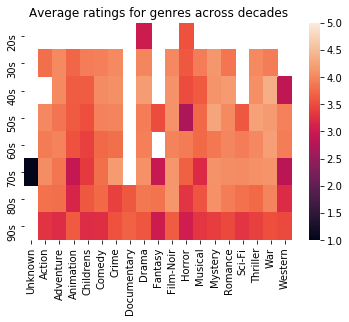

In [306]:
sns.heatmap(avg_years_genres,yticklabels = ylabels,xticklabels = xlabels,vmin=1,vmax=5)
plt.title('Average ratings for genres across decades')

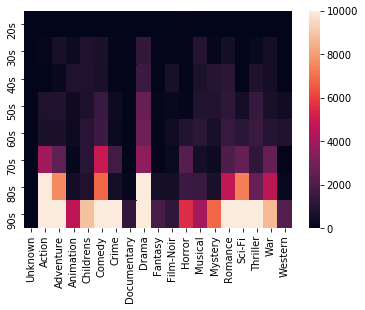

In [311]:
#this is to see just number of movies 
sns.heatmap(years_genres_counts,yticklabels = ylabels,xticklabels = xlabels,vmax=10000)

In [284]:
xlabels = ['Unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
           'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir'
           , 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
           'Thriller', 'War', 'Western']

In [44]:
ratings = pd.read_csv('data.txt', sep="\t",header=None)

In [241]:
#this is to get list of ratings for genres specified by their indices in 'genres'.
#I put it to random but the ones I have the plots for (crime,western,children) have indices 4,6,18
genres = list(np.random.randint(0,19,size=(3,1)))
genre_scores = [[],[],[]]
clean_ratings = np.loadtxt('clean_ratings.txt',dtype=int)
movies = pd.read_csv('movies.txt', sep="\t",header=None)

for row in clean_ratings:
    user_id,movie_id,rating = row[0],row[1],row[2]
    genre_row = movies.loc[movie_id-1][2:]
    for i,genre in enumerate(genres):
        if int(genre_row[genre]) == 1:
            genre_scores[i].append(rating)

In [243]:
np.savetxt('genre_array1.txt',np.array(genre_scores[0]),fmt='%d')
np.savetxt('genre_array2.txt',np.array(genre_scores[1]),fmt='%d')
np.savetxt('genre_array3.txt',np.array(genre_scores[2]),fmt='%d')